In [1]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
cdc_diabetes_health_indicators = fetch_ucirepo(id=891) 
  
# data (as pandas dataframes) 
X = cdc_diabetes_health_indicators.data.features 
y = cdc_diabetes_health_indicators.data.targets 
  
# metadata 
print(cdc_diabetes_health_indicators.metadata) 
  
# variable information 
print(cdc_diabetes_health_indicators.variables) 

{'uci_id': 891, 'name': 'CDC Diabetes Health Indicators', 'repository_url': 'https://archive.ics.uci.edu/dataset/891/cdc+diabetes+health+indicators', 'data_url': 'https://archive.ics.uci.edu/static/public/891/data.csv', 'abstract': 'The Diabetes Health Indicators Dataset contains healthcare statistics and lifestyle survey information about people in general along with their diagnosis of diabetes. The 35 features consist of some demographics, lab test results, and answers to survey questions for each patient. The target variable for classification is whether a patient has diabetes, is pre-diabetic, or healthy. ', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Tabular', 'Multivariate'], 'num_instances': 253680, 'num_features': 21, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Sex', 'Age', 'Education Level', 'Income'], 'target_col': ['Diabetes_binary'], 'index_col': ['ID'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_

## Week 1: Exploratory Data Analysis (EDA)
- Check for missing, duplicate, or invalid values
- Review column data types and formats
- Understand class balance of the target variable
- Visualize distributions, correlations, and feature-to-target patterns
- Document top 3–5 insights in your report

In [2]:
import pandas as pd

# Combine features and targets into a single DataFrame
df = pd.concat([X, y], axis=1)

# --- Check for Missing Values ---
print("--- Missing Values ---")
print(df.isnull().sum())

# --- Check for Duplicate Rows ---
print("\n--- Duplicate Rows ---")
print(f"Total number of duplicate rows: {df.duplicated().sum()}")

# --- Check for Invalid Values ---
print("\n--- Invalid Values ---")
invalid_values_found = {}

# Check binary columns for values other than 0 or 1
binary_cols = ['HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 
               'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 
               'NoDocbcCost', 'DiffWalk', 'Sex', 'Diabetes_binary']
for col in binary_cols:
    invalid_count = df[~df[col].isin([0, 1])].shape[0]
    if invalid_count > 0:
        invalid_values_found[col] = invalid_count

# Check integer columns for values outside the specified scale/range
invalid_gen_hlth = df[~df['GenHlth'].isin(range(1, 6))].shape[0]
if invalid_gen_hlth > 0:
    invalid_values_found['GenHlth'] = invalid_gen_hlth

invalid_ment_hlth = df[~df['MentHlth'].isin(range(0, 31))].shape[0]
if invalid_ment_hlth > 0:
    invalid_values_found['MentHlth'] = invalid_ment_hlth

invalid_phys_hlth = df[~df['PhysHlth'].isin(range(0, 31))].shape[0]
if invalid_phys_hlth > 0:
    invalid_values_found['PhysHlth'] = invalid_phys_hlth

invalid_age = df[~df['Age'].isin(range(1, 14))].shape[0]
if invalid_age > 0:
    invalid_values_found['Age'] = invalid_age

invalid_education = df[~df['Education'].isin(range(1, 7))].shape[0]
if invalid_education > 0:
    invalid_values_found['Education'] = invalid_education

invalid_income = df[~df['Income'].isin(range(1, 9))].shape[0]
if invalid_income > 0:
    invalid_values_found['Income'] = invalid_income

if invalid_values_found:
    for col, count in invalid_values_found.items():
        print(f"Column '{col}' has {count} invalid value(s).")
else:
    print("No invalid values found based on the provided descriptions.")

--- Missing Values ---
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
Diabetes_binary         0
dtype: int64

--- Duplicate Rows ---
Total number of duplicate rows: 24206

--- Invalid Values ---
No invalid values found based on the provided descriptions.


The next code calculates the total number of unique answer combinations and the probability that two random people have the same answers, using all the variables listed (excluding the target).

In [3]:
# Calculate the total number of unique answer combinations for all variables

# Dictionary of variable names and their number of unique options
variable_options = {
    "HighBP": 2,
    "HighChol": 2,
    "CholCheck": 2,
    "Smoker": 2,
    "Stroke": 2,
    "HeartDiseaseorAttack": 2,
    "PhysActivity": 2,
    "Fruits": 2,
    "Veggies": 2,
    "HvyAlcoholConsump": 2,
    "AnyHealthcare": 2,
    "NoDocbcCost": 2,
    "GenHlth": 5,
    "MentHlth": 31,      # 0-30 inclusive
    "PhysHlth": 31,      # 0-30 inclusive
    "DiffWalk": 2,
    "Sex": 2,
    "Age": 13,
    "Education": 6,
    "Income": 8
}

# Calculate total combinations (excluding Diabetes_binary, which is the target)
from functools import reduce
import operator

total_combinations = reduce(operator.mul, variable_options.values(), 1)
print(f"Total possible unique answer combinations: {total_combinations:,}")

# Probability that two random people have the same answers (assuming independence and uniform distribution)
probability_same_answers = 1 / total_combinations
print(f"Probability that two random people have the same answers: {probability_same_answers:.2e}")

Total possible unique answer combinations: 49,124,474,880
Probability that two random people have the same answers: 2.04e-11

Probability that two random people have the same answers: 2.04e-11


For each variable, the code calculates the probability that two people randomly chosen have the same value for that variable (sum of squared frequencies).
Multiplies these probabilities for all variables to get the overall probability.
This gives a much more realistic estimate, especially if some options are much more common than others.

In [4]:
# List of variables to include (excluding the target)
variables = [
    "HighBP", "HighChol", "CholCheck", "Smoker", "Stroke", "HeartDiseaseorAttack",
    "PhysActivity", "Fruits", "Veggies", "HvyAlcoholConsump", "AnyHealthcare",
    "NoDocbcCost", "GenHlth", "MentHlth", "PhysHlth", "DiffWalk", "Sex",
    "Age", "Education", "Income"
]

prob_same = 1.0
for var in variables:
    freqs = df[var].value_counts(normalize=True)
    prob_same_var = (freqs ** 2).sum()
    prob_same *= prob_same_var
    print(f"{var}: P(same) = {prob_same_var:.4f}")

print(f"\nEstimated probability that two random people have the same answers: {prob_same:.2e}")

HighBP: P(same) = 0.5101
HighChol: P(same) = 0.5115
CholCheck: P(same) = 0.9281
Smoker: P(same) = 0.5065
Stroke: P(same) = 0.9222
HeartDiseaseorAttack: P(same) = 0.8294
PhysActivity: P(same) = 0.6316
Fruits: P(same) = 0.5360
Veggies: P(same) = 0.6940
HvyAlcoholConsump: P(same) = 0.8939
AnyHealthcare: P(same) = 0.9069
NoDocbcCost: P(same) = 0.8458
GenHlth: P(same) = 0.2619
MentHlth: P(same) = 0.4895
PhysHlth: P(same) = 0.4132
DiffWalk: P(same) = 0.7202
Sex: P(same) = 0.5071
Age: P(same) = 0.0925
Education: P(same) = 0.3178
Income: P(same) = 0.2010

Estimated probability that two random people have the same answers: 1.73e-06


In [5]:
# The ID column is a separate variable, not a feature
# We can access it from cdc_diabetes_health_indicators.data.ids
patient_ids = cdc_diabetes_health_indicators.data.ids

# --- Verify that the ID column exists and check its size ---
print(f"\nNumber of patient IDs: {len(patient_ids)}")
print(f"Number of rows in the features data (X): {len(X)}")


Number of patient IDs: 253680
Number of rows in the features data (X): 253680


In [6]:
# --- Review data types ---
print("--- Data Types ---")
print(df.dtypes)

# --- Review column formats by showing example values ---
print("\n--- Column Format Examples ---")
for col in df.columns:
    # Check if the column is not empty before trying to access values
    if not df[col].empty:
        # For readability, get the first non-missing value
        example_value = df[col].dropna().iloc[0] if not df[col].dropna().empty else "N/A"
        print(f"Column '{col}' is of type '{df[col].dtype}'. Example value: {example_value}")
    else:
        print(f"Column '{col}' is empty.")

--- Data Types ---
HighBP                  int64
HighChol                int64
CholCheck               int64
BMI                     int64
Smoker                  int64
Stroke                  int64
HeartDiseaseorAttack    int64
PhysActivity            int64
Fruits                  int64
Veggies                 int64
HvyAlcoholConsump       int64
AnyHealthcare           int64
NoDocbcCost             int64
GenHlth                 int64
MentHlth                int64
PhysHlth                int64
DiffWalk                int64
Sex                     int64
Age                     int64
Education               int64
Income                  int64
Diabetes_binary         int64
dtype: object

--- Column Format Examples ---
Column 'HighBP' is of type 'int64'. Example value: 1
Column 'HighChol' is of type 'int64'. Example value: 1
Column 'CholCheck' is of type 'int64'. Example value: 1
Column 'BMI' is of type 'int64'. Example value: 40
Column 'Smoker' is of type 'int64'. Example value: 1
Column 

In [7]:
df.columns  # Display all column names for reference

Index(['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke',
       'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income',
       'Diabetes_binary'],
      dtype='object')

In [8]:
# --- Understand class balance ---
print("--- Class Balance of 'Diabetes_binary' ---")

# Get the raw counts of each class
class_counts = y['Diabetes_binary'].value_counts()
print("\nRaw Counts:")
print(class_counts)

# Get the normalized percentages of each class
class_percentages = y['Diabetes_binary'].value_counts(normalize=True) * 100
print("\nNormalized Percentages:")
print(class_percentages.round(2))

--- Class Balance of 'Diabetes_binary' ---

Raw Counts:
Diabetes_binary
0    218334
1     35346
Name: count, dtype: int64

Normalized Percentages:
Diabetes_binary
0    86.07
1    13.93
Name: proportion, dtype: float64


In [9]:
# What is the ratio of healthy to diabetic patients?
healthy_count = class_counts.get(0, 0)
diabetic_count = class_counts.get(1, 0)
if diabetic_count > 0:      
    ratio = healthy_count / diabetic_count
    print(f"\nRatio of healthy to diabetic patients: {ratio:.1f}")
else:
    print("\nNo diabetic patients found to calculate the ratio.")


Ratio of healthy to diabetic patients: 6.2


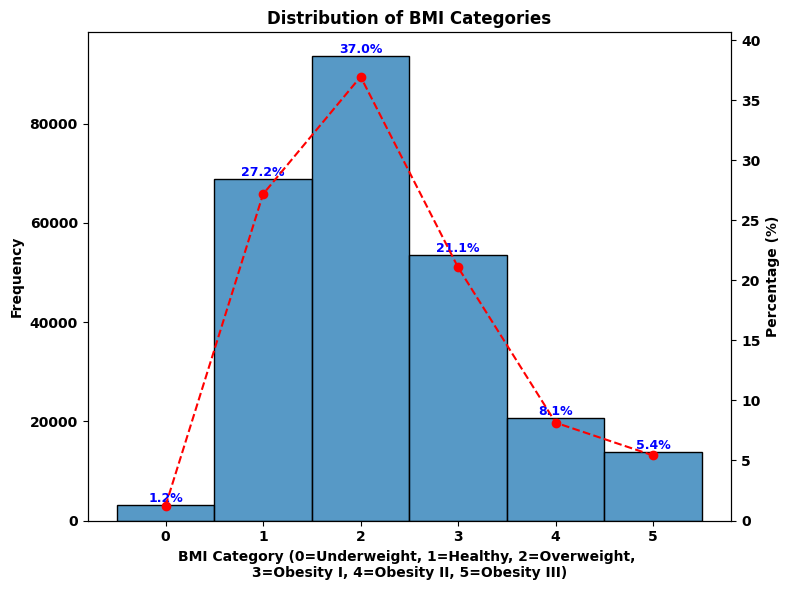

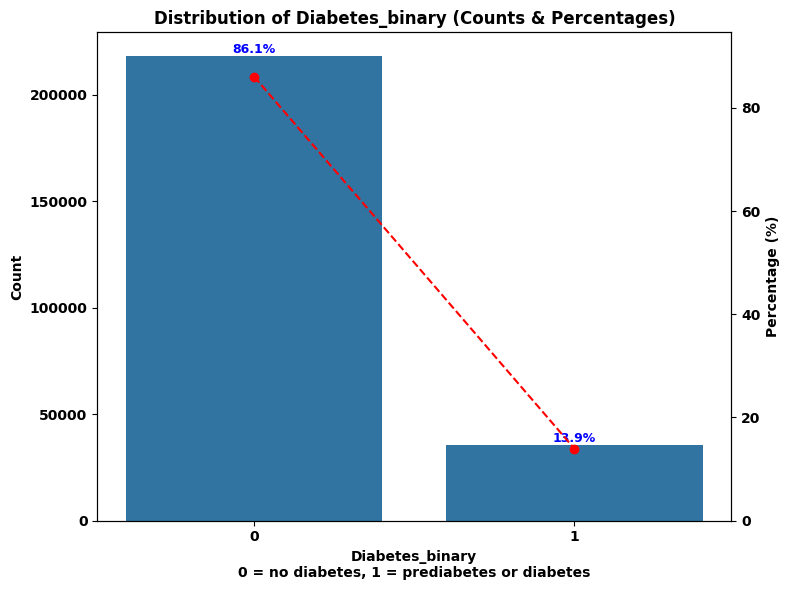

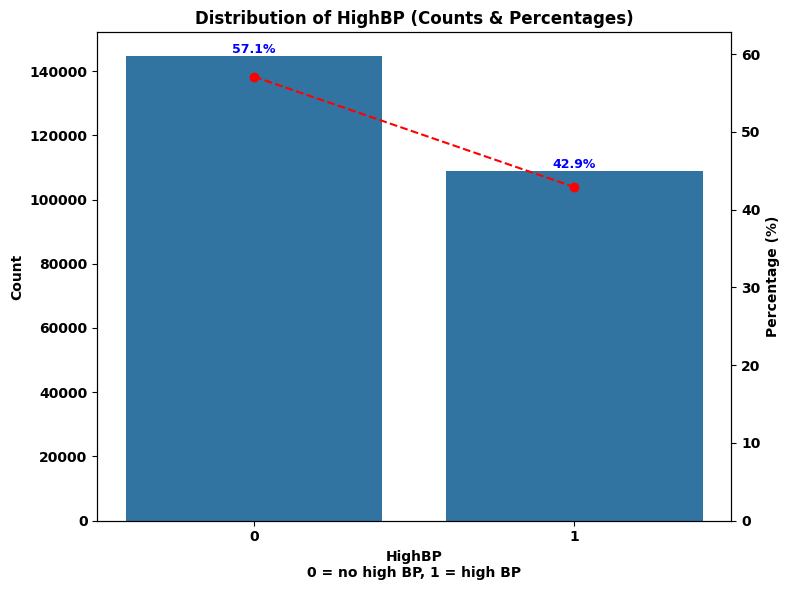

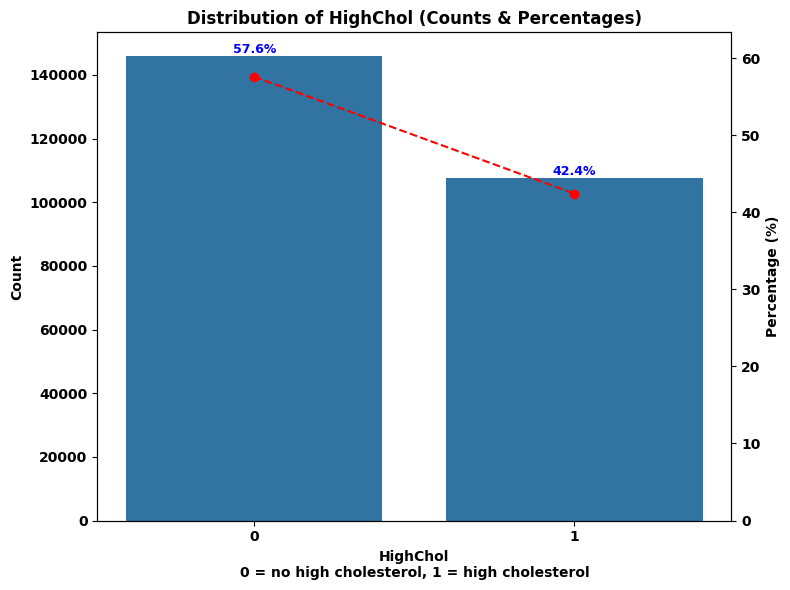

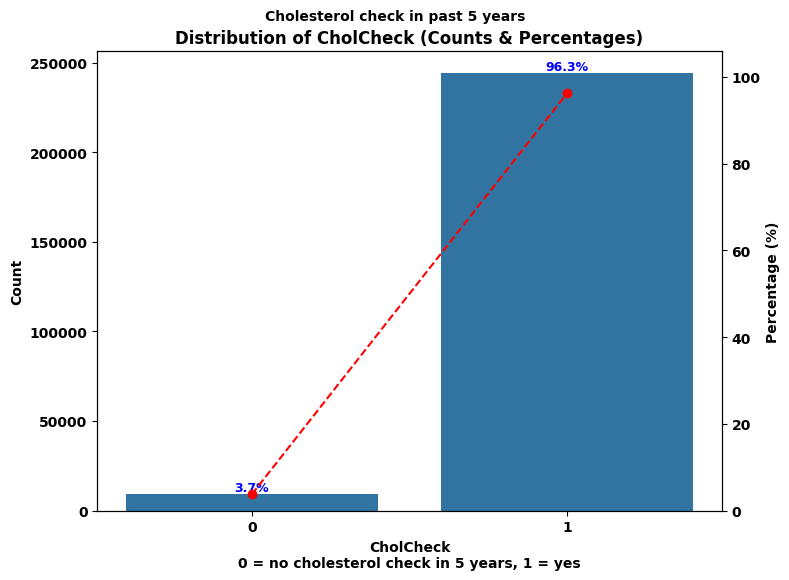

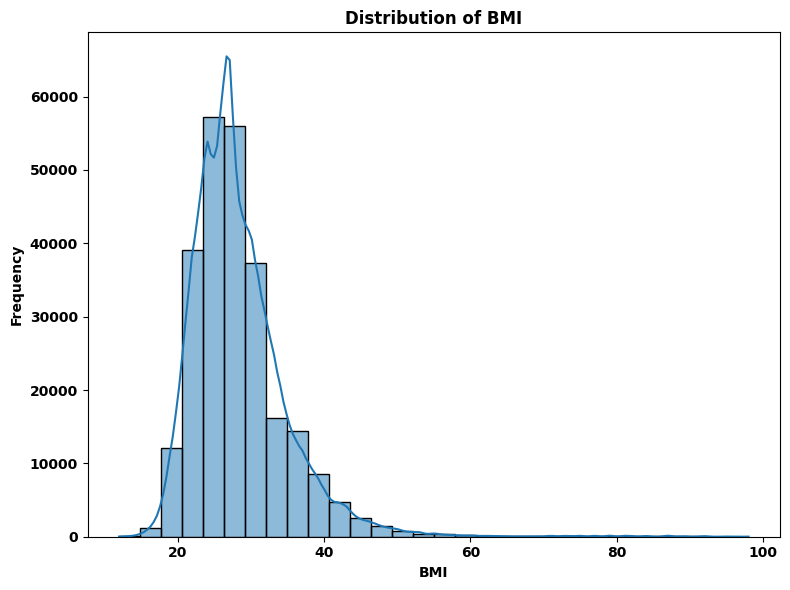

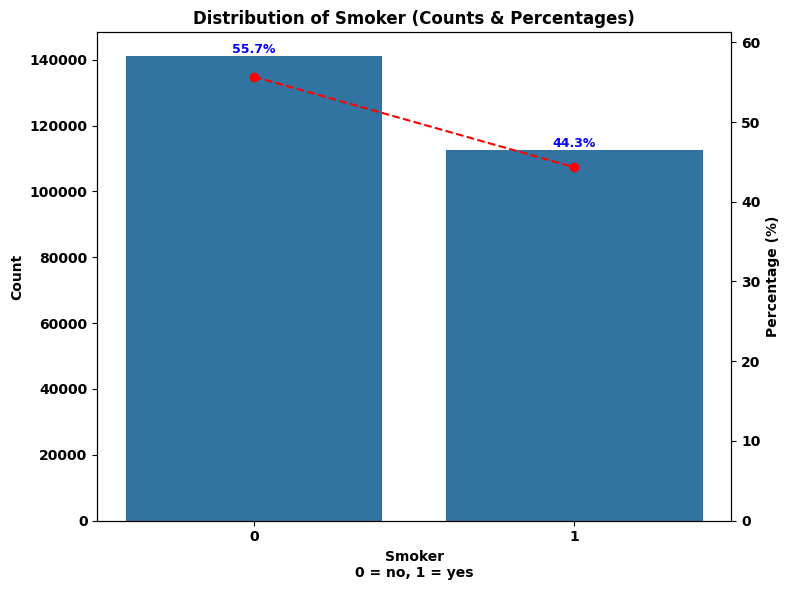

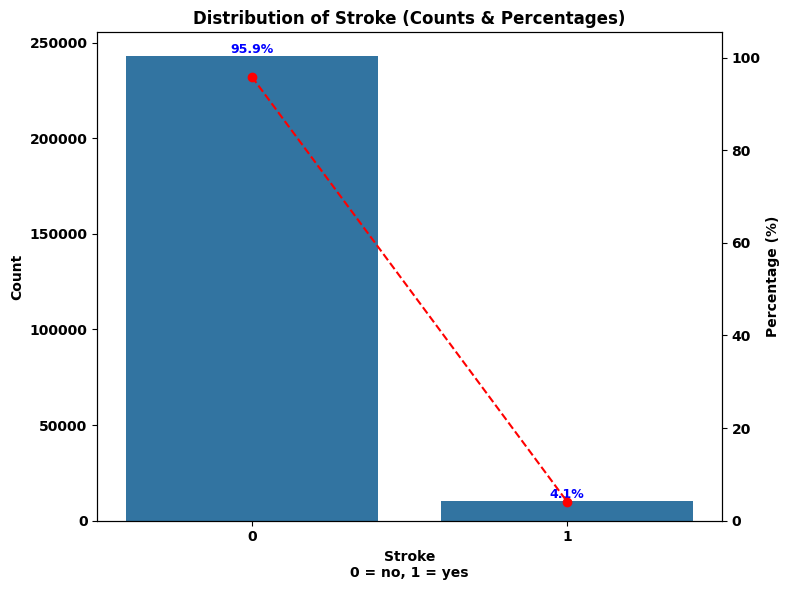

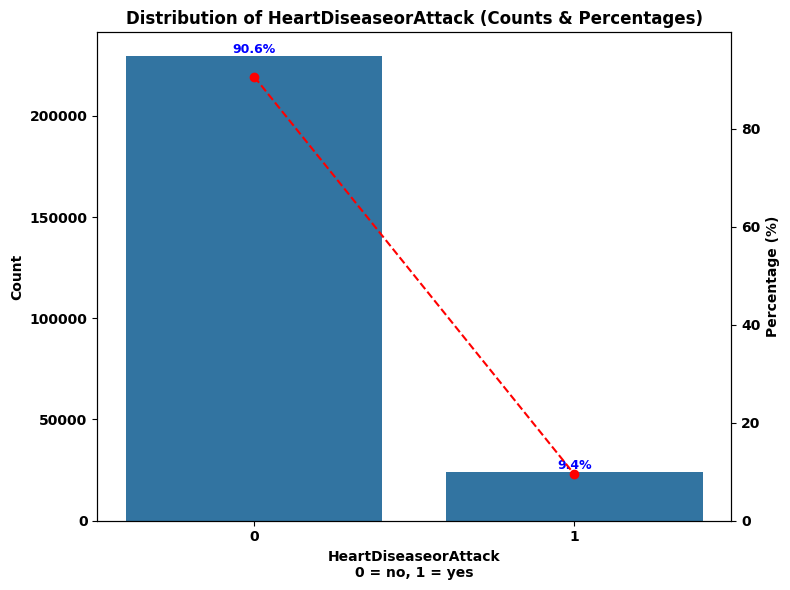

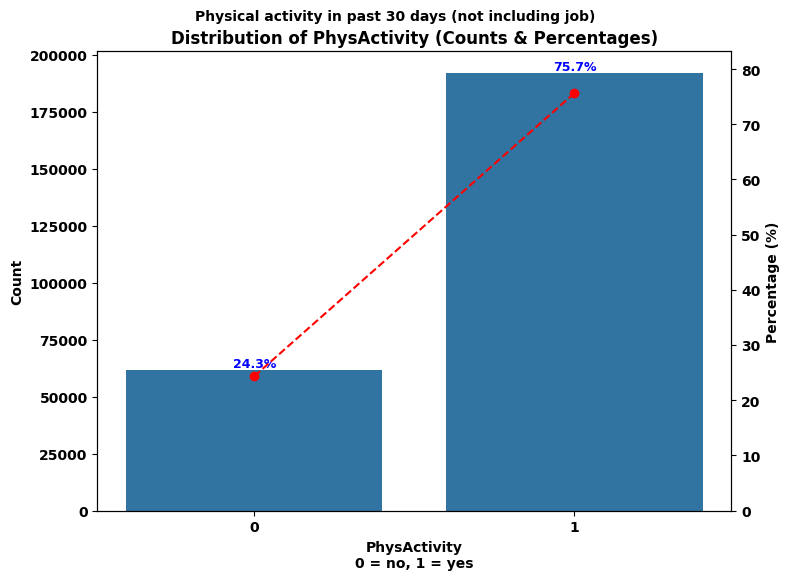

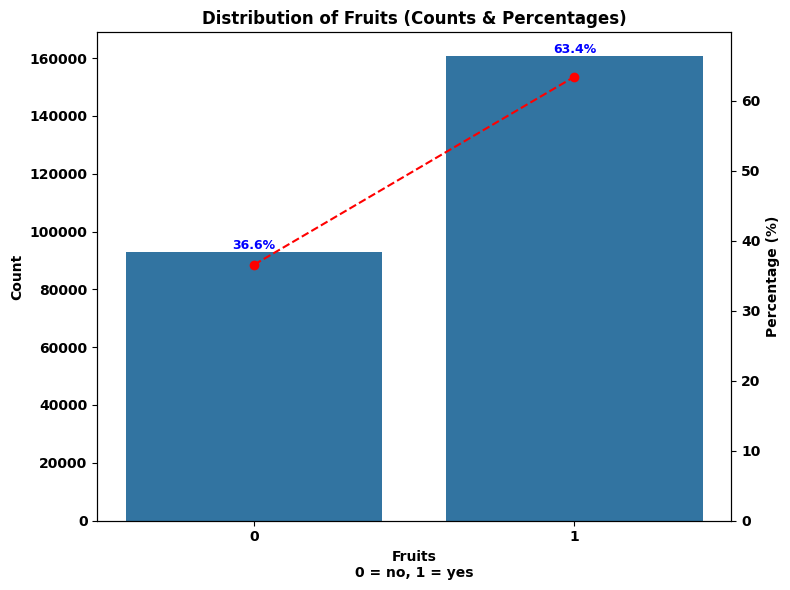

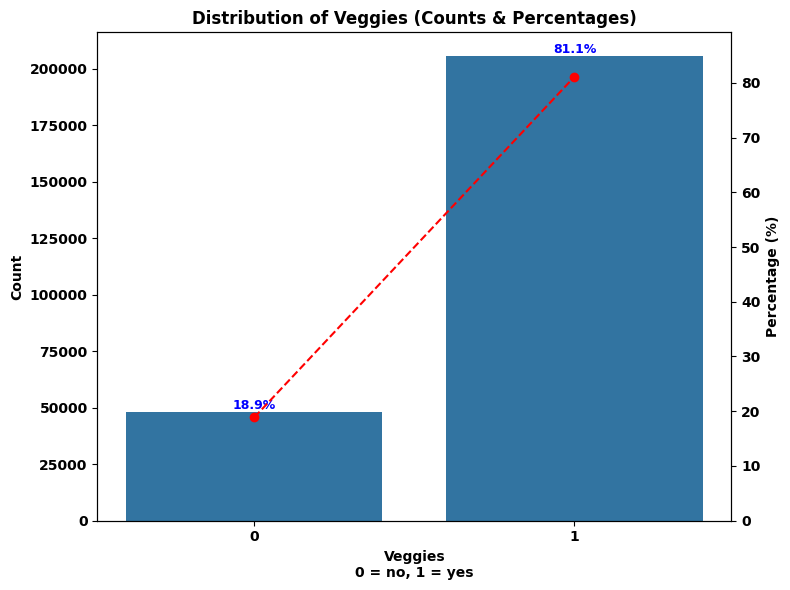

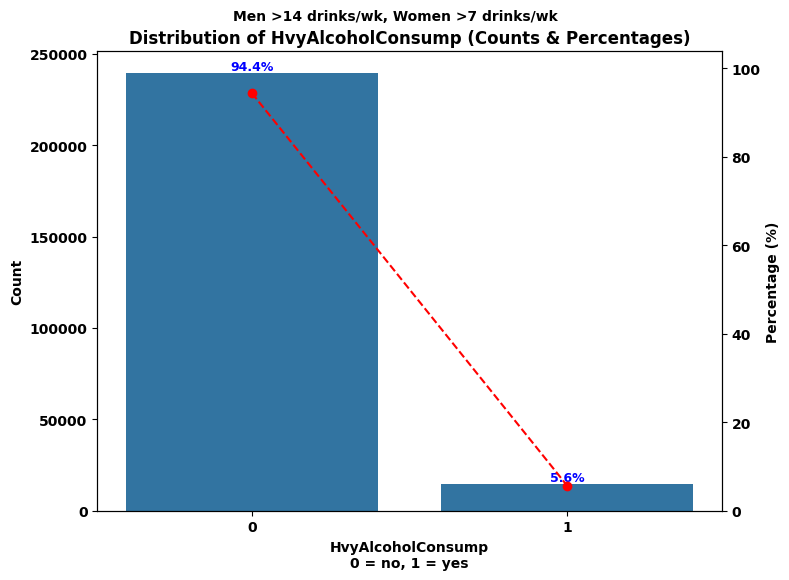

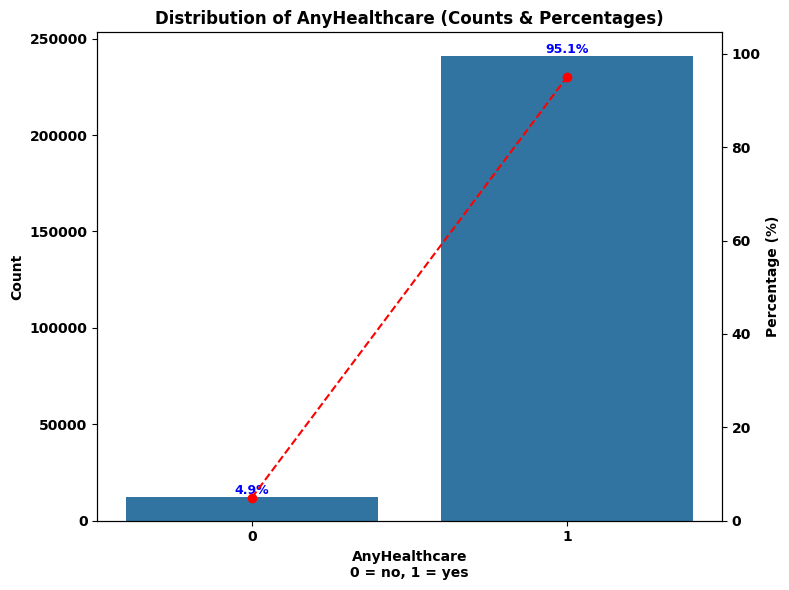

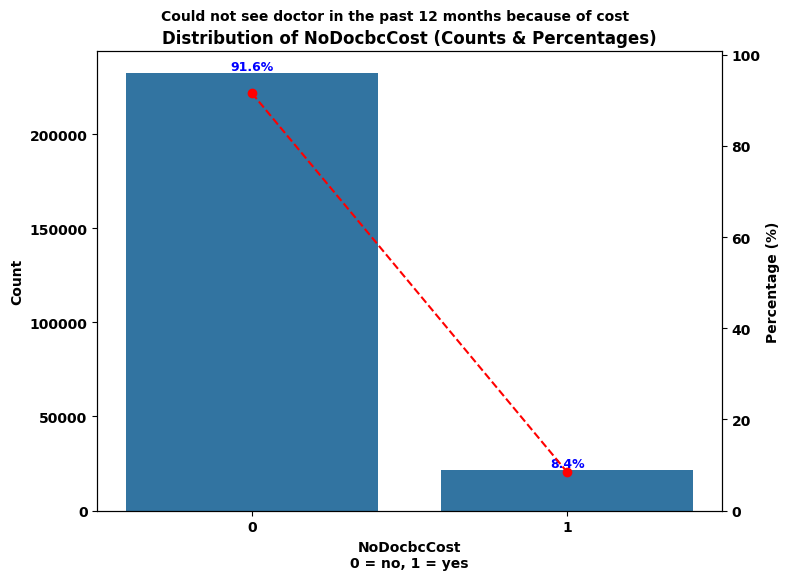

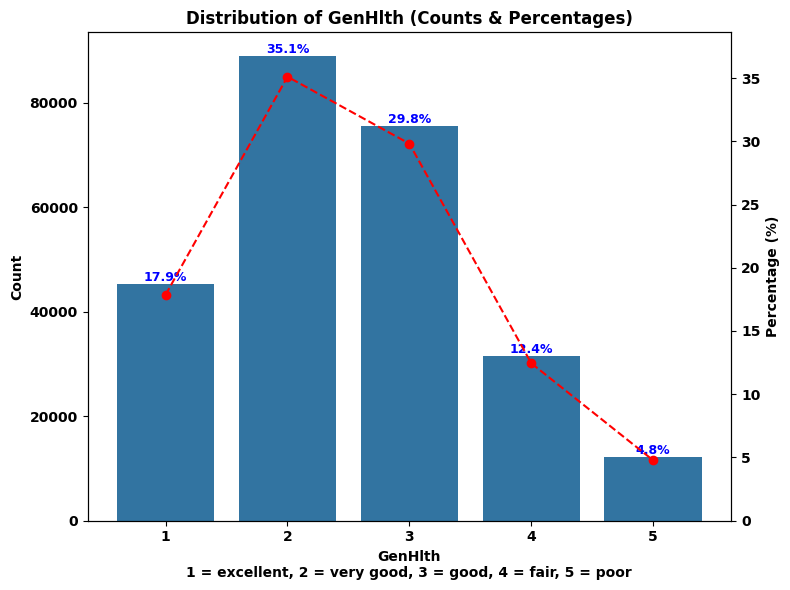

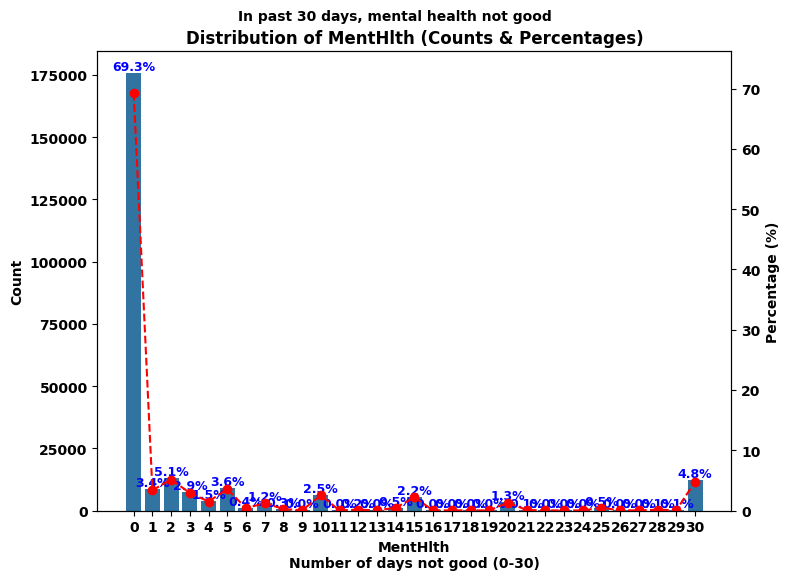

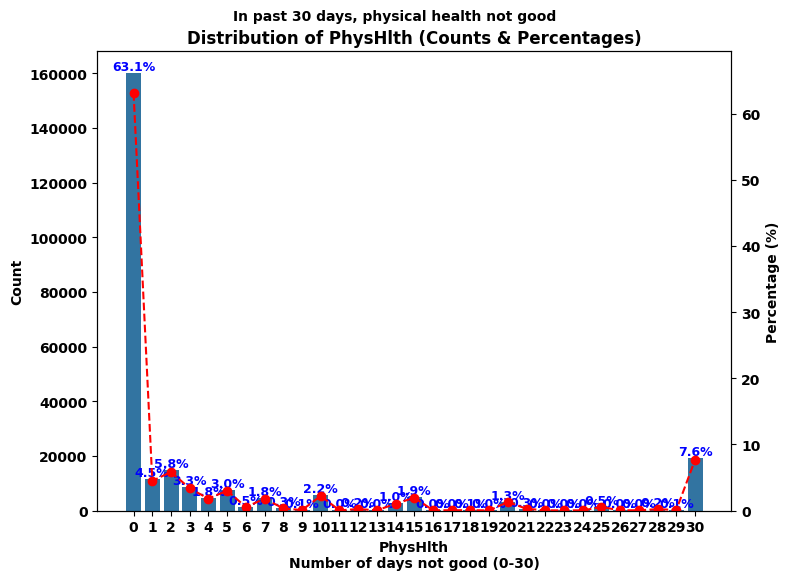

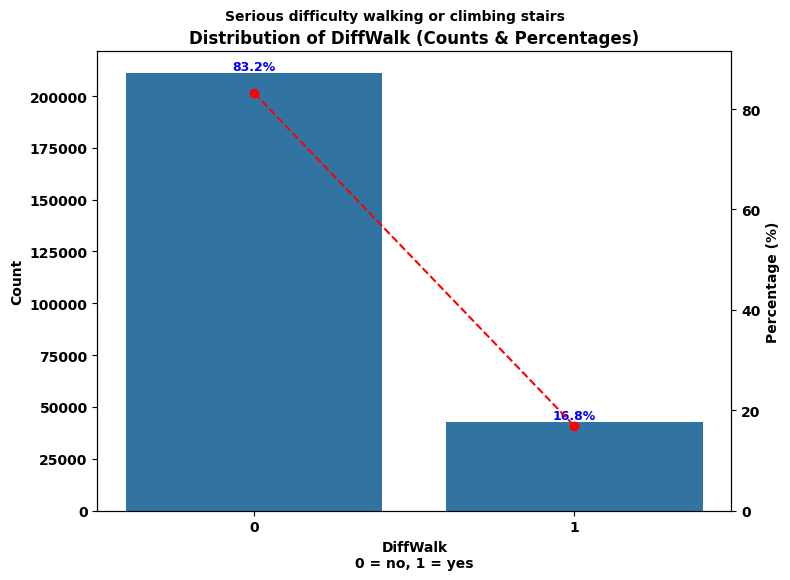

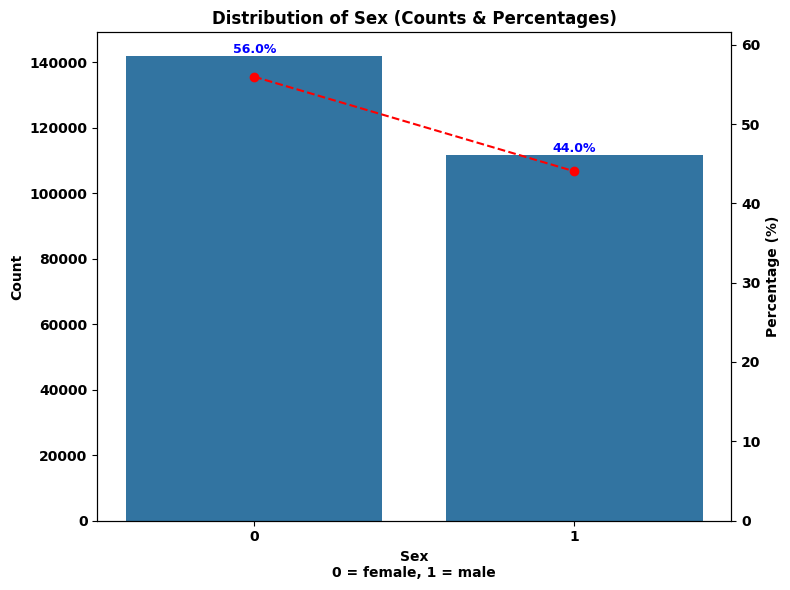

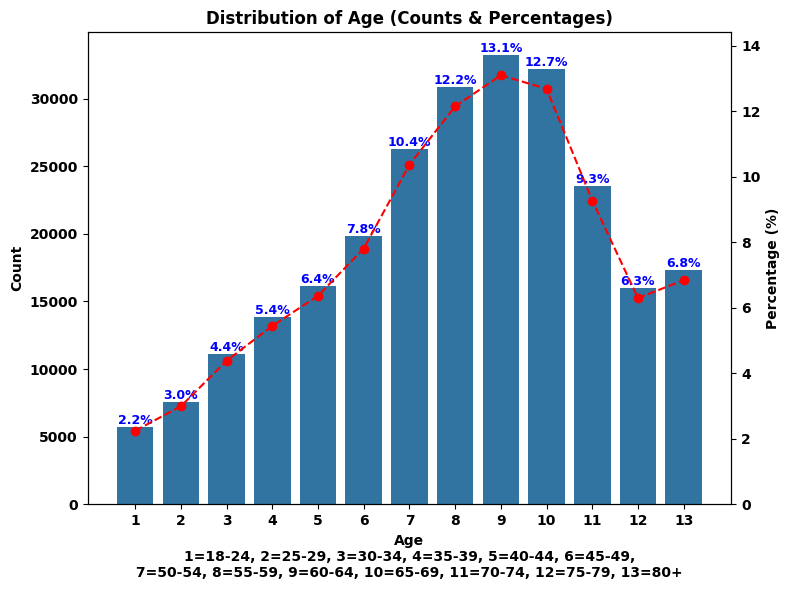

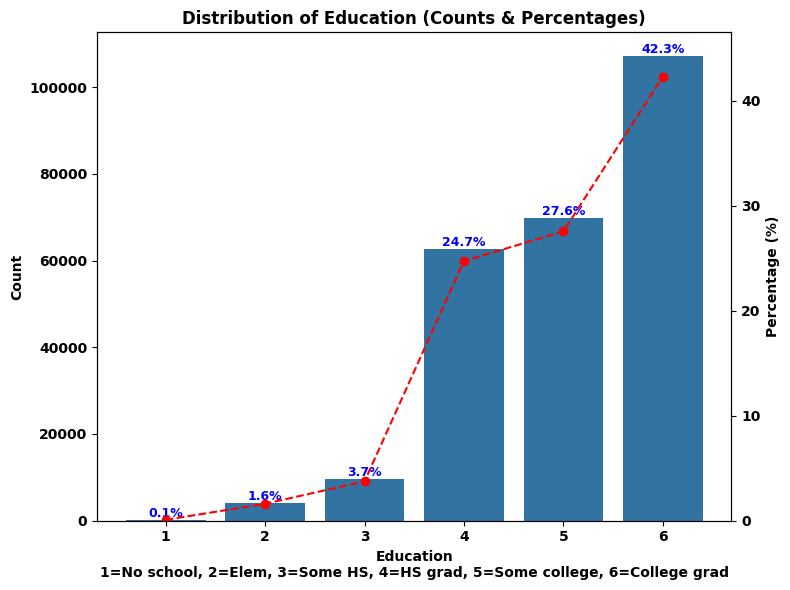

findfont: Font family ['STIXGeneral'] not found. Falling back to DejaVu Sans.
findfont: Font family ['STIXGeneral'] not found. Falling back to DejaVu Sans.
findfont: Font family ['STIXGeneral'] not found. Falling back to DejaVu Sans.
findfont: Font family ['STIXGeneral'] not found. Falling back to DejaVu Sans.
findfont: Font family ['STIXNonUnicode'] not found. Falling back to DejaVu Sans.
findfont: Font family ['STIXNonUnicode'] not found. Falling back to DejaVu Sans.
findfont: Font family ['STIXGeneral'] not found. Falling back to DejaVu Sans.
findfont: Font family ['STIXGeneral'] not found. Falling back to DejaVu Sans.
findfont: Font family ['STIXGeneral'] not found. Falling back to DejaVu Sans.
findfont: Font family ['STIXNonUnicode'] not found. Falling back to DejaVu Sans.
findfont: Font family ['STIXNonUnicode'] not found. Falling back to DejaVu Sans.
findfont: Font family ['STIXNonUnicode'] not found. Falling back to DejaVu Sans.
findfont: Font family ['STIXSizeOneSym'] not foun

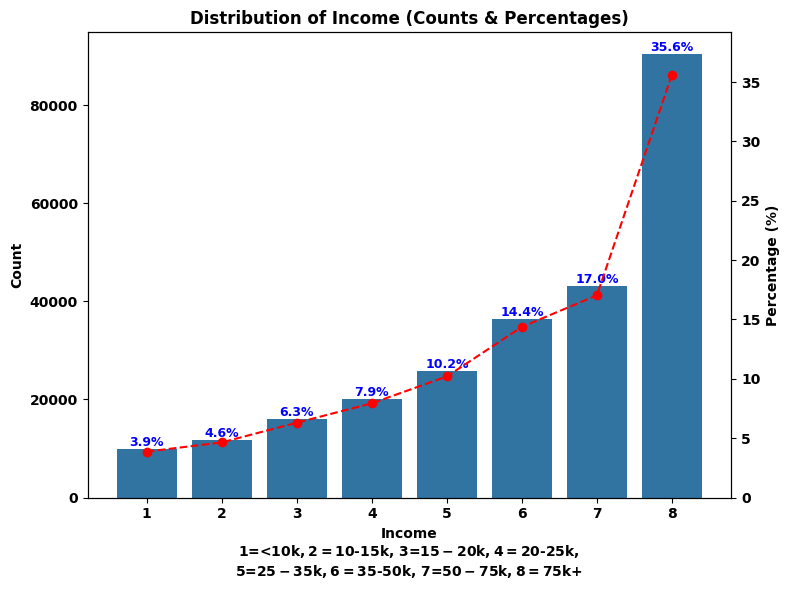

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

# Set default font family to avoid font warnings
matplotlib.rcParams['font.family'] = 'DejaVu Sans'

# Add a new column for BMICat based on BMI values
# Define BMI categories based on the CDC guidelines

# Define BMI bins and labels
bmi_bins = [float('-inf'), 18.5, 24.9, 29.9, 34.9, 39.9, float('inf')]
bmi_labels = [
    0,  # Underweight
    1,  # Healthy Weight
    2,  # Overweight
    3,  # Class 1 Obesity
    4,  # Class 2 Obesity
    5   # Class 3 Obesity
]

# Create BMICat column
df['BMICat'] = pd.cut(df['BMI'], bins=bmi_bins, labels=bmi_labels, right=True).astype(int)


# List of columns to visualize in the specified order
columns_to_visualize = ['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 
                        'BMI', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 
                        'PhysActivity', 'Fruits', 'Veggies', 
                        'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 
                        'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 
                        'Age', 'Education', 'Income']

# Add BMICat to columns_to_visualize
columns_to_visualize = ['BMICat'] + columns_to_visualize

# Create and save a plot for each column

# Dictionary mapping variable names to x-axis explanations
x_axis_explanations = {
    "Diabetes_binary": "0 = no diabetes, 1 = prediabetes or diabetes",
    "HighBP": "0 = no high BP, 1 = high BP",
    "HighChol": "0 = no high cholesterol, 1 = high cholesterol",
    "CholCheck": "0 = no cholesterol check in 5 years, 1 = yes",
    "Smoker": "0 = no, 1 = yes",
    "Stroke": "0 = no, 1 = yes",
    "HeartDiseaseorAttack": "0 = no, 1 = yes",
    "PhysActivity": "0 = no, 1 = yes",
    "Fruits": "0 = no, 1 = yes",
    "Veggies": "0 = no, 1 = yes",
    "HvyAlcoholConsump": "0 = no, 1 = yes",
    "AnyHealthcare": "0 = no, 1 = yes",
    "NoDocbcCost": "0 = no, 1 = yes",
    "GenHlth": "1 = excellent, 2 = very good, 3 = good, 4 = fair, 5 = poor",
    "MentHlth": "Number of days not good (0-30)",
    "PhysHlth": "Number of days not good (0-30)",
    "DiffWalk": "0 = no, 1 = yes",
    "Sex": "0 = female, 1 = male",
    "Age": "1=18-24, 2=25-29, 3=30-34, 4=35-39, 5=40-44, 6=45-49,\n7=50-54, 8=55-59, 9=60-64, 10=65-69, 11=70-74, 12=75-79, 13=80+",
    "Education": "1=No school, 2=Elem, 3=Some HS, 4=HS grad, 5=Some college, 6=College grad",
    "Income": "1=<$10k, 2=$10-15k, 3=$15-20k, 4=$20-25k, \n5=$25-35k, 6=$35-50k, 7=$50-75k, 8=$75k+"
}
# Add explanation for BMICat
x_axis_explanations['BMICat'] = (
    "0=Underweight (<18.5), 1=Healthy (18.5-24.9), 2=Overweight (25-29.9), "
    "\n3=Obesity I (30-34.9), 4=Obesity II (35-39.9), 5=Obesity III (>=40)"
)

# Dictionary of subtitles for specific columns
extra_titles = {
    "CholCheck": "Cholesterol check in past 5 years",
    "PhysActivity": "Physical activity in past 30 days (not including job)",
    "HvyAlcoholConsump": "Men >14 drinks/wk, Women >7 drinks/wk",
    "NoDocbcCost": "Could not see doctor in the past 12 months because of cost",
    "MentHlth": "In past 30 days, mental health not good",
    "PhysHlth": "In past 30 days, physical health not good",
    "DiffWalk": "Serious difficulty walking or climbing stairs"
}

for column in columns_to_visualize:
    plt.figure(figsize=(8, 6))

    if column == 'BMI':
        sns.histplot(data=df, x=column, kde=True, bins=30)
        plt.title(f'Distribution of {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.tight_layout()
        plt.show()
    elif column == 'BMICat':
        ax = sns.histplot(data=df, x='BMICat', discrete=True)
        plt.title('Distribution of BMI Categories')
        plt.xlabel('BMI Category (0=Underweight, 1=Healthy, 2=Overweight, \n3=Obesity I, 4=Obesity II, 5=Obesity III)')
        plt.ylabel('Frequency')

        # Calculate counts and percentages
        total = len(df)
        value_counts = df['BMICat'].value_counts().sort_index()
        percentages = (value_counts / total * 100)

        # Annotate bars with percentage values
        for p, perc in zip(ax.patches, percentages):
            height = p.get_height()
            ax.annotate(f'{perc:.1f}%',
                        (p.get_x() + p.get_width() / 2, height),
                        ha='center', va='bottom', fontsize=9, color='blue', rotation=0)

        ax2 = ax.twinx()
        ax2.set_ylabel('Percentage (%)')
        ax2.set_ylim(0, percentages.max() * 1.1)
                # Use the actual category codes for x-axis
        ax2.plot(value_counts.index, percentages.values, color='red', marker='o', linestyle='--', label='Percentage')

        plt.tight_layout()
        plt.show()
    else:
        ax = sns.countplot(data=df, x=column, order=sorted(df[column].unique()))
        ax.set_ylabel('Count')
        plt.title(f'Distribution of {column} (Counts & Percentages)')
        if column in extra_titles:
            plt.suptitle(extra_titles[column], fontsize=10, y=0.96)
        plt.xlabel(f"{column}\n{x_axis_explanations.get(column, '')}")

        total = len(df)
        value_counts = df[column].value_counts().sort_index()
        percentages = (value_counts / total * 100)

        # Annotate bars with percentage values
        for p, perc in zip(ax.patches, percentages):
            height = p.get_height()
            ax.annotate(f'{perc:.1f}%', 
                        (p.get_x() + p.get_width() / 2, height),
                        ha='center', va='bottom', fontsize=9, color='blue', rotation=0)

        ax2 = ax.twinx()
        ax2.set_ylabel('Percentage (%)')
        ax2.set_ylim(0, percentages.max() * 1.1)
        ax2.plot(ax.get_xticks(), percentages.values, color='red', marker='o', linestyle='--', label='Percentage')
        # ax2.legend(loc='upper right')

        plt.tight_layout()
        plt.show()

In [11]:
# Create a table with counts and percentages for every unique BMI value
bmi_counts = df['BMI'].value_counts().sort_index()
bmi_percentages = (bmi_counts / len(df)) * 100

bmi_table = pd.DataFrame({
    'BMI Value': bmi_counts.index,
    'Count': bmi_counts.values,
    'Percentage': bmi_percentages.values
})

# Display the table with all rows visible
with pd.option_context('display.max_rows', None):
    print(bmi_table)

    BMI Value  Count  Percentage
0          12      6    0.002365
1          13     21    0.008278
2          14     41    0.016162
3          15    132    0.052034
4          16    348    0.137181
5          17    776    0.305897
6          18   1803    0.710738
7          19   3968    1.564175
8          20   6327    2.494087
9          21   9855    3.884816
10         22  13643    5.378035
11         23  15610    6.153422
12         24  19550    7.706559
13         25  17146    6.758909
14         26  20562    8.105487
15         27  24606    9.699622
16         28  16545    6.521996
17         29  14890    5.869599
18         30  14573    5.744639
19         31  12275    4.838773
20         32  10474    4.128824
21         33   8948    3.527278
22         34   7181    2.830732
23         35   5575    2.197651
24         36   4633    1.826317
25         37   4147    1.634737
26         38   3397    1.339089
27         39   2911    1.147509
28         40   2258    0.890098
29        

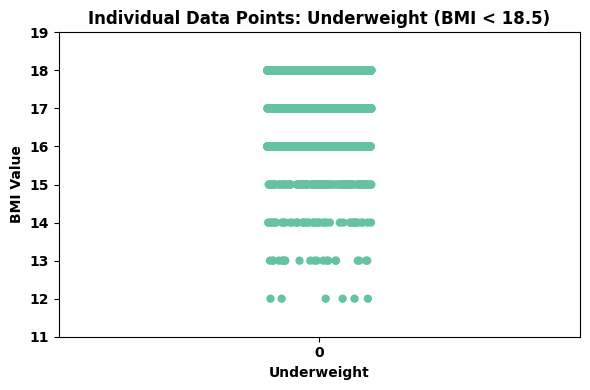

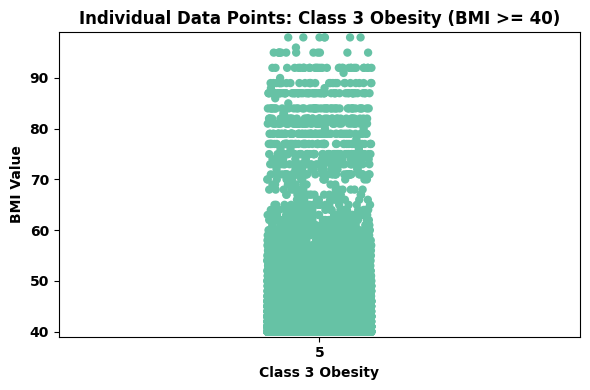

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter the DataFrame for Underweight (<18.5) and Class 3 Obesity (>=40)
underweight = df[df['BMICat'] == 0]
obesity3 = df[df['BMICat'] == 5]

# Plot Underweight
plt.figure(figsize=(6, 4))
sns.stripplot(data=underweight, x='BMICat', y='BMI', hue='BMICat', legend=False, jitter=True, size=6, palette='Set2')
plt.title('Individual Data Points: Underweight (BMI < 18.5)')
plt.xlabel('Underweight')
plt.ylabel('BMI Value')
plt.ylim(underweight['BMI'].min() - 1, underweight['BMI'].max() + 1)
plt.tight_layout()
plt.show()

# Plot Class 3 Obesity
plt.figure(figsize=(6, 4))
sns.stripplot(data=obesity3, x='BMICat', y='BMI', hue='BMICat', legend=False, jitter=True, size=6, palette='Set2')
plt.title('Individual Data Points: Class 3 Obesity (BMI >= 40)')
plt.xlabel('Class 3 Obesity')
plt.ylabel('BMI Value')
plt.ylim(obesity3['BMI'].min() - 1, obesity3['BMI'].max() + 1)
plt.tight_layout()
plt.show()

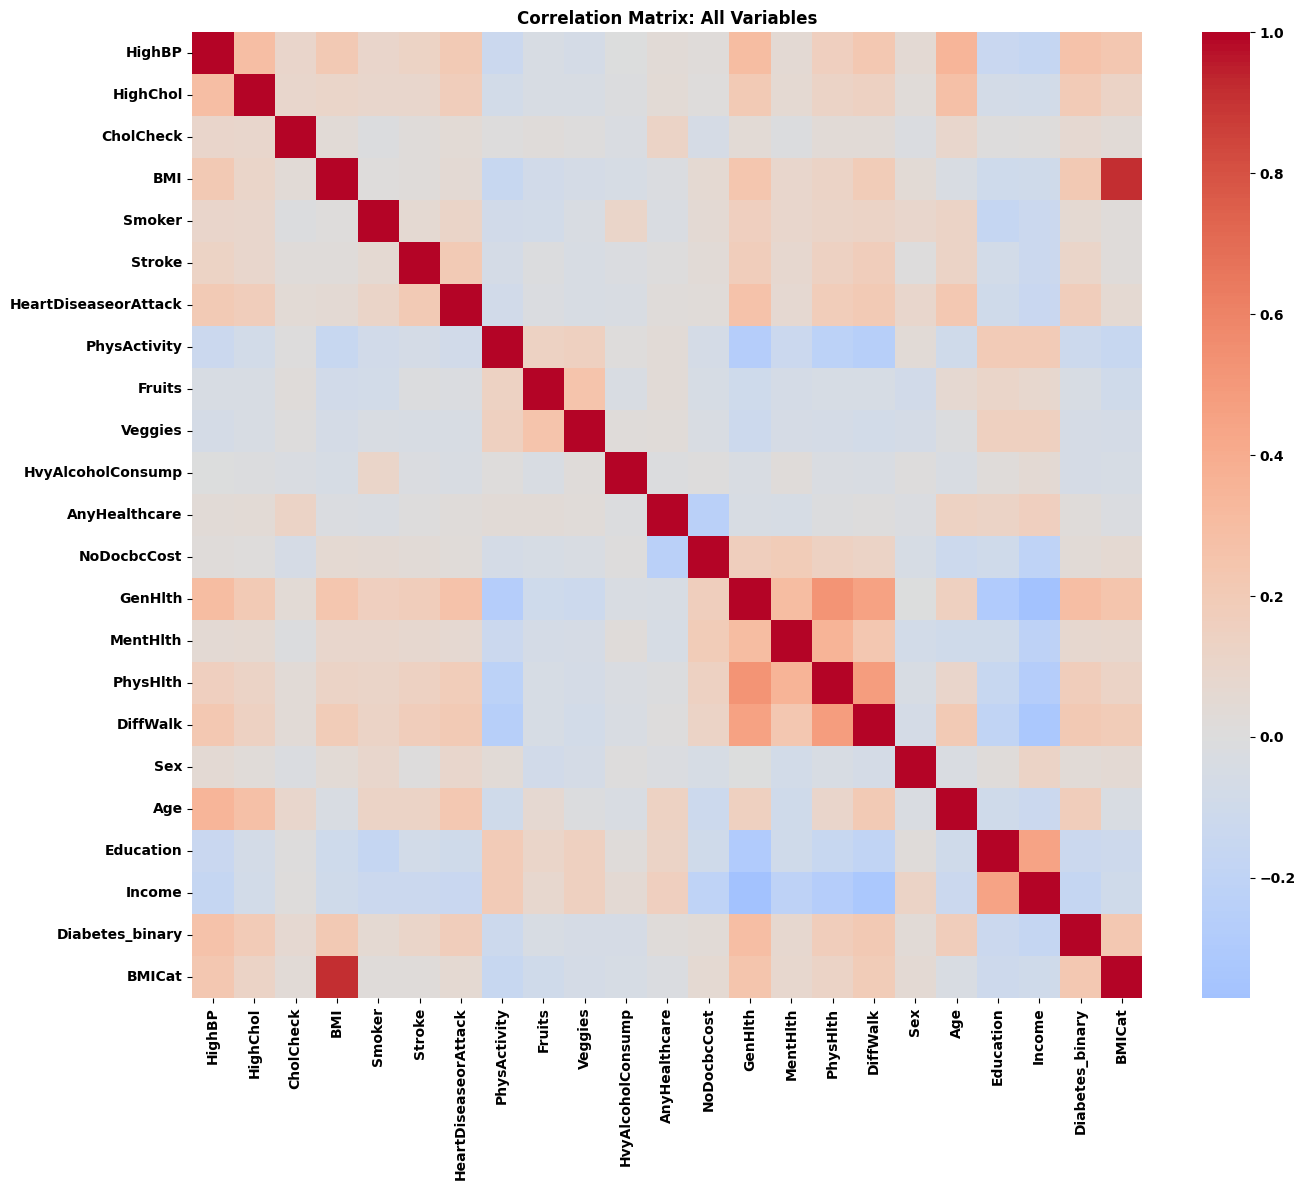

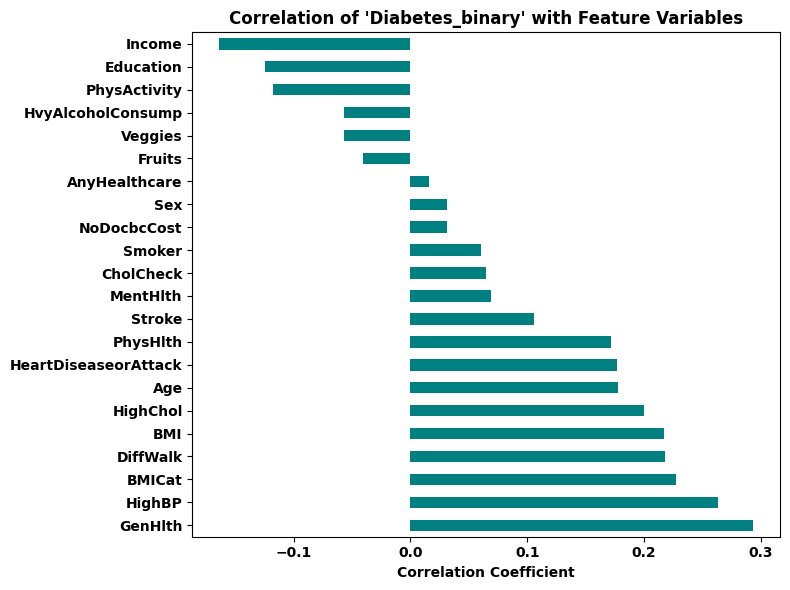

In [13]:
# --- 1. Correlation matrix for all variables ---
plt.figure(figsize=(14, 12))
corr_matrix = df.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', center=0)
plt.title('Correlation Matrix: All Variables')
plt.tight_layout()
plt.show()

# --- 2. Correlation of target with all features ---
target_corr = corr_matrix['Diabetes_binary'].drop('Diabetes_binary')
plt.figure(figsize=(8, 6))
target_corr.sort_values(ascending=False).plot(kind='barh', color='teal')
plt.title("Correlation of 'Diabetes_binary' with Feature Variables")
plt.xlabel('Correlation Coefficient')
plt.tight_layout()
plt.show()

Interpretation:  
A positive correlation means the feature increases as the likelihood of being in the "prediabetes or diabetes" group (1) increases.  
A negative correlation means the feature increases as the likelihood of being in the "no diabetes" group (0) increases.  

In [14]:
# Calculate and display correlations with Diabetes_binary, sorted from biggest to smallest
correlations = df.corr(numeric_only=True)['Diabetes_binary'].drop('Diabetes_binary')
correlation_table = correlations.sort_values(ascending=False).reset_index()
correlation_table.columns = ['Feature', 'Correlation with Diabetes_binary']
print(correlation_table.round(2))

                 Feature  Correlation with Diabetes_binary
0                GenHlth                              0.29
1                 HighBP                              0.26
2                 BMICat                              0.23
3               DiffWalk                              0.22
4                    BMI                              0.22
5               HighChol                              0.20
6                    Age                              0.18
7   HeartDiseaseorAttack                              0.18
8               PhysHlth                              0.17
9                 Stroke                              0.11
10              MentHlth                              0.07
11             CholCheck                              0.06
12                Smoker                              0.06
13           NoDocbcCost                              0.03
14                   Sex                              0.03
15         AnyHealthcare                              0.

In [15]:
# Calculate and display all pairwise correlations between variables (excluding Diabetes_binary)
corr_matrix = df.drop(columns=['Diabetes_binary']).corr(numeric_only=True)

# Unstack the matrix, reset index, and filter out self-correlations and duplicates
corr_pairs = (
    corr_matrix
    .abs()  # Use absolute value if you want to sort by strength regardless of sign
    .unstack()
    .reset_index()
)
corr_pairs.columns = ['Variable 1', 'Variable 2', 'Correlation']

# Remove self-correlations and duplicate pairs
corr_pairs = corr_pairs[corr_pairs['Variable 1'] != corr_pairs['Variable 2']]
corr_pairs['Pair'] = corr_pairs.apply(lambda row: tuple(sorted([row['Variable 1'], row['Variable 2']])), axis=1)
corr_pairs = corr_pairs.drop_duplicates(subset='Pair').drop(columns='Pair')

# Sort by absolute correlation, descending
corr_pairs = corr_pairs.sort_values(by='Correlation', ascending=False).reset_index(drop=True)

# Display the table with all rows visible
with pd.option_context('display.max_rows', None):
    print(corr_pairs.round(2))

               Variable 1            Variable 2  Correlation
0                     BMI                BMICat         0.92
1                 GenHlth              PhysHlth         0.52
2                PhysHlth              DiffWalk         0.48
3                 GenHlth              DiffWalk         0.46
4               Education                Income         0.45
5                 GenHlth                Income         0.37
6                MentHlth              PhysHlth         0.35
7                  HighBP                   Age         0.34
8                DiffWalk                Income         0.32
9                 GenHlth              MentHlth         0.30
10                 HighBP               GenHlth         0.30
11                 HighBP              HighChol         0.30
12                GenHlth             Education         0.28
13               HighChol                   Age         0.27
14               PhysHlth                Income         0.27
15           PhysActivit

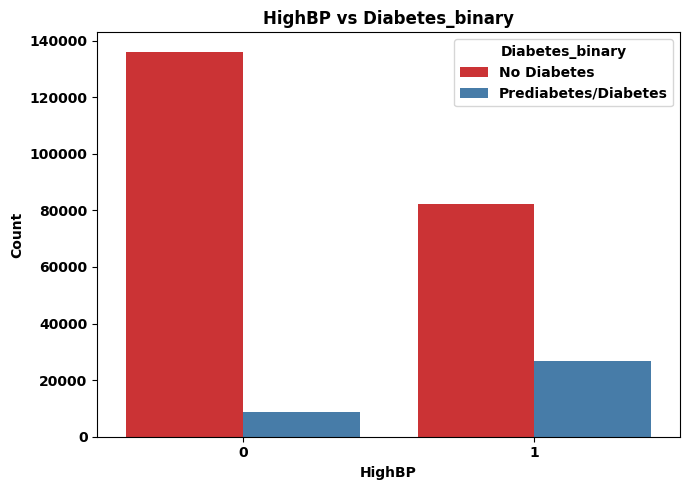

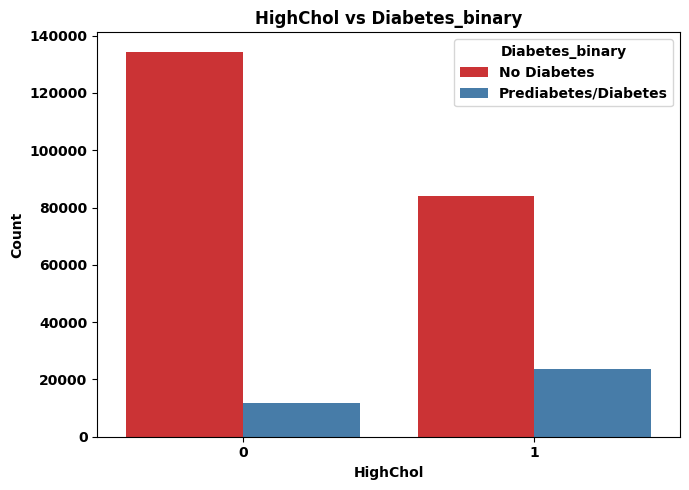

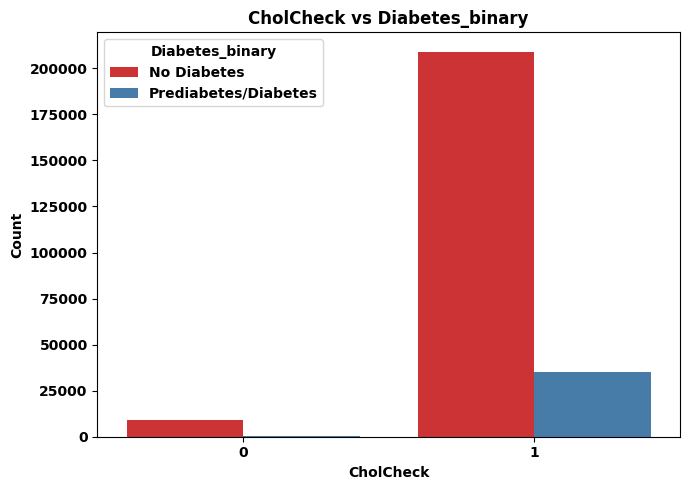

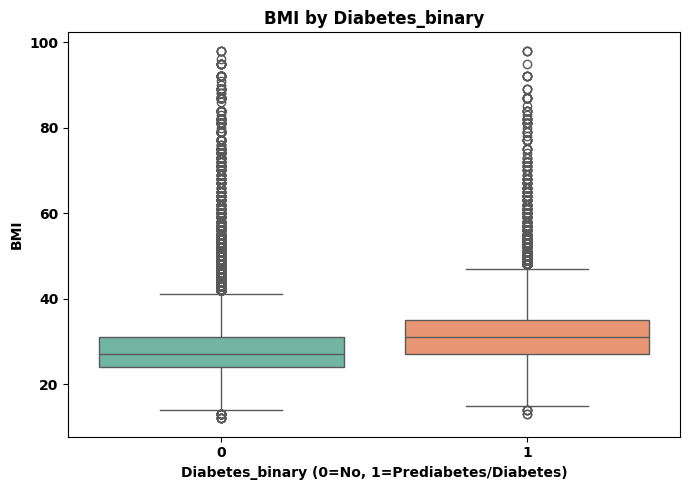

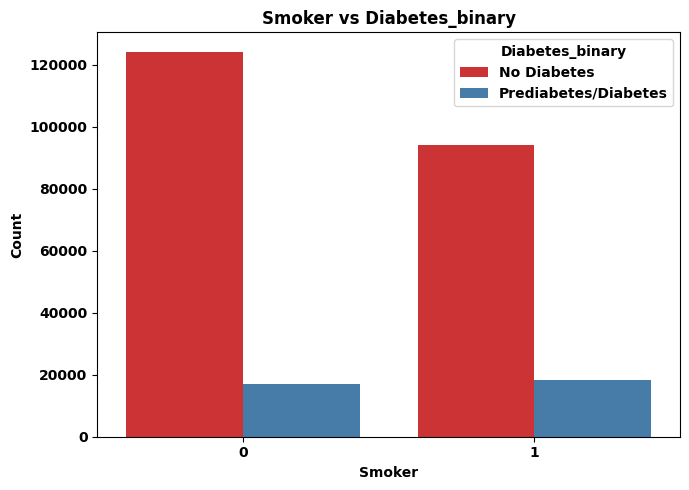

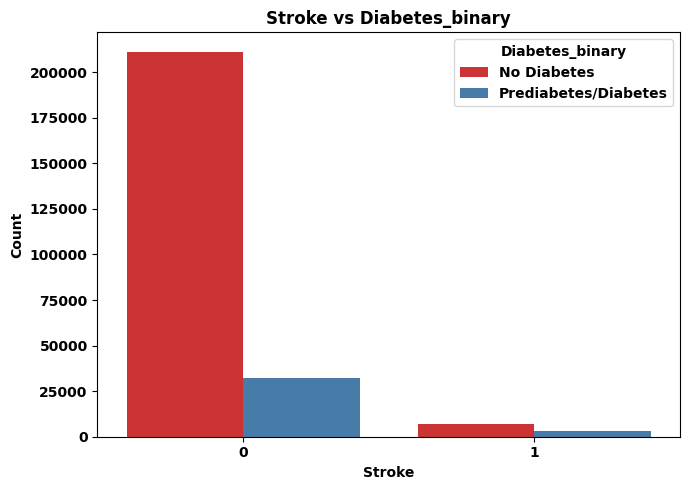

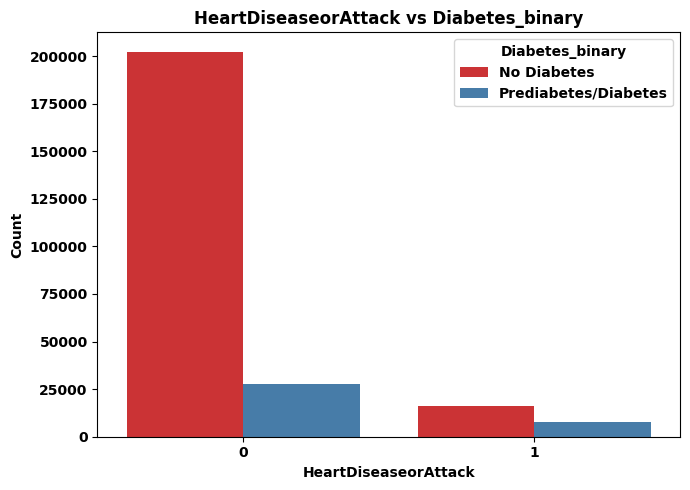

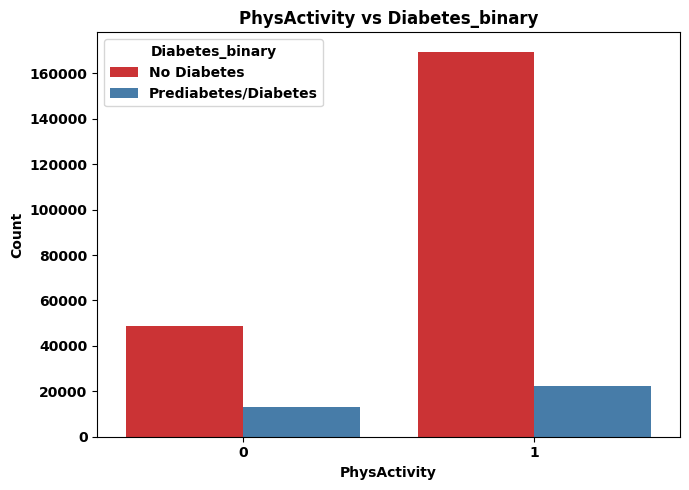

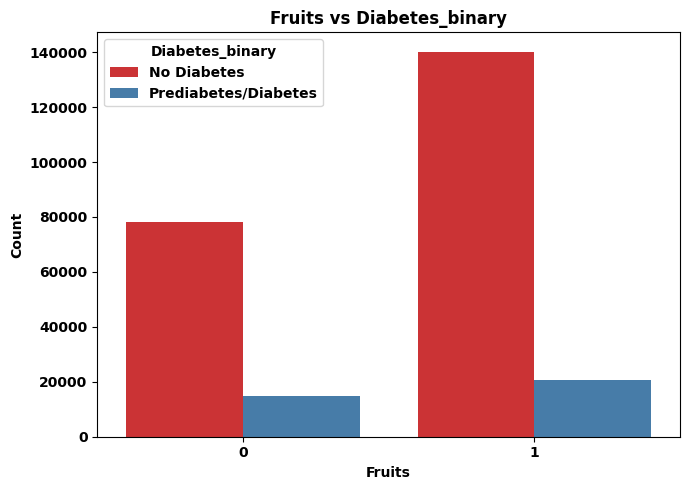

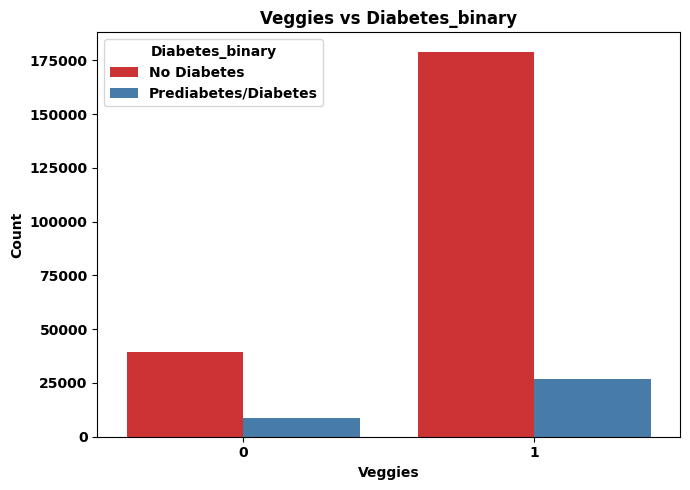

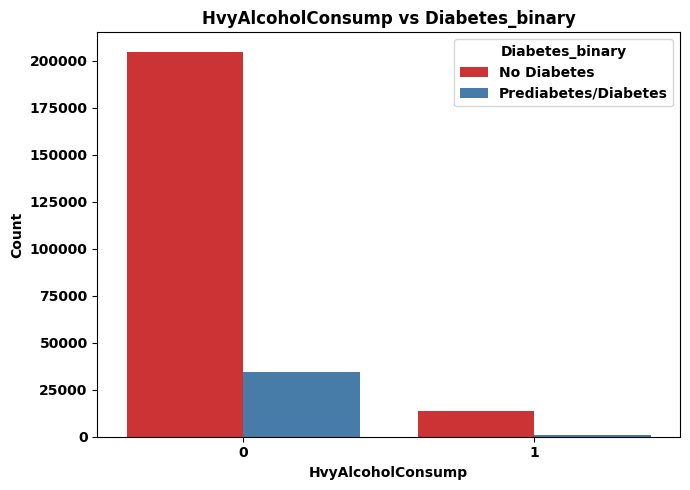

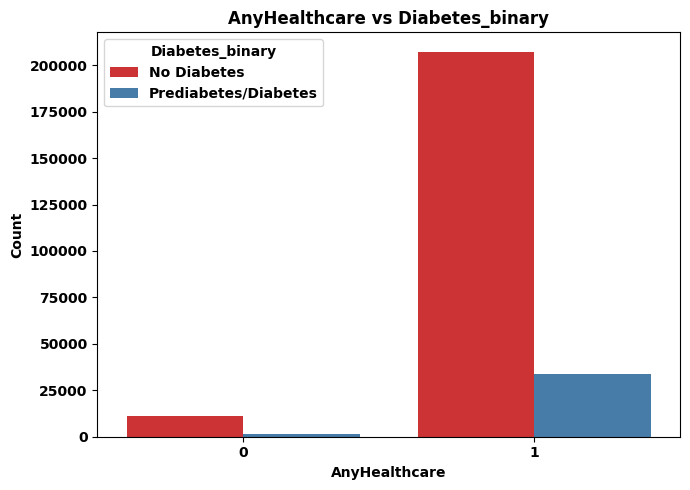

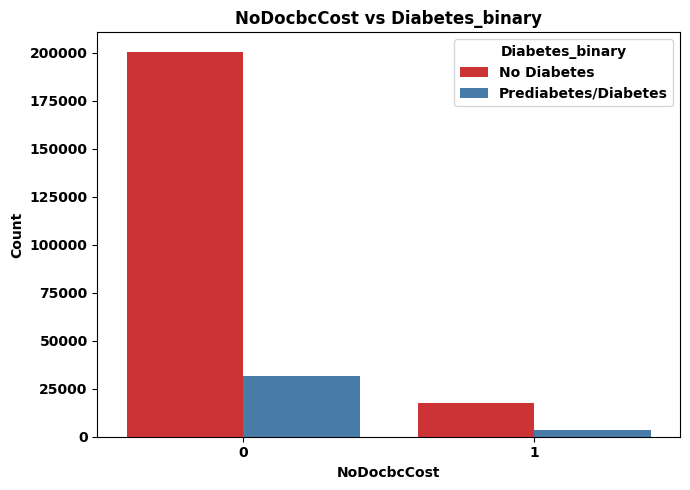

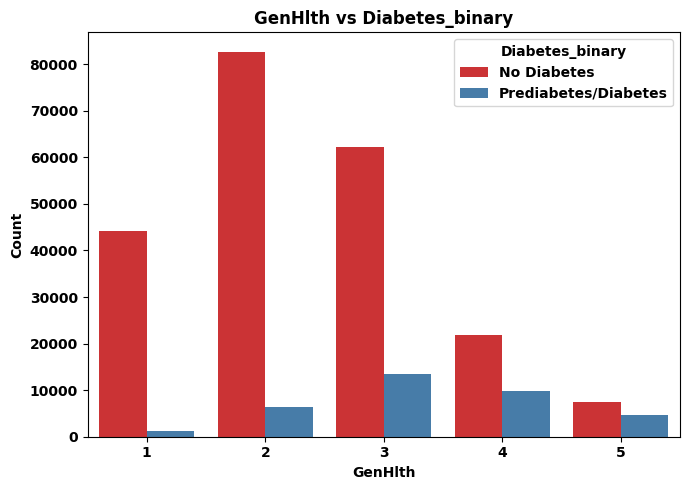

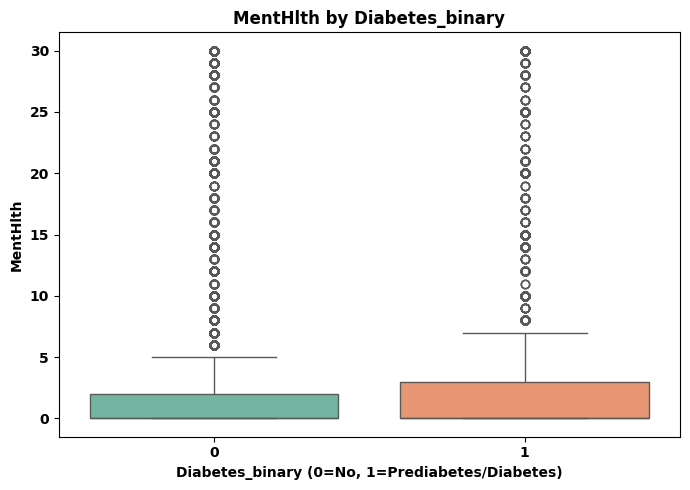

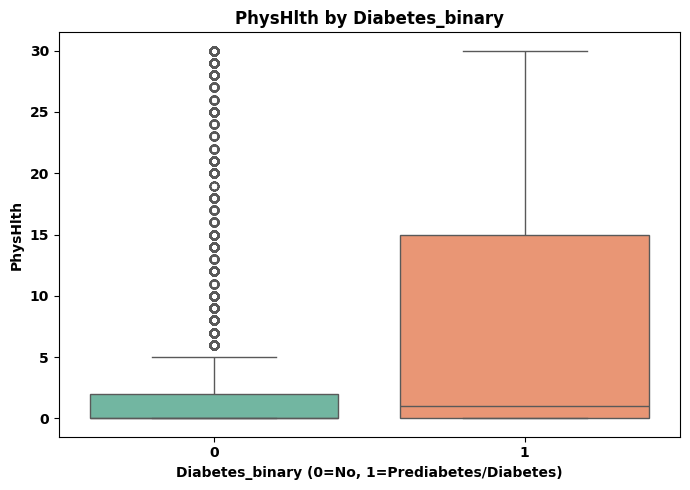

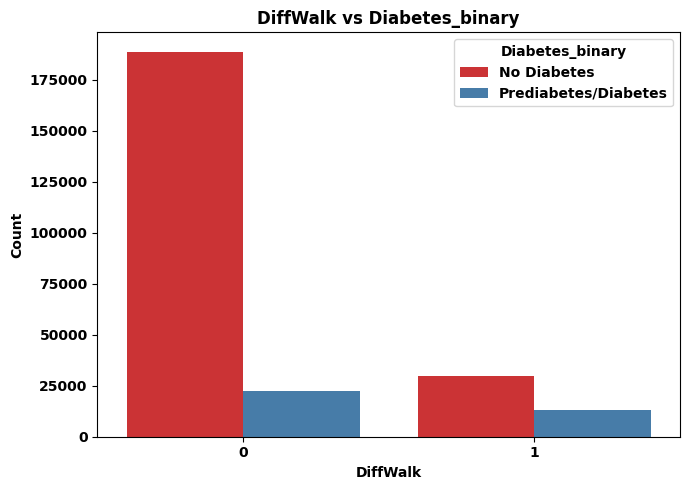

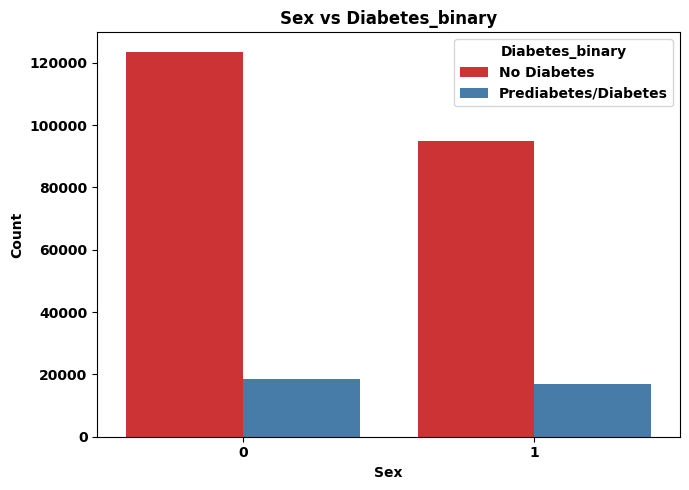

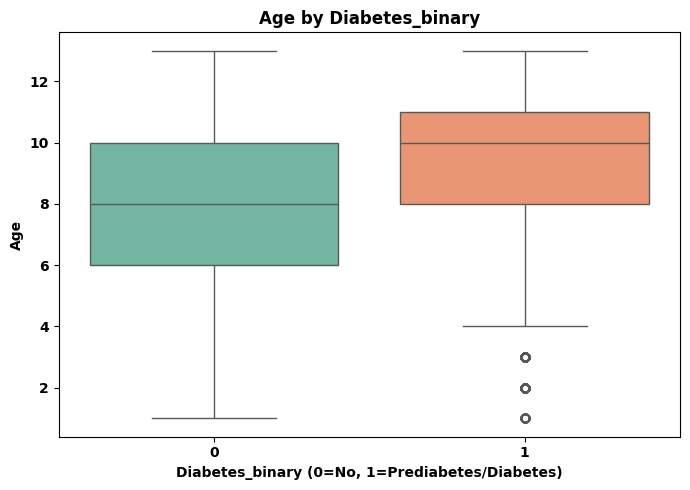

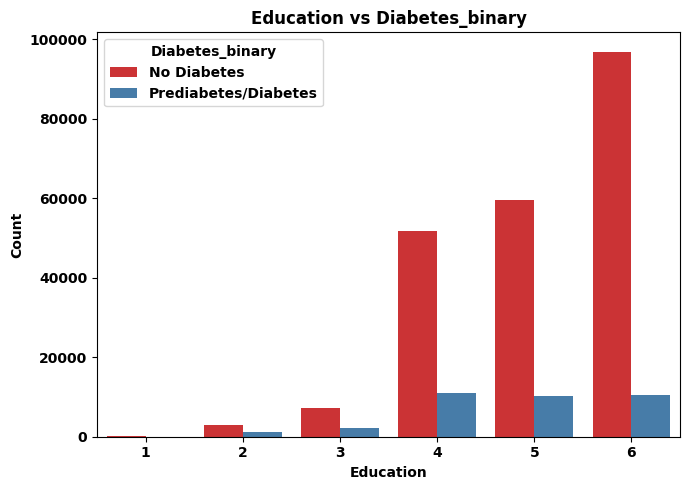

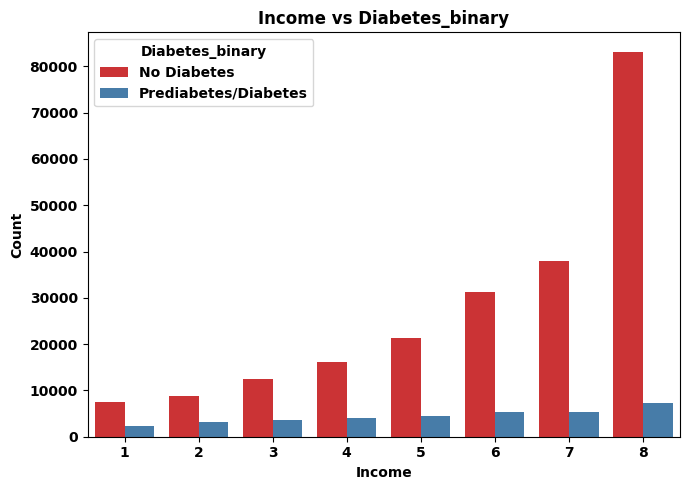

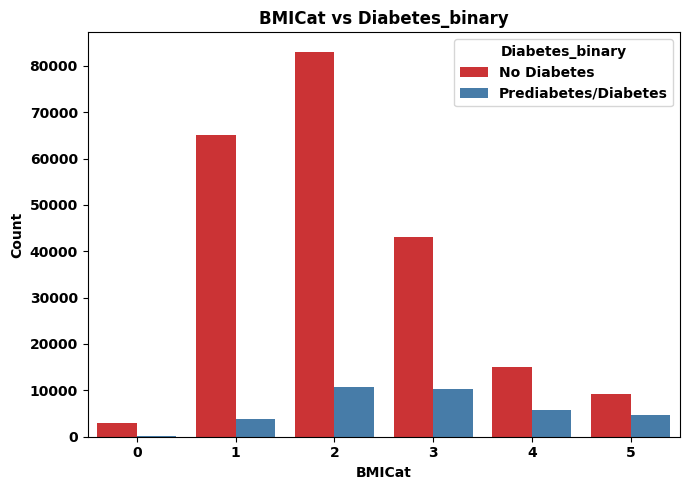

In [16]:
# Visualize feature-to-target patterns for all features
all_features = [col for col in df.columns if col != 'Diabetes_binary']

for feature in all_features:
    plt.figure(figsize=(7, 5))
    if df[feature].nunique() <= 10 and df[feature].dtype in [int, 'int64', 'int32']:
        # Categorical or ordinal: use countplot with hue
        sns.countplot(data=df, x=feature, hue='Diabetes_binary', palette='Set1')
        plt.title(f'{feature} vs Diabetes_binary')
        plt.xlabel(feature)
        plt.ylabel('Count')
        plt.legend(title='Diabetes_binary', labels=['No Diabetes', 'Prediabetes/Diabetes'])
    else:
        # Continuous: use boxplot, assign hue to avoid FutureWarning
        sns.boxplot(data=df, x='Diabetes_binary', y=feature, hue='Diabetes_binary', palette='Set2', legend=False)
        plt.title(f'{feature} by Diabetes_binary')
        plt.xlabel('Diabetes_binary (0=No, 1=Prediabetes/Diabetes)')
        plt.ylabel(feature)
        plt.legend([],[], frameon=False)  # Hide redundant legend
    plt.tight_layout()
    plt.show()

To analyze the correlation between Diabetes_binary (0 or 1) and each BMI category (BMICat), the code computes the mean diabetes rate for each BMI category and display it as a bar plot.
The actual correlation coefficients (e.g., Pearson), are computed for each category.
The first part shows the average diabetes rate for each BMI category.
The second part shows the correlation coefficient between Diabetes_binary and each BMI category (one-hot encoded).

Mean Diabetes Rate by BMI Category:
BMICat
0    0.054045
1    0.056966
2    0.114049
3    0.192344
4    0.274355
5    0.335372
Name: Diabetes_binary, dtype: float64


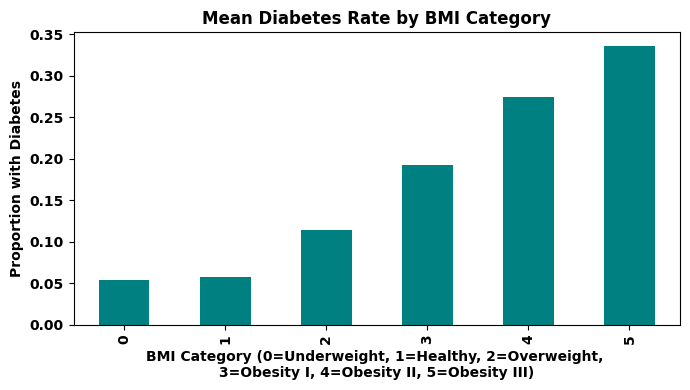


Pearson correlation between Diabetes_binary and each BMICat dummy variable:
BMICat_0: -0.028
BMICat_1: -0.145
BMICat_2: -0.056
BMICat_3: 0.079
BMICat_4: 0.116
BMICat_5: 0.135


In [17]:
# 1. Mean diabetes rate for each BMI category
bmi_diabetes_rate = df.groupby('BMICat')['Diabetes_binary'].mean()
print("Mean Diabetes Rate by BMI Category:")
print(bmi_diabetes_rate)

# Optional: Bar plot
import matplotlib.pyplot as plt
plt.figure(figsize=(7, 4))
bmi_diabetes_rate.plot(kind='bar', color='teal')
plt.title('Mean Diabetes Rate by BMI Category')
plt.xlabel('BMI Category (0=Underweight, 1=Healthy, 2=Overweight, \n3=Obesity I, 4=Obesity II, 5=Obesity III)')
plt.ylabel('Proportion with Diabetes')
plt.tight_layout()
plt.show()

# 2. Pearson correlation between Diabetes_binary and each BMICat dummy variable
bmi_dummies = pd.get_dummies(df['BMICat'], prefix='BMICat')
correlations = {}
for col in bmi_dummies.columns:
    corr = df['Diabetes_binary'].corr(bmi_dummies[col])
    correlations[col] = corr
print("\nPearson correlation between Diabetes_binary and each BMICat dummy variable:")
for cat, corr in correlations.items():
    print(f"{cat}: {corr:.3f}")

## Top 5 Insights from Exploratory Data Analysis

1. **Class Imbalance in Diabetes Status:**  
   The dataset shows a significant imbalance between healthy individuals and those with (pre)diabetes. The majority of records are classified as non-diabetic, which may impact model training and evaluation.

2. **Strongest Correlations with Diabetes:**  
   Features such as HighBP (high blood pressure), HighChol (high cholesterol), and BMI have the highest positive correlations with the Diabetes_binary target. This suggests that individuals with higher blood pressure, cholesterol, and BMI are more likely to have (pre)diabetes.

3. **BMI Distribution and Outliers:**  
   The BMI values in the dataset range widely, with a small number of extreme outliers (very high or low BMI). Most individuals fall within the healthy or overweight categories, but there are notable groups in underweight and severe obesity classes.

4. **Feature-to-Target Patterns:**  
   Visualizations show clear differences in the distributions of features like Age, GenHlth, and PhysHlth between diabetic and non-diabetic groups. For example, older age groups and those reporting poorer general or physical health are more likely to be diabetic.

5. **Binary Health Behaviors:**  
   Health behavior features such as PhysActivity, Fruits, and Veggies show that individuals with healthier behaviors (more physical activity, higher fruit/vegetable intake) are less likely to be diabetic, as seen in the countplots.

# GlucoTrack – Beginner Track  
## ✅ Week 1: Exploratory Data Analysis (EDA)

### 📦 1. Data Integrity & Structure

**Q: Are there any missing, duplicate, or incorrectly formatted entries in the dataset?**  
A:  
- There are no missing values in the dataset (all columns show 0 missing).
- Duplicate rows exist with the feature profile or pattern, but these are not duplicates but individuals with the same questionnaire answers.
- Columns were checked for invalid values (e.g., binary columns, GenHlth, Age, Education, Income), and no incorrectly formatted entries were found based on the provided value ranges.

**Q: Are all data types appropriate (e.g., numeric, categorical)?**  
A:  
- Data types are appropriate for each column. Numeric columns are stored as integers or floats, and categorical variables are encoded as integers.

**Q: Did you detect any constant, near-constant, or irrelevant features?**  
A:  
- No constant or near-constant features were detected in the outputs. All features show variation.

---

### 🎯 2. Target Variable Assessment

**Q: What is the distribution of Diabetes_binary?**  
A:  
- The target variable `Diabetes_binary` is imbalanced, with the majority of records classified as non-diabetic (0) and a smaller proportion as (pre)diabetic (1).

**Q: Is there a class imbalance? If so, how significant is it?**  
A:  
- Yes, there is a significant class imbalance. The ratio of healthy to diabetic patients is much greater than 1, indicating far more healthy individuals.

**Q: How might this imbalance influence your choice of evaluation metrics or model strategy?**  
A:  
- The imbalance suggests that accuracy alone may be misleading. Evaluation metrics such as ROC-AUC, F1-score, precision, and recall should be considered. Techniques like class weighting, resampling, or using specialized algorithms may be needed.

---

### 📊 3. Feature Distribution & Quality

**Q: Which numerical features are skewed or contain outliers?**  
A:  
- BMI is notably skewed and contains outliers, especially at the high and low ends. Other features like Age, MentHlth, and PhysHlth may also show skewness.

**Q: Did any features contain unrealistic or problematic values?**  
A:  
- No unrealistic or problematic values were found based on the value range checks for binary and ordinal features.

**Q: What transformation methods (if any) might improve these feature distributions?**  
A:  
- Log or Box-Cox transformations could help normalize skewed features like BMI. Outlier handling (e.g., winsorization or clipping) may also be beneficial.

---

### 📈 4. Feature Relationships & Patterns

**Q: Which categorical features (e.g., GenHealth, PhysicalActivity, Smoking) show visible patterns in relation to Diabetes_binary?**  
A:  
- Features such as GenHlth, PhysActivity, Fruits, Veggies, and Smoking show visible patterns. For example, poorer general health and less physical activity are associated with higher diabetes prevalence.

**Q: Are there any strong pairwise relationships or multicollinearity between features?**  
A:  
- The correlation matrix shows some strong relationships, particularly between HighBP, HighChol, and BMI with the target. No severe multicollinearity was highlighted, but further analysis may be needed.

**Q: What trends or correlations stood out during your analysis?**  
A:  
- HighBP, HighChol, and BMI have the strongest positive correlations with Diabetes_binary. Healthier behaviors and better self-reported health are associated with lower diabetes risk.

---

### 🧰 5. EDA Summary & Preprocessing Plan

**Q: What are your 3–5 biggest takeaways from EDA?**  
A:  
1. The dataset is highly imbalanced toward non-diabetic individuals.
2. HighBP, HighChol, and BMI are the strongest predictors of diabetes.
3. BMI distribution is skewed with outliers.
4. Health behaviors and self-reported health status are important predictors.
5. No major data quality issues were found.

**Q: Which features will you scale, encode, or exclude in preprocessing?**  
A:  
- Scale: Continuous features like BMI, Age, MentHlth, PhysHlth.
- Encode: Categorical features such as Education, Income, GenHlth.
- Exclude: No features are currently marked for exclusion, but further feature selection may be performed. The highest correlations between variables are moderate (0.4–0.5), they are not high enough to require automatic exclusion.

**Q: What does your cleaned dataset look like (rows, columns, shape)?**  
A:  
- The cleaned dataset contains the same number of rows as the original and all relevant columns. The exact shape can be checked with `df.shape` after preprocessing.

# Week 2: Feature Engineering & Preprocessing
* Encode binary, ordinal, and nominal features appropriately
* Create new features (e.g., BMI categories, health scores)
* Handle data imbalance using techniques like SMOTE or class weights
* Normalize numerical features
* Split data using stratified train/validation/test sets

#### Encode binary, ordinal, and nominal features appropriately
##### Binary features (already 0/1): No further encoding needed for most ML models. All variables are of int64 type. 
* Diabetes_binary
* HighBP
* HighChol
* CholCheck
* Smoker
* Stroke
* HeartDiseaseorAttack
* PhysActivity
* Fruits
* Veggies
* HvyAlcoholConsump
* AnyHealthcare
* NoDocbcCost
* DiffWalk
* Sex  
##### Ordinal features (ordered categories): Should be encoded as integers reflecting their order.
* GenHlth (1=excellent, ..., 5=poor)
* Education (1=No school, ..., 6=College grad)
* Income (1=<$10k, ..., 8=$75k+)
* Age (1=18-24, ..., 13=80+)  
##### Nominal features (unordered categories): Should be one-hot encoded (dummy variables).
* None in this dataset  
##### Special cases:  
* MentHlth, PhysHlth: Numeric counts (0–30), treat as continuous.
* BMI, BMICat: Numeric/ordinal, treat as is.

In [18]:
# Check that ordinal features are correctly integer-encoded and print unique values
ordinal_features = ['GenHlth', 'Education', 'Income', 'Age']
for col in ordinal_features:
    print(f"{col}: type={df[col].dtype}, unique values={sorted(df[col].unique())}")

GenHlth: type=int64, unique values=[np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5)]
Education: type=int64, unique values=[np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6)]
Income: type=int64, unique values=[np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8)]
Age: type=int64, unique values=[np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8), np.int64(9), np.int64(10), np.int64(11), np.int64(12), np.int64(13)]


#### Create new features (e.g., BMI categories, health scores)
* BMICat already done according to WHO categories
* Check MentHlth and PhysHlth whether binary split is sufficient for analysis.

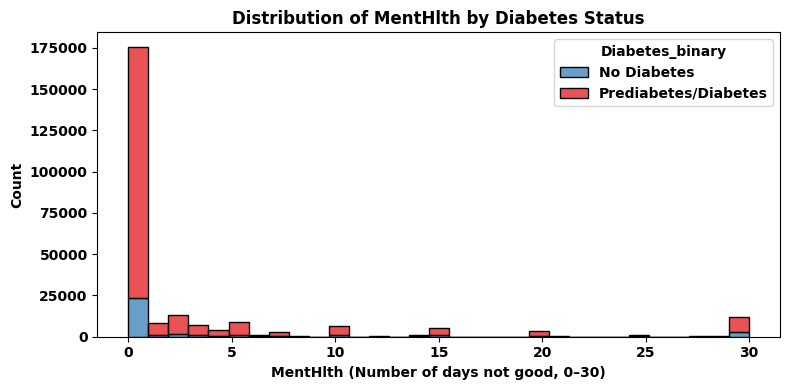

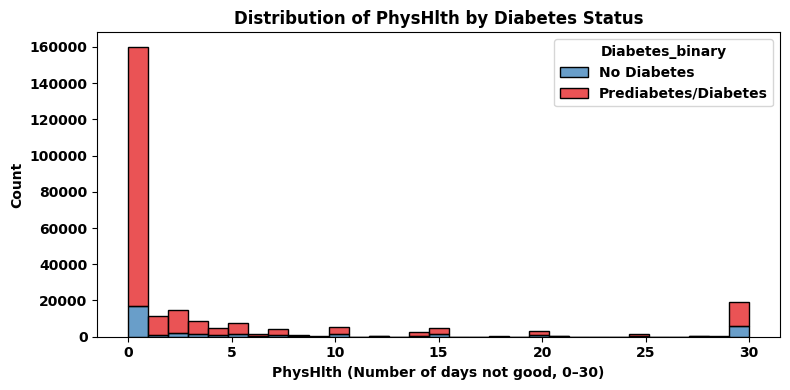


Counts and Percentages of MentHlth (0–30 days) by Diabetes Status:


,No Diabetes,Prediabetes/Diabetes,No Diabetes (%),Prediabetes/Diabetes (%)
MentHlth,,,,
0,152277,23403,69.7,66.2
1,7726,812,3.5,2.3
2,11546,1508,5.3,4.3
3,6457,924,3.0,2.6
4,3300,489,1.5,1.4
5,7807,1223,3.6,3.5
6,824,164,0.4,0.5
7,2695,405,1.2,1.1
8,529,110,0.2,0.3



Counts and Percentages of PhysHlth (0–30 days) by Diabetes Status:


,No Diabetes,Prediabetes/Diabetes,No Diabetes (%),Prediabetes/Diabetes (%)
PhysHlth,,,,
0,143312,16740,65.6,47.4
1,10200,1188,4.7,3.4
2,12736,2028,5.8,5.7
3,7206,1289,3.3,3.6
4,3779,763,1.7,2.2
5,6308,1314,2.9,3.7
6,1048,282,0.5,0.8
7,3795,743,1.7,2.1
8,650,159,0.3,0.4



MentHlth category proportions by Diabetes_binary:
Diabetes_binary     0     1
MentHlthCat                
0 days           69.7  66.2
1-5 days         16.9  14.0
6-15 days         7.0   8.6
16-30 days        6.4  11.1

PhysHlth category proportions by Diabetes_binary:
Diabetes_binary     0     1
PhysHlthCat                
0 days           65.6  47.4
1-5 days         18.4  18.6
6-15 days         7.4  12.5
16-30 days        8.5  21.5

MentHlth (0 days vs 1-30 days) proportions by Diabetes_binary:
Diabetes_binary     0     1
0 days           69.7  66.2
1-30 days        30.3  33.8

PhysHlth (0 days vs 1-30 days) proportions by Diabetes_binary:
Diabetes_binary     0     1
0 days           65.6  47.4
1-30 days        34.4  52.6
Diabetes_binary     0     1
0 days           65.6  47.4
1-30 days        34.4  52.6


In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Plot distributions of MentHlth and PhysHlth by diabetes status
for col in ['MentHlth', 'PhysHlth']:
    plt.figure(figsize=(8, 4))
    sns.histplot(data=df, x=col, hue='Diabetes_binary', bins=31, multiple='stack', kde=False, palette='Set1')
    plt.title(f'Distribution of {col} by Diabetes Status')
    plt.xlabel(f'{col} (Number of days not good, 0–30)')
    plt.ylabel('Count')
    plt.legend(title='Diabetes_binary', labels=['No Diabetes', 'Prediabetes/Diabetes'])
    plt.tight_layout()
    plt.show()

# Create and display tables of counts and percentages for MentHlth and PhysHlth by diabetes status
for col in ['MentHlth', 'PhysHlth']:
    print(f'\nCounts and Percentages of {col} (0–30 days) by Diabetes Status:')
    count_table = pd.crosstab(df[col], df['Diabetes_binary'], rownames=[col], colnames=['Diabetes_binary'])
    count_table.columns = ['No Diabetes', 'Prediabetes/Diabetes']
    # Calculate percentages for each diabetes status column
    percent_table = count_table.div(count_table.sum(axis=0), axis=1) * 100
    percent_table.columns = ['No Diabetes (%)', 'Prediabetes/Diabetes (%)']
    # Combine counts and percentages into one table
    combined_table = pd.concat([count_table, percent_table], axis=1)
    display(combined_table.round(1))

# Proportion of people in different bins for MentHlth and PhysHlth, by diabetes status
bins = [0, 0.5, 5.5, 15.5, 30.1]
labels = ['0 days', '1-5 days', '6-15 days', '16-30 days']

for col in ['MentHlth', 'PhysHlth']:
    df[f'{col}Cat'] = pd.cut(df[col], bins=bins, labels=labels, right=False)
    print(f'\n{col} category proportions by Diabetes_binary:')
    ctab = pd.crosstab(df[f'{col}Cat'], df['Diabetes_binary'], normalize='columns') * 100
    print(ctab.round(1))

# Proportion of people in simple binary split (0 vs 1-30 days):
for col in ['MentHlth', 'PhysHlth']:
    df[f'{col}Bin'] = (df[col] > 0).astype(int)
    print(f'\n{col} (0 days vs 1-30 days) proportions by Diabetes_binary:')
    ctab_bin = pd.crosstab(df[f'{col}Bin'], df['Diabetes_binary'], normalize='columns') * 100
    ctab_bin.index = ['0 days', '1-30 days']
    print(ctab_bin.round(1))

#### Interpretation of previous results:

**MentHlth (Mental Health) by Diabetes Status:**
- For people without diabetes (0), 69.7% reported 0 days of poor mental health in the past month, while 66.2% of those with diabetes (1) reported 0 days.
- The proportion of people with more days of poor mental health (especially 16–30 days) is higher in the diabetes group (11.1%) than in the non-diabetes group (6.4%).
- This suggests that poor mental health is more common among those with diabetes, but the difference is moderate.

**PhysHlth (Physical Health) by Diabetes Status:**
- 65.6% of non-diabetics reported 0 days of poor physical health, compared to only 47.4% of diabetics.
- The percentage of people with 16–30 days of poor physical health is much higher in the diabetes group (21.5%) than in the non-diabetes group (8.5%).
- This indicates a stronger association between poor physical health and diabetes status.

**Binary Splits (0 days vs 1–30 days):**
- For both MentHlth and PhysHlth, a higher proportion of diabetics report at least 1 day of poor health compared to non-diabetics.
- The difference is especially pronounced for PhysHlth: 52.6% of diabetics had at least 1 day of poor physical health, compared to 34.4% of non-diabetics.

**Summary:**  
- Poor physical health is much more common among people with diabetes, and poor mental health is also somewhat more common.
- The largest differences are seen in the highest category (16–30 days), especially for physical health.
- These features may be useful for predicting diabetes, and using more than just a binary split (e.g., 0, 1–5, 6–15, 16–30 days) could capture more information, especially for PhysHlth.

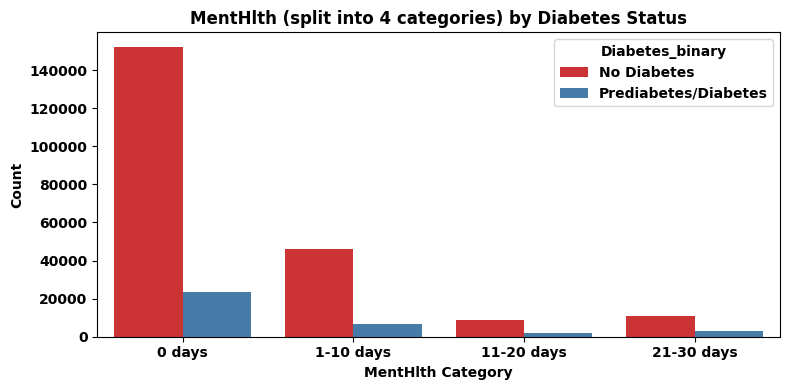

,No Diabetes,Prediabetes/Diabetes,No Diabetes (%),Prediabetes/Diabetes (%)
MentHlth_4cat,,,,
0 days,152277,23403,69.7,66.2
1-10 days,46271,6712,21.2,19.0
11-20 days,8760,2011,4.0,5.7
21-30 days,11026,3220,5.1,9.1


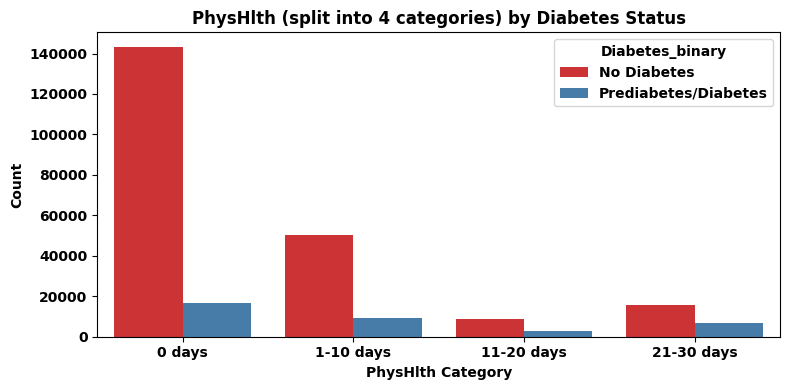

,No Diabetes,Prediabetes/Diabetes,No Diabetes (%),Prediabetes/Diabetes (%)
PhysHlth_4cat,,,,
0 days,143312,16740,65.6,47.4
1-10 days,50170,9092,23.0,25.7
11-20 days,8923,2941,4.1,8.3
21-30 days,15929,6573,7.3,18.6


In [20]:
# Split MentHlth and PhysHlth into 4 categories: 0 day, 1-10 days, 11-20 days, 21-30 days
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Define bins and labels for the new categories
split_bins = [0, 0.5, 10.5, 20.5, 30.1]
split_labels = ['0 days', '1-10 days', '11-20 days', '21-30 days']

for col in ['MentHlth', 'PhysHlth']:
    df[f'{col}_4cat'] = pd.cut(df[col], bins=split_bins, labels=split_labels, right=False)

    # Visualize distribution by diabetes status
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=f'{col}_4cat', hue='Diabetes_binary', palette='Set1')
    plt.title(f'{col} (split into 4 categories) by Diabetes Status')
    plt.xlabel(f'{col} Category')
    plt.ylabel('Count')
    plt.legend(title='Diabetes_binary', labels=['No Diabetes', 'Prediabetes/Diabetes'])
    plt.tight_layout()
    plt.show()

    # Show table of counts and percentages by diabetes status
    count_table = pd.crosstab(df[f'{col}_4cat'], df['Diabetes_binary'], rownames=[f'{col}_4cat'], colnames=['Diabetes_binary'])
    count_table.columns = ['No Diabetes', 'Prediabetes/Diabetes']
    percent_table = count_table.div(count_table.sum(axis=0), axis=1) * 100
    percent_table.columns = ['No Diabetes (%)', 'Prediabetes/Diabetes (%)']
    combined_table = pd.concat([count_table, percent_table], axis=1)
    display(combined_table.round(1))

#### Summary:
* Use the new split for a simpler, broader overview or when you want to focus on persistent health issues.
* Use the previous split if you need more detail about mild/moderate cases.
* In both cases, the main finding holds: higher frequencies of poor health are associated with diabetes, especially for physical health.

In [21]:
# Create a new feature TotalHealthDays by summing PhysHlth and MentHlth
df['TotalHealthDays'] = df['PhysHlth'] + df['MentHlth']

# Display summary statistics for the new feature
print(df['TotalHealthDays'].describe())

count    253680.000000
mean          7.426853
std          13.291279
min           0.000000
25%           0.000000
50%           1.000000
75%           7.000000
max          60.000000
Name: TotalHealthDays, dtype: float64


In [22]:
# Calculate and display correlations with Diabetes_binary, sorted from biggest to smallest
correlations = df.corr(numeric_only=True)['Diabetes_binary'].drop('Diabetes_binary')
correlation_table = correlations.sort_values(ascending=False).reset_index()
correlation_table.columns = ['Feature', 'Correlation with Diabetes_binary']
print(correlation_table.round(2))

                 Feature  Correlation with Diabetes_binary
0                GenHlth                              0.29
1                 HighBP                              0.26
2                 BMICat                              0.23
3               DiffWalk                              0.22
4                    BMI                              0.22
5               HighChol                              0.20
6                    Age                              0.18
7   HeartDiseaseorAttack                              0.18
8               PhysHlth                              0.17
9        TotalHealthDays                              0.15
10           PhysHlthBin                              0.13
11                Stroke                              0.11
12              MentHlth                              0.07
13             CholCheck                              0.06
14                Smoker                              0.06
15           NoDocbcCost                              0.

In [23]:
# Create composite health scores based on feature groupings
import numpy as np

# 1. Physical Health Score (higher = worse health)
df['PhysicalHealthScore'] = (
    df['PhysHlth'].clip(0, 30) +
    df['DiffWalk'] * 10 +
    (df['GenHlth'] - 1) * 6 +
    (df['BMICat'] > 1).astype(int) * 5 +
    df['HighBP'] * 5 +
    df['HighChol'] * 5 +
    df['HeartDiseaseorAttack'] * 10 +
    df['Stroke'] * 10
 )

# 2. Mental Health Score (higher = worse health)
df['MentalHealthScore'] = df['MentHlth'].clip(0, 30)

# 3. Healthy Lifestyle Score (higher = healthier)
df['HealthyLifestyleScore'] = (
    df['PhysActivity'] +
    df['Fruits'] +
    df['Veggies'] +
    (1 - df['HvyAlcoholConsump']) +
    (1 - df['Smoker'])
 )

# 4. Healthcare Access Score (higher = better access)
df['HealthcareAccessScore'] = df['AnyHealthcare'] + (1 - df['NoDocbcCost'])

# 5. Socioeconomic Score (higher = higher SES)
df['SocioeconomicScore'] = (
    df['Education'] +
    df['Income'] +
    df['Age']
 )

# Display summary statistics for the new scores
score_cols = ['PhysicalHealthScore', 'MentalHealthScore', 'HealthyLifestyleScore', 'HealthcareAccessScore', 'SocioeconomicScore']
print(df[score_cols].describe())

       PhysicalHealthScore  MentalHealthScore  HealthyLifestyleScore  \
count        253680.000000      253680.000000          253680.000000   
mean             24.185158           3.184772               3.702854   
std              19.237502           7.412847               1.089246   
min               0.000000           0.000000               0.000000   
25%              11.000000           0.000000               3.000000   
50%              19.000000           0.000000               4.000000   
75%              32.000000           2.000000               5.000000   
max              99.000000          30.000000               5.000000   

       HealthcareAccessScore  SocioeconomicScore  
count          253680.000000       253680.000000  
mean                1.866876           19.136428  
std                 0.389235            3.767411  
min                 0.000000            4.000000  
25%                 2.000000           17.000000  
50%                 2.000000           20.000

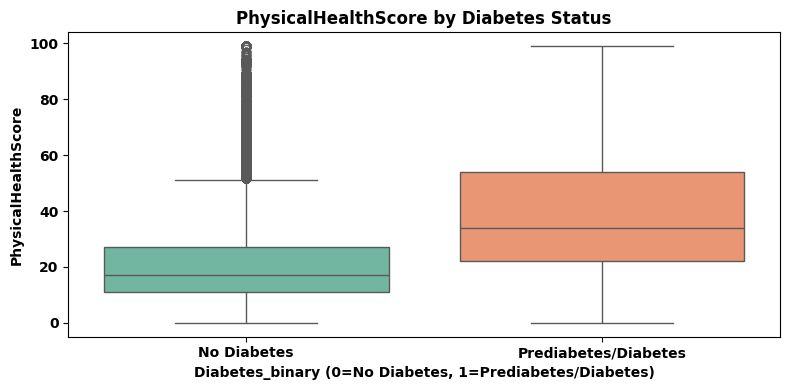


Summary statistics for PhysicalHealthScore by Diabetes Status:
                       mean    std   count
No Diabetes           21.61  17.53  218334
Prediabetes/Diabetes  40.10  21.55   35346


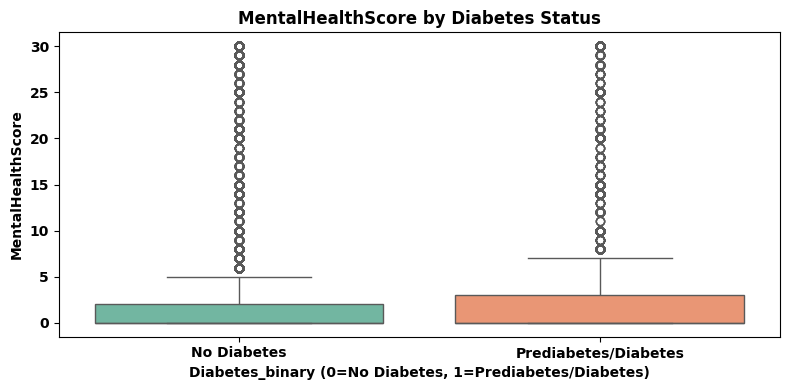


Summary statistics for MentalHealthScore by Diabetes Status:
                      mean   std   count
No Diabetes           2.98  7.11  218334
Prediabetes/Diabetes  4.46  8.95   35346


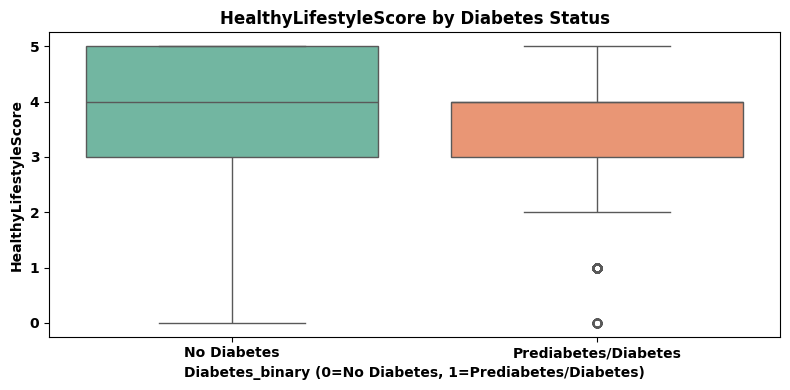


Summary statistics for HealthyLifestyleScore by Diabetes Status:
                      mean   std   count
No Diabetes           3.75  1.08  218334
Prediabetes/Diabetes  3.43  1.10   35346


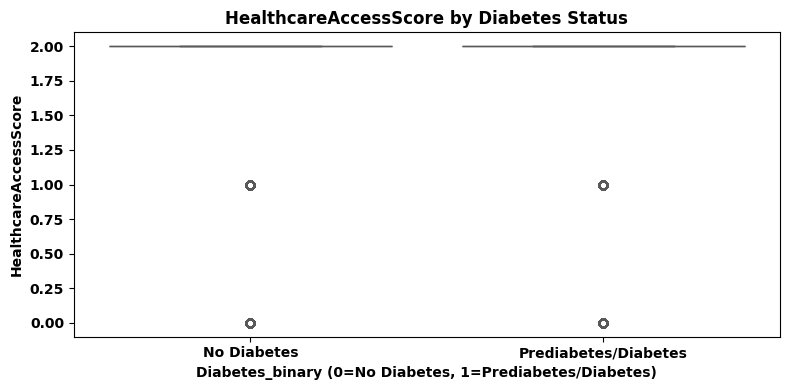


Summary statistics for HealthcareAccessScore by Diabetes Status:
                      mean   std   count
No Diabetes           1.87  0.39  218334
Prediabetes/Diabetes  1.85  0.40   35346


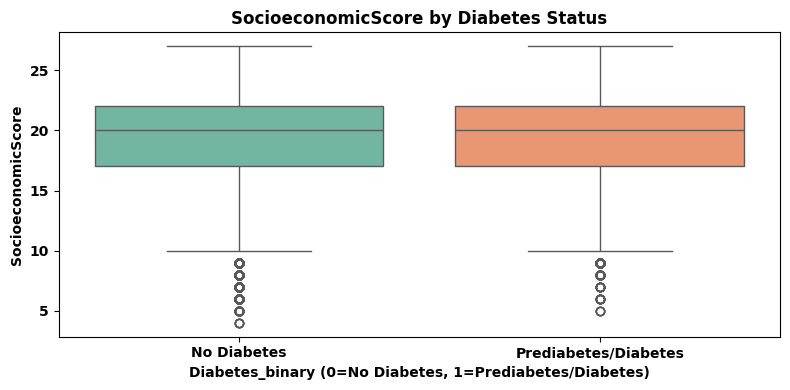


Summary statistics for SocioeconomicScore by Diabetes Status:
                       mean   std   count
No Diabetes           19.10  3.79  218334
Prediabetes/Diabetes  19.33  3.60   35346


In [24]:
# Visualize and show tables for composite health scores by diabetes status
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

score_cols = ['PhysicalHealthScore', 'MentalHealthScore', 'HealthyLifestyleScore', 'HealthcareAccessScore', 'SocioeconomicScore']

for score in score_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=df, x='Diabetes_binary', y=score, hue='Diabetes_binary', palette='Set2', legend=False)
    plt.title(f'{score} by Diabetes Status')
    plt.xlabel('Diabetes_binary (0=No Diabetes, 1=Prediabetes/Diabetes)')
    plt.ylabel(score)
    plt.xticks([0, 1], ['No Diabetes', 'Prediabetes/Diabetes'])
    plt.tight_layout()
    plt.show()

    # Show table of mean, std, and count by diabetes status
    summary = df.groupby('Diabetes_binary')[score].agg(['mean', 'std', 'count']).round(2)
    summary.index = ['No Diabetes', 'Prediabetes/Diabetes']
    print(f'\nSummary statistics for {score} by Diabetes Status:')
    print(summary)

### Interpretation of previous results

**PhysicalHealthScore**
- Mean is much higher for the diabetes group (40.10) than for the non-diabetes group (21.61).
- Indicates that people with diabetes have significantly worse physical health (more days of poor health, more comorbidities, etc.).
- Standard deviation is also higher, showing more variability among diabetics.

**MentalHealthScore**
- Mean is higher for diabetics (4.46) than non-diabetics (2.98), but the difference is smaller than for physical health.
- Suggests poor mental health is somewhat more common among diabetics, but less strongly associated than physical health.

**HealthyLifestyleScore**
- Mean is lower for diabetics (3.43) than non-diabetics (3.75).
- Indicates that people with diabetes tend to have less healthy lifestyles (less physical activity, more smoking/drinking, etc.).

**HealthcareAccessScore**
- Means are very similar (1.87 vs 1.85), suggesting little difference in healthcare access between groups.

**SocioeconomicScore**
- Means are very close (19.10 vs 19.33), indicating similar socioeconomic status between groups.

### Which Scores to Use for Baseline Models

For baseline models like Logistic Regression, Decision Trees, and Naive Bayes, you should use features that show clear differences between groups and are likely to be predictive:

- **PhysicalHealthScore**: Strongest difference; highly predictive.
- **HealthyLifestyleScore**: Moderate difference; likely predictive.
- **MentalHealthScore**: Some difference; may add value.

**HealthcareAccessScore** and **SocioeconomicScore** show little difference and may not add much predictive power for baseline models, but these can be included for completeness and letting the model determine their importance.

**Recommended for baseline models:**  
- PhysicalHealthScore  
- HealthyLifestyleScore  
- MentalHealthScore  

**How to decide which technique to use for handling imbalances:**

- **Class Weights:**  
  - Use when model supports it (e.g., Logistic Regression, Decision Trees in scikit-learn).
  - It’s simple, does not change data, and works well for moderate imbalance.
  - Recommended as a first step for most baseline models.

- **SMOTE (Synthetic Minority Over-sampling Technique):**  
  - Use when class imbalance is severe and class weights alone are not enough.
  - SMOTE creates synthetic samples of the minority class to balance the dataset.
  - Use with models that do not support class weights, or if both approaches are tried for comparison.
  - Only apply SMOTE to the training set (never to validation/test sets).

**Summary Table:**

| Variable           | Use Class Weights? | Use SMOTE?         |
|--------------------|-------------------|--------------------|
| Diabetes_binary    | Yes (preferred)   | Yes (optional)     |
| Health Scores      | No                | No                 |

**Both:**  
SMOTE used to balance the training data and class weights in model. Evaluate performance on an untouched validation/test set.

Data split into stratified train/validation/test sets should be done **before** normalizing numerical features and before applying SMOTE.

**Best practice order:**
1. Split the data (stratified) into train, validation, and test sets.
2. Fit the scaler (e.g., StandardScaler, MinMaxScaler) only on the training set, then transform train, validation, and test sets.
3. Apply SMOTE only to the (already scaled) training set.
4. Use class weights in your model as needed.

**Why?**
- Splitting first prevents data leakage—information from the validation/test sets should not influence scaling or synthetic sample creation.
- Scaling before SMOTE is important because SMOTE uses distances between samples.
- Never apply SMOTE or fit scalers on the whole dataset before splitting.

**Summary:**  
- Split first, then scale, then apply SMOTE (train set only), then use class weights in your model.

In [25]:
# Split the data into stratified train, validation, and test sets
from sklearn.model_selection import train_test_split

# Define a comprehensive feature list (original features)
features = [
    
    # Original features
    'HighBP', 'HighChol', 'CholCheck', 'BMI', 'BMICat', 'Smoker', 'Stroke',
    'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump',
    'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk',
    'Sex', 'Age', 'Education', 'Income',
    # Add engineered feature
    'TotalHealthDays'
    ]

target = 'Diabetes_binary'

# X = feature matrix, y = target vector
X = df[features]
y = df[target]

# First split: train+val vs test (80% train+val, 20% test)
X_trainval, X_test, y_trainval, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Second split: train vs val (75% train, 25% val of train+val)
X_train, X_val, y_train, y_val = train_test_split(
    X_trainval, y_trainval, test_size=0.25, stratify=y_trainval, random_state=42
)

print(f"Train set: {X_train.shape[0]} samples")
print(f"Validation set: {X_val.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")
print("Class distribution in train:")
print(y_train.value_counts(normalize=True).round(3))
print("Class distribution in validation:")
print(y_val.value_counts(normalize=True).round(3))
print("Class distribution in test:")
print(y_test.value_counts(normalize=True).round(3))

Train set: 152208 samples
Validation set: 50736 samples
Test set: 50736 samples
Class distribution in train:
Diabetes_binary
0    0.861
1    0.139
Name: proportion, dtype: float64
Class distribution in validation:
Diabetes_binary
0    0.861
1    0.139
Name: proportion, dtype: float64
Class distribution in test:
Diabetes_binary
0    0.861
1    0.139
Name: proportion, dtype: float64


To select the best scaler for your training set, follow these steps:

1. **Understand your data distribution:**
   - If your numerical features are approximately normally distributed (bell-shaped), use `StandardScaler` (z-score normalization).
   - If your features are not normal, have outliers, or are bounded (e.g., all positive), `MinMaxScaler` (scales to [0, 1]) or `RobustScaler` (uses median/IQR, robust to outliers) may be better.

2. **Visualize feature distributions:**
   - Plot histograms or boxplots of your numerical features (e.g., BMI, Age, MentHlth, PhysHlth, and composite scores).
   - Check for skewness and outliers.

3. **Try different scalers and compare:**
   - Fit each scaler (`StandardScaler`, `MinMaxScaler`, `RobustScaler`) on the training set.
   - Transform the training set and visualize the scaled distributions.
   - Optionally, run a simple model (e.g., logistic regression) with each scaling method and compare validation performance.

**Summary Table:**

| Scaler           | When to Use                                      |
|------------------|--------------------------------------------------|
| StandardScaler   | Data is roughly normal, no extreme outliers      |
| MinMaxScaler     | Data is not normal, bounded, or for neural nets  |
| RobustScaler     | Data has many outliers                           |

**Best Practice:**  
- For most ML models, `StandardScaler` is a good default if your data is not highly skewed or full of outliers.
- For tree-based models (Decision Trees, Random Forests), scaling is less critical.
- For models sensitive to feature scale (Logistic Regression, SVM, KNN, Neural Nets), scaling is important.

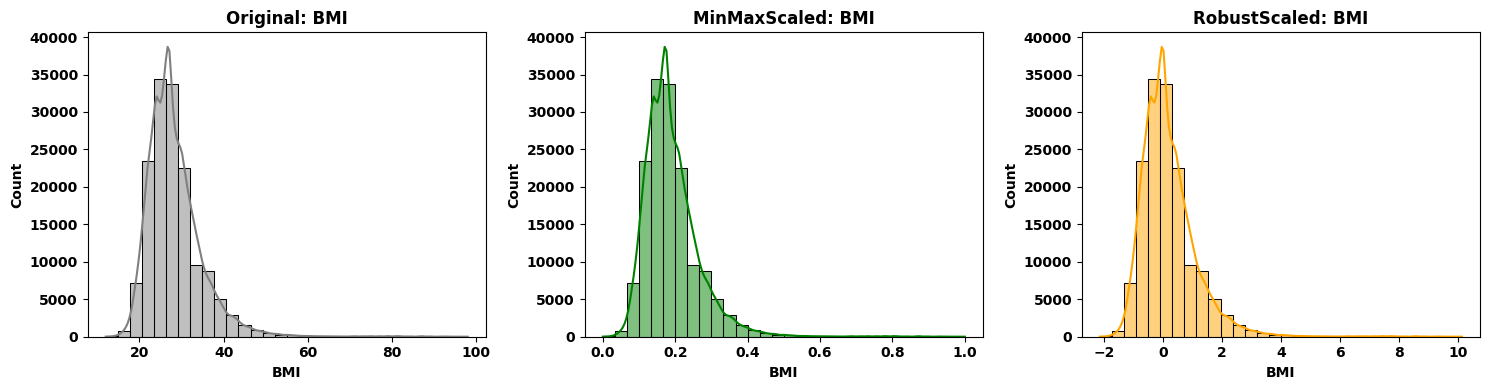

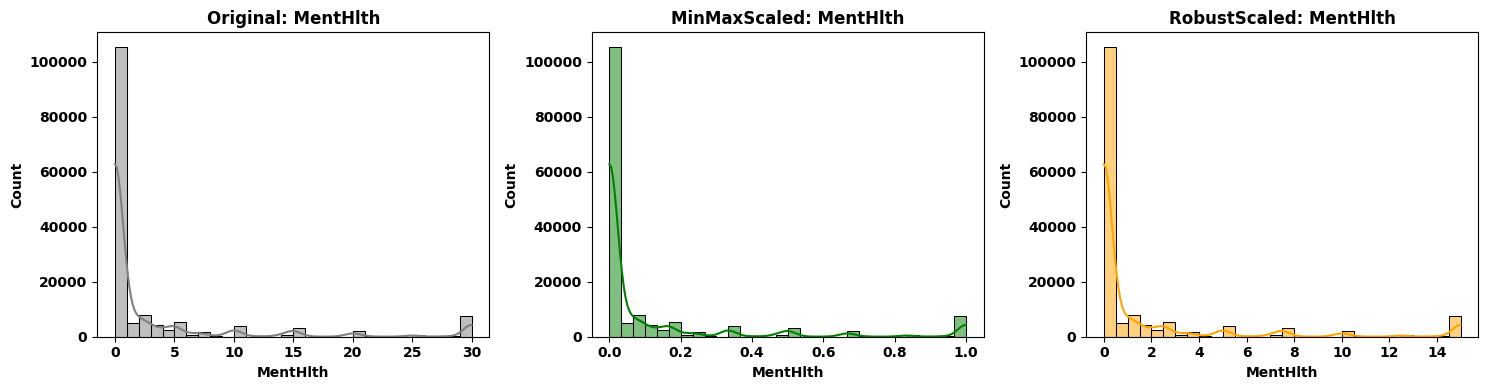

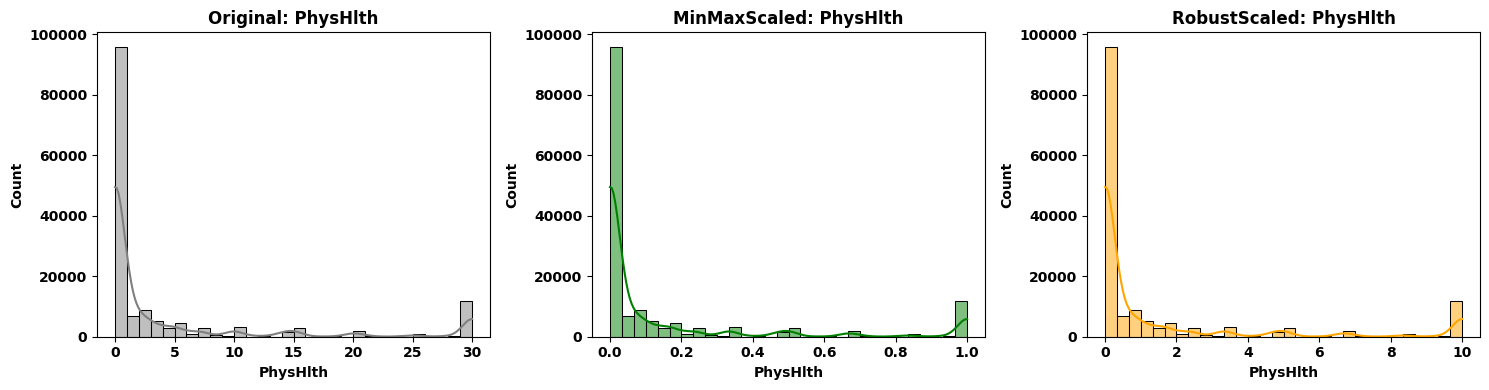

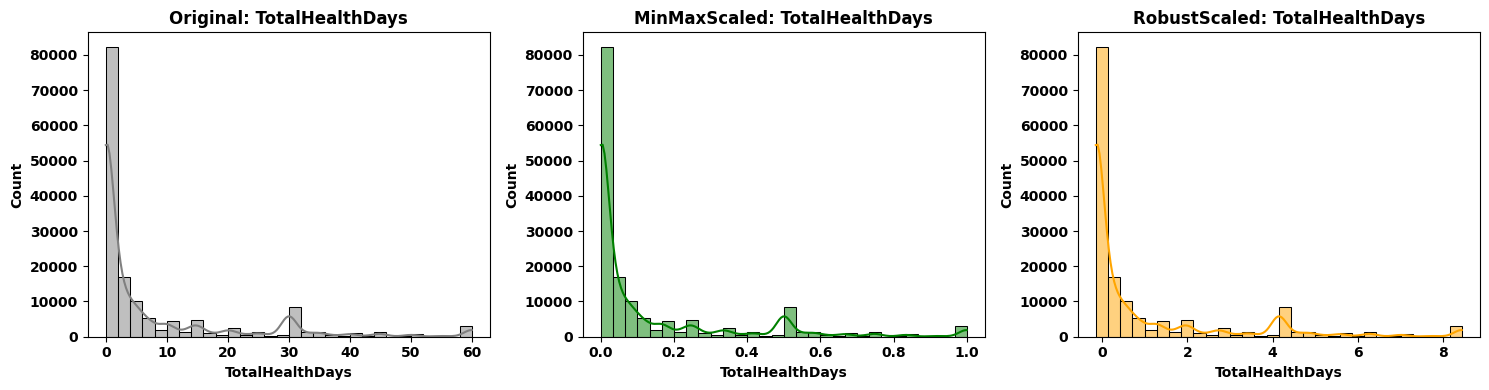

In [26]:
# --- Scaling: MinMaxScaler and RobustScaler ---
from sklearn.preprocessing import MinMaxScaler, RobustScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Select only numerical features for scaling (exclude categorical/ordinal/engineered categorical)
numerical_features = ['BMI','MentHlth', 'PhysHlth', 'TotalHealthDays']

# Fit scalers only on the training set
minmax_scaler = MinMaxScaler()
robust_scaler = RobustScaler()

X_train_num = X_train[numerical_features]

X_train_minmax = pd.DataFrame(minmax_scaler.fit_transform(X_train_num), columns=numerical_features)
X_train_robust = pd.DataFrame(robust_scaler.fit_transform(X_train_num), columns=numerical_features)

# Visualize distributions before and after scaling for features
features_to_plot = ['BMI', 'MentHlth', 'PhysHlth', 'TotalHealthDays']

for feature in features_to_plot:
    plt.figure(figsize=(15, 4))
    plt.subplot(1, 3, 1)
    sns.histplot(X_train_num[feature], bins=30, kde=True, color='gray')
    plt.title(f'Original: {feature}')
    plt.subplot(1, 3, 2)
    sns.histplot(X_train_minmax[feature], bins=30, kde=True, color='green')
    plt.title(f'MinMaxScaled: {feature}')
    plt.subplot(1, 3, 3)
    sns.histplot(X_train_robust[feature], bins=30, kde=True, color='orange')
    plt.title(f'RobustScaled: {feature}')
    plt.tight_layout()
    plt.show()

# You can now use X_train_minmax or X_train_robust for modeling, and apply the same scaler to val/test sets as needed.

RobustScaler is less sensitive to outliers; it keeps the bulk of the data in a similar range and does not let outliers dominate the scaling.
BMI, MenHealth, and PhysHealth have many outliers. RobustScaler is often preferred because it prevents outliers from compressing the rest of the data into a narrow range.

In [27]:
# --- Transform validation and test sets using fitted scalers ---
# robust_scaler is already fitted on X_train[numerical_features]

X_val_num = X_val[numerical_features]
X_test_num = X_test[numerical_features]

X_val_robust = pd.DataFrame(robust_scaler.transform(X_val_num), columns=numerical_features)
X_test_robust = pd.DataFrame(robust_scaler.transform(X_test_num), columns=numerical_features)

# The results are X_train_robust, X_val_robust, X_test_robust for modeling.

# ...existing code...

# Display the shapes of the final, preprocessed feature sets
print("X_train_processed shape:", X_train_robust.shape)
print("X_test_processed shape:", X_test_robust.shape)

X_train_processed shape: (152208, 4)
X_test_processed shape: (50736, 4)


In [28]:
# There is an incompatibility between scikit-learn and imblearn (imbalanced-learn).
# The function line_search_wolfe1 was removed from recent versions of scikit-learn, 
# but some older versions of imblearn still try to import it.
# Solution:
# Upgrade both scikit-learn and imbalanced-learn to the latest compatible versions.
# !pip install --upgrade scikit-learn imbalanced-learn

In [29]:
# %pip install -U imbalanced-learn
# The next code will balance the classes in the training set for modeling.
# --- Apply SMOTE to the robust scaled training set only ---
from imblearn.over_sampling import SMOTE

# Use the robust scaled training set
smote = SMOTE(random_state=42)
X_train_robust_smote, y_train_smote = smote.fit_resample(X_train_robust, y_train)

print('Original training set shape:', X_train_robust.shape)
print('Resampled training set shape:', X_train_robust_smote.shape)
print('Class distribution after SMOTE:')
print(y_train_smote.value_counts())

Original training set shape: (152208, 4)
Resampled training set shape: (262000, 4)
Class distribution after SMOTE:
Diabetes_binary
0    131000
1    131000
Name: count, dtype: int64


In [30]:
X_train_robust_smote.shape

(262000, 4)

## ✅ Week 2: Feature Engineering & Preprocessing

### 🏷️ 1. Feature Encoding
**Q: Identify the binary (0 or 1) categorical features and apply a simple mapping or encoder. Which features did you encode?**
A:
- The following features are binary (0 or 1): HighBP, HighChol, CholCheck, Smoker, Stroke, HeartDiseaseorAttack, PhysActivity, Fruits, Veggies, HvyAlcoholConsump, AnyHealthcare, NoDocbcCost, DiffWalk, Sex, Diabetes_binary.
- These features are already encoded as 0/1, so no further mapping is needed for most ML models.

**Q: The GenHealth and Education features are ordinal. Apply a custom mapping that preserves their inherent order and justify the order you chose.**
A:
- GenHlth: 1=Excellent, 2=Very Good, 3=Good, 4=Fair, 5=Poor. The order reflects worsening health as the value increases.
- Education: 1=No school, 2=Elementary, 3=Some high school, 4=High school grad, 5=Some college, 6=College grad. The order reflects increasing educational attainment.
- Both are encoded as integers reflecting their natural order, which is important for models to recognize the progression.

**Q: For any remaining nominal categorical features, apply one-hot encoding. Why is this method more suitable for nominal data than a simple integer label?**
A:
- There are no nominal (unordered) categorical features in this dataset. If there were, one-hot encoding would be used because it avoids implying any ordinal relationship between categories, unlike integer labels which can mislead models into thinking one category is greater than another.

### ✨ 2. Feature Creation
**Q: Create a new feature for BMI categories (e.g., Underweight, Normal, Overweight, Obese) from the BMI column. Display the value counts for your new categories.**
A:
- Created BMICat using CDC/WHO cutoffs: 0=Underweight (<18.5), 1=Healthy (18.5-24.9), 2=Overweight (25-29.9), 3=Obesity I (30-34.9), 4=Obesity II (35-39.9), 5=Obesity III (>=40).
- Value counts are displayed in the notebook using `df['BMICat'].value_counts()`.

**Q: Create a new feature named TotalHealthDays by combining PhysHlth and MentHlth. What is the rationale behind creating this feature?**
A:
- TotalHealthDays = PhysHlth + MentHlth. This feature summarizes the total number of days in the past month with poor physical or mental health, providing a holistic view of overall health burden.

### ✂️ 3. Data Splitting
**Q: Split your dataset into training and testing sets (an 80/20 split is recommended). Use stratification on the Diabetes_binary target variable.**
A:
- Used `train_test_split` from scikit-learn with `stratify=y` to ensure class balance in both sets.

**Q: Why is it critical to split the data before applying techniques like SMOTE or scaling?**
A:
- Splitting first prevents data leakage. If you scale or apply SMOTE before splitting, information from the test set can influence the training process, leading to overly optimistic results.

**Q: Show the shape of your X_train, X_test, y_train, and y_test arrays to confirm the split.**
A:
- Shapes are printed in the notebook after splitting, e.g., `X_train.shape`, `X_test.shape`, etc.

### ⚖️ 4. Imbalance Handling & Final Preprocessing
**Q: Apply the SMOTE technique to address class imbalance. Importantly, apply it only to the training data. Show the class distribution of the training target variable before and after.**
A:
- SMOTE is applied only to the training set. Class distributions before and after are shown using `y_train.value_counts()` and `y_train_smote.value_counts()`.

**Q: Normalize the numerical features using StandardScaler. Fit the scaler only on the training data, then transform both the training and testing data. Why must you not fit the scaler on the test data?**
A:
- RobustScaler was used instead of StandardScaler because the scaled features were not normal and had outliers. The scaler must be fit only on the training data to avoid data leakage. Fitting on the test set would allow information from the test set to influence the model, invalidating evaluation metrics.

**Q: Display the shape of your final, preprocessed training features (X_train_processed) and testing features (X_test_processed).**
A:
- Shapes are displayed in the notebook after preprocessing, e.g., `X_train_processed.shape`, `X_test_processed.shape`.

#  ✅ Week 3: Model Development & Experimentation
* Train baseline models: Logistic Regression, Decision Trees, Naive Bayes
* Track experiments using MLflow
* Evaluate models on validation set with metrics: Accuracy, Precision, Recall, F1-score
* Perform error analysis using confusion matrices

In [31]:
import mlflow
mlflow.set_tracking_uri("http://127.0.0.1:5000") 
mlflow.set_experiment("glucotrack-baseline-models")

<Experiment: artifact_location='mlflow-artifacts:/780357365547201658', creation_time=1755504792035, experiment_id='780357365547201658', last_update_time=1755504792035, lifecycle_stage='active', name='glucotrack-baseline-models', tags={}>

In [32]:
# Logistic Regression model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

with mlflow.start_run(run_name="LogisticRegression"):
    model = LogisticRegression(class_weight="balanced", max_iter=1000, random_state=42)
    model.fit(X_train_robust, y_train)
    y_pred = model.predict(X_val_robust)
    acc = accuracy_score(y_val, y_pred)
    prec = precision_score(y_val, y_pred)
    rec = recall_score(y_val, y_pred)
    f1 = f1_score(y_val, y_pred)
    mlflow.log_param("model", "LogisticRegression")
    mlflow.log_metric("accuracy", acc)
    mlflow.log_metric("precision", prec)
    mlflow.log_metric("recall", rec)
    mlflow.log_metric("f1_score", f1)
    mlflow.sklearn.log_model(
    model,
    name="model",
    input_example=X_val_robust.iloc[:2]  # or any small sample DataFrame
)
    print("Confusion matrix:\n", confusion_matrix(y_val, y_pred))

c:\Users\noora\Documents\Projects\SDS-CP035-gluco-track\venv\Lib\site-packages\mlflow\types\utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(


Confusion matrix:
 [[31408 12259]
 [ 2882  4187]]
🏃 View run LogisticRegression at: http://127.0.0.1:5000/#/experiments/780357365547201658/runs/2901d54db576466fa04e55e982ca0338
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/780357365547201658


- **Rows:** Actual class (top = non-diabetic, bottom = diabetic)
- **Columns:** Predicted class (left = non-diabetic, right = diabetic)

|                | Predicted 0 | Predicted 1 |
|----------------|-------------|-------------|
| **Actual 0**   |   31408     |   12259     |
| **Actual 1**   |    2882     |    4187     |

- **True Negatives (TN):** 31408 (correctly predicted non-diabetic)
- **False Positives (FP):** 12259 (non-diabetic predicted as diabetic)
- **False Negatives (FN):** 2882 (diabetic predicted as non-diabetic)
- **True Positives (TP):** 4187 (correctly predicted diabetic)

---

### **Metrics**
- **Accuracy:** 0.70  
  *70% of predictions are correct overall. But with class imbalance, accuracy can be misleading.*

- **Precision:** 0.25  
  *Of all predicted diabetics, only 25% were actually diabetic (many false positives).*

- **Recall:** 0.59  
  *Of all actual diabetics, 59% were correctly identified (41% missed).*

- **F1 Score:** 0.36  
  *Harmonic mean of precision and recall. Low, due to low precision.*

---

### **Summary**
- **Model finds most diabetics (recall = 59%) but at the cost of many false alarms (precision = 25%).**
- **Accuracy is high due to class imbalance (many more non-diabetics).**
- **F1 score is low, reflecting the trade-off between precision and recall.**

---

### **What does this mean?**
- The model is **better at not missing diabetics** (higher recall), but **not good at avoiding false positives** (low precision).
- **If recall is more important** (e.g., screening, where missing a diabetic is worse than a false alarm), this is acceptable.
- **If precision is important** (e.g., costly follow-up for positives), you need to improve the model.

---

### **Next steps**
- Try other models or tune thresholds.
- Use more features or engineered features.
- Consider resampling, adjusting class weights, or using ensemble methods.

---

**In short:**  
Your model is decent at finding diabetics but produces many false positives. Consider improving precision if needed for your use case.

# The best practices for feature selection and combinations:

---

### **1. Try Different Feature Combinations Systematically**
- **Create a list of feature sets** you want to try (e.g., all features, only engineered features, only original features, etc.).
- **Use a loop or pipeline** to train and evaluate your model with each feature set.
- **Track results** (accuracy, F1, etc.) for each combination, ideally using MLflow or a results table.

---

### **2. Avoid Redundant Features in the Same Model**
- **Don’t include both a raw feature and its categorical version** (e.g., `BMI` and `BMICat`) in the same model. They contain overlapping information, which can cause multicollinearity and reduce interpretability.
- **Don’t include both component features and their sum** (e.g., `PhysHlth`, `MentHlth`, and `TotalHealthDays`) together. Use either the components or the sum, not both.

---

### **3. Example: How to Structure Your Feature Sets**


##### Example feature sets
feature_sets = {  
    "all_original": ['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', ...],  
    "with_BMICat": ['HighBP', 'HighChol', 'CholCheck', 'BMICat', 'Smoker', ...],  # use BMICat instead of BMI  
    "health_days_sum": ['TotalHealthDays', ...],  # use sum only  
    "health_days_components": ['PhysHlth', 'MentHlth', ...],  # use components only  
    # etc.  
}  

Loop through these sets and compare results.

---

### **4. Summary Table**
| Feature Combination                | Best Practice? | Why?                                 |
|-------------------------------------|---------------|--------------------------------------|
| BMI + BMICat                       | ❌            | Redundant, use one or the other      |
| PhysHlth + MentHlth + TotalHealthDays | ❌         | Redundant, use sum or components     |
| Only BMI or only BMICat             | ✅            | No redundancy                        |
| Only TotalHealthDays or only PhysHlth+MentHlth | ✅ | No redundancy                        |

---

### **5. Use Feature Selection Methods**
- Try **correlation analysis**, **feature importance**, or **recursive feature elimination** to select the most predictive features.

---

**In summary:**  
Don’t use both a feature and its derived version(s) in the same model. Try different combinations, but avoid redundancy for best interpretability and performance.

**Typical best practice:**
- **Start with a few logical feature sets** (e.g., all features, only original, only engineered, only top features by correlation/importance).
- **Avoid redundant combinations** (e.g., don’t include both BMI and BMICat, or both PhysHlth, MentHlth, and TotalHealthDays).
- **Use feature selection methods** (e.g., recursive feature elimination, LASSO, or tree-based importance) to narrow down to the most predictive features.

**In practice:**  
- Most teams run **5–20 models** with different sensible feature sets.
- After initial experiments, you may fine-tune with automated selection, but always avoid redundant/collinear features.

In [33]:
from sklearn.impute import SimpleImputer
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Define feature sets
original_features = [
    'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke', 'HeartDiseaseorAttack',
    'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost',
    'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income'
]
original_mod = [
    'HighBP', 'HighChol', 'CholCheck', 'BMICat', 'Smoker', 'Stroke', 'HeartDiseaseorAttack',
    'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost',
    'GenHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income', 'TotalHealthDays'
]

# Top features by correlation (from your EDA)
corrs = df.corr(numeric_only=True)['Diabetes_binary'].abs().sort_values(ascending=False)
top20 = corrs.drop('Diabetes_binary').head(20).index.tolist()
top15 = corrs.drop('Diabetes_binary').head(15).index.tolist()
top10 = corrs.drop('Diabetes_binary').head(10).index.tolist()
top5 = corrs.drop('Diabetes_binary').head(5).index.tolist()

feature_sets = {
    "original": original_features,
    "original_mod": original_mod,
    "top20_corr": top20,
    "top15_corr": top15,
    "top10_corr": top10,
    "top5_corr": top5
}

# List of numerical features that were robust scaled
numerical_features = ['BMI', 'MentHlth', 'PhysHlth', 'TotalHealthDays']

# --- Reconstruct full DataFrames with robust-scaled numericals and original categoricals/ordinals ---

# For validation set: replace only the numericals with their robust-scaled versions
X_val_robust_full = X_val.copy()
X_val_robust_full[numerical_features] = X_val_robust[numerical_features]

# For test set (if needed)
X_test_robust_full = X_test.copy()
X_test_robust_full[numerical_features] = X_test_robust[numerical_features]

# Combine robust-scaled numericals with original categoricals for training set
X_train_robust_full = X_train.copy()
X_train_robust_full[numerical_features] = X_train_robust[numerical_features]

# Impute any missing values if needed (SMOTE cannot handle NaNs)
X_train_robust_full = X_train_robust_full.fillna(X_train_robust_full.mean(numeric_only=True))

# Apply SMOTE to the full feature set (not just numericals!)
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_robust_smote, y_train_smote = smote.fit_resample(X_train_robust_full, y_train)

import mlflow

results = []
for name, feats in feature_sets.items():
    # Remove features not in X_train_robust_smote
    feats = [f for f in feats if f in X_train_robust_smote.columns]
    print(f"Using features for {name}: {feats}")
    print(f"\n=== Logistic Regression: {name} ({len(feats)} features) ===")
    # 1. Create and fit an imputer ON THE TRAINING DATA ONLY
    imputer = SimpleImputer(strategy='mean')
    Xtr = X_train_robust_smote[feats]
    Xtr_imputed = imputer.fit_transform(Xtr)

    # 2. TRANSFORM THE VALIDATION DATA using the SAME imputer
    Xvl = X_val_robust_full[feats]
    Xvl_imputed = imputer.transform(Xvl)
    # Select columns for current feature set
    Xtr_imputed = pd.DataFrame(Xtr_imputed, columns=feats)
    Xvl_imputed = pd.DataFrame(Xvl_imputed, columns=feats)

    with mlflow.start_run(run_name=f"LogReg_{name}"):
        model = LogisticRegression(class_weight="balanced", max_iter=1000, random_state=42)
        model.fit(Xtr_imputed, y_train_smote)
        y_pred = model.predict(Xvl_imputed)
        acc = accuracy_score(y_val, y_pred)
        prec = precision_score(y_val, y_pred)
        rec = recall_score(y_val, y_pred)
        f1 = f1_score(y_val, y_pred)
        mlflow.log_param("feature_set", name)
        mlflow.log_param("n_features", len(feats))
        mlflow.log_metric("accuracy", acc)
        mlflow.log_metric("precision", prec)
        mlflow.log_metric("recall", rec)
        mlflow.log_metric("f1_score", f1)
        mlflow.sklearn.log_model(model, name="model", input_example=Xvl.iloc[:2])
        print(f"Accuracy: {acc:.3f} | Precision: {prec:.3f} | Recall: {rec:.3f} | F1: {f1:.3f}")
        print("Confusion matrix:\n", confusion_matrix(y_val, y_pred))
        results.append({
            "feature_set": name, "n_features": len(feats),
            "accuracy": acc, "precision": prec, "recall": rec, "f1": f1
        })

# Summary table
print("\nSummary of Results:")
print(pd.DataFrame(results))

Using features for original: ['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income']

=== Logistic Regression: original (21 features) ===


c:\Users\noora\Documents\Projects\SDS-CP035-gluco-track\venv\Lib\site-packages\mlflow\types\utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(
2025/08/20 09:17:26 WARNING mlflow.models.signature: Failed to infer the model signature from the input example. Reason: ValueError('Input X contains NaN.\nLogisticRegression does not accept missing values enc

Accuracy: 0.710 | Precision: 0.284 | Recall: 0.712 | F1: 0.406
Confusion matrix:
 [[30967 12700]
 [ 2034  5035]]
🏃 View run LogReg_original at: http://127.0.0.1:5000/#/experiments/780357365547201658/runs/34c1e588a4614919a506fc57412311a4
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/780357365547201658
Using features for original_mod: ['HighBP', 'HighChol', 'CholCheck', 'BMICat', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income', 'TotalHealthDays']

=== Logistic Regression: original_mod (20 features) ===


c:\Users\noora\Documents\Projects\SDS-CP035-gluco-track\venv\Lib\site-packages\mlflow\types\utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(
2025/08/20 09:17:32 WARNING mlflow.models.signature: Failed to infer the model signature from the input example. Reason: ValueError('Input X contains NaN.\nLogisticRegression does not accept missing values enc

Accuracy: 0.718 | Precision: 0.294 | Recall: 0.730 | F1: 0.419
Confusion matrix:
 [[31253 12414]
 [ 1906  5163]]
🏃 View run LogReg_original_mod at: http://127.0.0.1:5000/#/experiments/780357365547201658/runs/3a5d5537e3c74398a08c391d3966480b
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/780357365547201658
Using features for top20_corr: ['GenHlth', 'HighBP', 'BMICat', 'DiffWalk', 'BMI', 'HighChol', 'Age', 'HeartDiseaseorAttack', 'PhysHlth', 'Income', 'TotalHealthDays', 'Education', 'PhysActivity', 'Stroke', 'MentHlth', 'CholCheck']

=== Logistic Regression: top20_corr (16 features) ===


c:\Users\noora\Documents\Projects\SDS-CP035-gluco-track\venv\Lib\site-packages\mlflow\types\utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(
2025/08/20 09:17:37 WARNING mlflow.models.signature: Failed to infer the model signature from the input example. Reason: ValueError('Input X contains NaN.\nLogisticRegression does not accept missing values enc

Accuracy: 0.711 | Precision: 0.292 | Recall: 0.759 | F1: 0.422
Confusion matrix:
 [[30694 12973]
 [ 1707  5362]]
🏃 View run LogReg_top20_corr at: http://127.0.0.1:5000/#/experiments/780357365547201658/runs/fc42fb5d7d594b1d99e0de6d3fe8b8d3
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/780357365547201658
Using features for top15_corr: ['GenHlth', 'HighBP', 'BMICat', 'DiffWalk', 'BMI', 'HighChol', 'Age', 'HeartDiseaseorAttack', 'PhysHlth', 'Income', 'TotalHealthDays', 'Education', 'PhysActivity']

=== Logistic Regression: top15_corr (13 features) ===


c:\Users\noora\Documents\Projects\SDS-CP035-gluco-track\venv\Lib\site-packages\mlflow\types\utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(
2025/08/20 09:17:42 WARNING mlflow.models.signature: Failed to infer the model signature from the input example. Reason: ValueError('Input X contains NaN.\nLogisticRegression does not accept missing values enc

Accuracy: 0.710 | Precision: 0.293 | Recall: 0.763 | F1: 0.423
Confusion matrix:
 [[30643 13024]
 [ 1675  5394]]
🏃 View run LogReg_top15_corr at: http://127.0.0.1:5000/#/experiments/780357365547201658/runs/406b753ca4b2469ea97cefdd852050f2
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/780357365547201658
Using features for top10_corr: ['GenHlth', 'HighBP', 'BMICat', 'DiffWalk', 'BMI', 'HighChol', 'Age', 'HeartDiseaseorAttack', 'PhysHlth']

=== Logistic Regression: top10_corr (9 features) ===


c:\Users\noora\Documents\Projects\SDS-CP035-gluco-track\venv\Lib\site-packages\mlflow\types\utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(
2025/08/20 09:17:47 WARNING mlflow.models.signature: Failed to infer the model signature from the input example. Reason: ValueError('Input X contains NaN.\nLogisticRegression does not accept missing values enc

Accuracy: 0.704 | Precision: 0.291 | Recall: 0.786 | F1: 0.425
Confusion matrix:
 [[30155 13512]
 [ 1513  5556]]
🏃 View run LogReg_top10_corr at: http://127.0.0.1:5000/#/experiments/780357365547201658/runs/52ac79be497745879fe273d9490454f0
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/780357365547201658
Using features for top5_corr: ['GenHlth', 'HighBP', 'BMICat', 'DiffWalk']

=== Logistic Regression: top5_corr (4 features) ===


c:\Users\noora\Documents\Projects\SDS-CP035-gluco-track\venv\Lib\site-packages\mlflow\types\utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(
c:\Users\noora\Documents\Projects\SDS-CP035-gluco-track\venv\Lib\site-packages\mlflow\types\utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represe

Accuracy: 0.695 | Precision: 0.282 | Recall: 0.765 | F1: 0.412
Confusion matrix:
 [[29871 13796]
 [ 1660  5409]]
🏃 View run LogReg_top5_corr at: http://127.0.0.1:5000/#/experiments/780357365547201658/runs/a2e8489f3ad04e1686c9df2d8ff50631
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/780357365547201658

Summary of Results:
    feature_set  n_features  accuracy  precision    recall        f1
0      original          21  0.709595   0.283902  0.712265  0.405983
1  original_mod          20  0.717755   0.293736  0.730372  0.418973
2    top20_corr          16  0.710659   0.292446  0.758523  0.422138
3    top15_corr          13  0.710285   0.292866  0.763050  0.423275
4    top10_corr           9  0.703859   0.291378  0.785967  0.425144
5     top5_corr           4  0.695364   0.281645  0.765172  0.411738


# Interpretation of results table:

| feature_set   | n_features | accuracy | precision | recall  | f1      |
|---------------|------------|----------|-----------|---------|---------|
| original      | 21         | 0.71     | 0.28      | 0.71    | 0.41    |
| original_mod  | 20         | 0.72     | 0.29      | 0.73    | 0.42    |
| top20_corr    | 16         | 0.71     | 0.29      | 0.76    | 0.42    |
| top15_corr    | 13         | 0.71     | 0.29      | 0.76    | 0.42    |
| top10_corr    | 9          | 0.70     | 0.29      | 0.79    | 0.43    |
| top5_corr     | 4          | 0.70     | 0.28      | 0.77    | 0.41    |

**Key points:**

- **Accuracy**: About 70–72% for all sets. This is the overall proportion of correct predictions, but can be misleading due to class imbalance.
- **Precision**: ~28–29%. Of all predicted diabetics, only ~28–29% were actually diabetic. Many false positives.
- **Recall**: Increases as you use fewer, more correlated features (from 71% up to 79%). The model finds more actual diabetics, but at the cost of precision.
- **F1 Score**: Peaks at 0.43 for the top 10 correlated features. F1 balances precision and recall.

**Interpretation:**
- Using fewer, highly correlated features (top10_corr) gives the best recall and F1, but precision remains low.
- All models have low precision (many false positives), but high recall (few false negatives). This is typical for imbalanced data with class_weight="balanced" or SMOTE.
- If your goal is to **catch as many diabetics as possible** (high recall), these models are good.
- If you want to **reduce false alarms** (higher precision), you need further tuning or a different approach.

**Summary:**  
- **Best F1/recall:** top10_corr (9 features).
- **Best accuracy:** original_mod (20 features), but only slightly better.
- **Precision is always low**—consider threshold tuning, more features, or different models if you need higher precision.

**Next steps:**  
- Try threshold adjustment, more advanced models, or ensemble methods to improve precision.
- Use confusion matrices to understand the types of errors for each feature set.

Forward feature selection helps find the most predictive subset of features by adding them one at a time based on model performance.
Forward feature selection (or recursive feature elimination) identifies the best features for logistic regression model. This can help improve precision and overall model performance.

In [34]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
import mlflow

# Use the same feature set as before
features = [f for f in original_mod if f in X_train_robust_smote.columns]

# Use the imputed training and validation sets from previous cells
# Xtr_imputed, Xvl_imputed should already be defined for the current feature set
# If not, add:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
Xtr = X_train_robust_smote[features]
Xtr_imputed = imputer.fit_transform(Xtr)
Xvl = X_val_robust_full[features]
Xvl_imputed = imputer.transform(Xvl)
Xtr_imputed = pd.DataFrame(Xtr_imputed, columns=features)
Xvl_imputed = pd.DataFrame(Xvl_imputed, columns=features)

logreg = LogisticRegression(class_weight="balanced", max_iter=1000, random_state=42)

rfe = RFE(
    estimator=logreg,
    n_features_to_select=10,  # Change this number as needed
    step=1
)
rfe.fit(Xtr_imputed, y_train_smote)

selected_features = [f for f, s in zip(features, rfe.support_) if s]
print("Selected features (RFE):", selected_features)

with mlflow.start_run(run_name="LogReg_RFE"):
    logreg.fit(Xtr_imputed[selected_features], y_train_smote)
    y_pred = logreg.predict(Xvl_imputed[selected_features])

    from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
    acc = accuracy_score(y_val, y_pred)
    prec = precision_score(y_val, y_pred)
    rec = recall_score(y_val, y_pred)
    f1 = f1_score(y_val, y_pred)

    mlflow.log_param("feature_selection", "RFE")
    mlflow.log_param("n_features", len(selected_features))
    mlflow.log_param("selected_features", selected_features)
    mlflow.log_metric("accuracy", acc)
    mlflow.log_metric("precision", prec)
    mlflow.log_metric("recall", rec)
    mlflow.log_metric("f1_score", f1)
    mlflow.sklearn.log_model(logreg, name="model", input_example=Xvl_imputed[selected_features].iloc[:2])

    print("Accuracy:", acc)
    print("Precision:", prec)
    print("Recall:", rec)
    print("F1:", f1)
    print("Confusion matrix:\n", confusion_matrix(y_val, y_pred))

Selected features (RFE): ['HighBP', 'HighChol', 'CholCheck', 'BMICat', 'Stroke', 'PhysActivity', 'Fruits', 'HvyAlcoholConsump', 'NoDocbcCost', 'GenHlth']


c:\Users\noora\Documents\Projects\SDS-CP035-gluco-track\venv\Lib\site-packages\mlflow\types\utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(


Accuracy: 0.714975559760328
Precision: 0.29153976311336716
Recall: 0.731220823313057
F1: 0.4168716480503246
Confusion matrix:
 [[31106 12561]
 [ 1900  5169]]
🏃 View run LogReg_RFE at: http://127.0.0.1:5000/#/experiments/780357365547201658/runs/66c196f1817447bebf24f83fa2c19c29
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/780357365547201658


In [35]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LogisticRegression
import mlflow

# Choose the feature set you want to start with (e.g., original_mod)
features = [f for f in original_mod if f in X_train_robust_smote.columns]

# Initialize the model
logreg = LogisticRegression(class_weight="balanced", max_iter=1000, random_state=42)

# Forward feature selection: select the best k features
sfs = SequentialFeatureSelector(
    logreg,
    n_features_to_select='auto',   # (e.g., 5, 10, or 'auto')
    direction='forward',
    scoring='f1',              # Or 'accuracy', 'recall', etc.
    cv=3,                      # 3-fold cross-validation on training set
    n_jobs=-1
)
sfs.fit(Xtr_imputed, y_train_smote)

# Get the selected features
selected_features = [f for f, s in zip(features, sfs.get_support()) if s]
print("Selected features:", selected_features)

with mlflow.start_run(run_name="LogReg_SFS"):
    # Train and evaluate model with selected features
    logreg.fit(Xtr[selected_features], y_train_smote)
    y_pred = logreg.predict(Xvl[selected_features])

    from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
    acc = accuracy_score(y_val, y_pred)
    prec = precision_score(y_val, y_pred)
    rec = recall_score(y_val, y_pred)
    f1 = f1_score(y_val, y_pred)

    mlflow.log_param("feature_selection", "SFS")
    mlflow.log_param("n_features", len(selected_features))
    mlflow.log_param("selected_features", selected_features)
    mlflow.log_metric("accuracy", acc)
    mlflow.log_metric("precision", prec)
    mlflow.log_metric("recall", rec)
    mlflow.log_metric("f1_score", f1)
    mlflow.sklearn.log_model(logreg, name="model", input_example=Xvl[selected_features].iloc[:2])

    print("Accuracy:", acc)
    print("Precision:", prec)
    print("Recall:", rec)
    print("F1:", f1)
    print("Confusion matrix:\n", confusion_matrix(y_val, y_pred))

Selected features: ['HighBP', 'HighChol', 'CholCheck', 'BMICat', 'Smoker', 'PhysActivity', 'Fruits', 'HvyAlcoholConsump', 'GenHlth', 'Age']


c:\Users\noora\Documents\Projects\SDS-CP035-gluco-track\venv\Lib\site-packages\mlflow\types\utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(
c:\Users\noora\Documents\Projects\SDS-CP035-gluco-track\venv\Lib\site-packages\mlflow\types\utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represe

Accuracy: 0.712354146956796
Precision: 0.295215805801992
Recall: 0.7672938180789362
F1: 0.42638157377564656
Confusion matrix:
 [[30718 12949]
 [ 1645  5424]]
🏃 View run LogReg_SFS at: http://127.0.0.1:5000/#/experiments/780357365547201658/runs/6a8dad9176af488281a1b7fb9314068c
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/780357365547201658


# Logistic Regression results:
* Best accuracy 0.72 with original_mod (BMICat instead of BMI and TotalHealthDays instead of PhysHealth and MentHealt) 20 features: 'HighBP', 'HighChol', 'CholCheck', 'BMICat', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income', 'TotalHealthDays'
* Best f1_score 0.43 with SFS (SequentialFeatureSelector) 10 features: 'HighBP', 'HighChol', 'CholCheck', 'BMICat', 'Smoker', 'PhysActivity', 'Fruits', 'HvyAlcoholConsump', 'GenHlth', 'Age'
* Best precision 0.30 with also SFS
* Best recall 0.79 with top 10 correlated features: GenHlth, HighBP, BMICat, DiffWalk, BMI, HighChol, Age, HeartDiseaseorAttack, PhysHlth, Stroke. However BMI is redundant.

# Decision Tree Model

In [36]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import mlflow
from sklearn.impute import SimpleImputer
import pandas as pd

# Using the "original_mod" feature set
features = [f for f in original_mod if f in X_train_robust_smote.columns]

# Impute missing values (if any)
imputer = SimpleImputer(strategy='mean')
Xtr = X_train_robust_smote[features]
Xvl = X_val_robust_full[features]
Xtr_imputed = pd.DataFrame(imputer.fit_transform(Xtr), columns=features)
Xvl_imputed = pd.DataFrame(imputer.transform(Xvl), columns=features)

with mlflow.start_run(run_name="DecisionTree"):
    dt = DecisionTreeClassifier(class_weight="balanced", random_state=42, max_depth=6)
    dt.fit(Xtr_imputed, y_train_smote)
    y_pred = dt.predict(Xvl_imputed)
    acc = accuracy_score(y_val, y_pred)
    prec = precision_score(y_val, y_pred)
    rec = recall_score(y_val, y_pred)
    f1 = f1_score(y_val, y_pred)
    mlflow.log_param("model", "DecisionTree")
    mlflow.log_param("n_features", len(features))
    mlflow.log_metric("accuracy", acc)
    mlflow.log_metric("precision", prec)
    mlflow.log_metric("recall", rec)
    mlflow.log_metric("f1_score", f1)
    # Use a DataFrame with column names and possible missing values as input_example
    input_example = Xvl_imputed.iloc[:2].copy()
    input_example.iloc[0, 0] = None
    mlflow.sklearn.log_model(dt, name="model", input_example=input_example)
    print(f"Accuracy: {acc:.3f} | Precision: {prec:.3f} | Recall: {rec:.3f} | F1: {f1:.3f}")
    print("Confusion matrix:\n", confusion_matrix(y_val, y_pred))

c:\Users\noora\Documents\Projects\SDS-CP035-gluco-track\venv\Lib\site-packages\mlflow\types\utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(


Accuracy: 0.647 | Precision: 0.257 | Recall: 0.813 | F1: 0.391
Confusion matrix:
 [[27064 16603]
 [ 1323  5746]]
🏃 View run DecisionTree at: http://127.0.0.1:5000/#/experiments/780357365547201658/runs/053c2a62d5fd417bafa2818dcd1c34ea
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/780357365547201658


To optimize a Decision Tree model, you should tune its hyperparameters and evaluate performance on a validation set.  
The most important hyperparameters for DecisionTreeClassifier are:

* max_depth: Maximum depth of the tree (prevents overfitting).
* min_samples_split: Minimum number of samples required to split a node.
* min_samples_leaf: Minimum number of samples required at a leaf node.
* max_features: Number of features to consider when looking for the best split.
* criterion: Function to measure the quality of a split ("gini" or "entropy").  

Typical optimization steps:

* Set up a parameter grid for the above hyperparameters.
* Use GridSearchCV or RandomizedSearchCV from scikit-learn to search for the best combination.
* Evaluate using cross-validation (e.g., cv=3 or cv=5).
* Choose the model with the best validation score (e.g., F1, recall, or accuracy).

In [37]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.impute import SimpleImputer
import pandas as pd
import mlflow

# Use the same features as before
features = [f for f in original_mod if f in X_train_robust_smote.columns]

# Impute missing values
imputer = SimpleImputer(strategy='mean')
Xtr = X_train_robust_smote[features]
Xvl = X_val_robust_full[features]
Xtr_imputed = pd.DataFrame(imputer.fit_transform(Xtr), columns=features)
Xvl_imputed = pd.DataFrame(imputer.transform(Xvl), columns=features)

# Define parameter grid for optimization
param_grid = {
    'max_depth': [4, 6, 8, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5],
    'criterion': ['gini', 'entropy']
}

dt = DecisionTreeClassifier(class_weight="balanced", random_state=42)
grid = GridSearchCV(dt, param_grid, scoring='f1', cv=3, n_jobs=-1)
grid.fit(Xtr_imputed, y_train_smote)

best_dt = grid.best_estimator_
y_pred = best_dt.predict(Xvl_imputed)
acc = accuracy_score(y_val, y_pred)
prec = precision_score(y_val, y_pred)
rec = recall_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)

with mlflow.start_run(run_name="DecisionTree_Optimized"):
    mlflow.log_param("model", "DecisionTree")
    mlflow.log_param("n_features", len(features))
    mlflow.log_params(grid.best_params_)
    mlflow.log_metric("accuracy", acc)
    mlflow.log_metric("precision", prec)
    mlflow.log_metric("recall", rec)
    mlflow.log_metric("f1_score", f1)
    input_example = Xvl_imputed.iloc[:2].copy()
    input_example.iloc[0, 0] = None
    mlflow.sklearn.log_model(best_dt, name="model", input_example=input_example)
    print("Best parameters:", grid.best_params_)
    print(f"Accuracy: {acc:.3f} | Precision: {prec:.3f} | Recall: {rec:.3f} | F1: {f1:.3f}")
    print("Confusion matrix:\n", confusion_matrix(y_val, y_pred))

c:\Users\noora\Documents\Projects\SDS-CP035-gluco-track\venv\Lib\site-packages\mlflow\types\utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(


Best parameters: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Accuracy: 0.748 | Precision: 0.259 | Recall: 0.436 | F1: 0.325
Confusion matrix:
 [[34849  8818]
 [ 3988  3081]]
🏃 View run DecisionTree_Optimized at: http://127.0.0.1:5000/#/experiments/780357365547201658/runs/984edacd551149bf97f4a802c04f2f61
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/780357365547201658


Summary:
* The model is good at identifying non-diabetics (high TN), but misses more than half of actual diabetics (low recall).
* Many false positives (low precision).
* F1 is low, reflecting the trade-off.
* For screening (where recall is more important), this model is moderate. For precise identification (where precision is key), it needs improvement.

# RandomForestClassifier

## Ranking Hyperparameters by Computational Load 

When you run `GridSearchCV` for a `RandomForestClassifier`, the total time is roughly:
`(Number of combinations) * (Time per model) * (Number of cross-validation folds)`

Here’s how the main parameters contribute to the "Time per model":

### 1. `n_estimators` (Number of Trees)
This is the **biggest factor** by far. If you set `n_estimators: [100, 200]`, the second option will take almost exactly twice as long as the first. The relationship is linear: doubling the number of estimators doubles the training time.

### 2. `max_depth` (Tree Depth)
This is the second most significant factor. Deeper trees (`max_depth: None` or a large number) take much longer to build than shallow trees (`max_depth: 10`). The complexity and training time can grow exponentially with depth, as the number of nodes to evaluate increases. Limiting the depth is a very effective way to speed up the search.

### 3. `min_samples_split` and `min_samples_leaf`
These parameters have a **minor impact** compared to the first two. They can slightly speed up training by causing trees to stop growing earlier (pruning), but the effect is not as dramatic as directly limiting `max_depth`.

### 4. `max_features`
This can have a noticeable effect. Using a smaller value (like the default `'sqrt'`) can be faster than using a larger number of features for each split, as the algorithm has fewer options to evaluate at each node.

### 5. `criterion` (`'gini'` vs. `'entropy'`)
The impact here is usually **negligible**. `'Gini'` is typically slightly faster to compute, but the difference is rarely a bottleneck in the overall process.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.impute import SimpleImputer
import mlflow
import os
os.environ["MLFLOW_HTTP_REQUEST_TIMEOUT"] = "60000"
import pandas as pd

# Use the same features as before (e.g., original_mod)
features = [f for f in original_mod if f in X_train_robust_smote.columns]

# Impute missing values
imputer = SimpleImputer(strategy='mean')
Xtr = X_train_robust_smote[features]
Xvl = X_val_robust_full[features]
Xtr_imputed = pd.DataFrame(imputer.fit_transform(Xtr), columns=features)
Xvl_imputed = pd.DataFrame(imputer.transform(Xvl), columns=features)

# Fully grown tree
# Define first parameter grid for optimization
param_grid = {
    'n_estimators': [150],
    'max_depth': [None],
    'min_samples_split': [5],
    'min_samples_leaf': [2],
    'class_weight': ['balanced'],
    'criterion': ['gini']
}

rf = RandomForestClassifier(random_state=42)
grid = GridSearchCV(rf, param_grid, scoring='f1', cv=3, n_jobs=-1)
grid.fit(Xtr_imputed, y_train_smote)

best_rf = grid.best_estimator_
y_pred = best_rf.predict(Xvl_imputed)
acc = accuracy_score(y_val, y_pred)
prec = precision_score(y_val, y_pred)
rec = recall_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)

with mlflow.start_run(run_name="RandomForest_Optimized"):
    mlflow.log_param("model", "RandomForest")
    mlflow.log_param("n_features", len(features))
    mlflow.log_params(grid.best_params_)
    mlflow.log_metric("accuracy", acc)
    mlflow.log_metric("precision", prec)
    mlflow.log_metric("recall", rec)
    mlflow.log_metric("f1_score", f1)
    input_example = Xvl_imputed.iloc[:2].copy()
    input_example.iloc[0, 0] = None
    mlflow.sklearn.log_model(best_rf, name="model", input_example=input_example)
    print("Best parameters:", grid.best_params_)
    print(f"Accuracy: {acc:.3f} | Precision: {prec:.3f} | Recall: {rec:.3f} | F1: {f1:.3f}")
    print("Confusion matrix:\n", confusion_matrix(y_val, y_pred))

c:\Users\noora\Documents\Projects\SDS-CP035-gluco-track\venv\Lib\site-packages\mlflow\types\utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(


Best parameters: {'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 150}
Accuracy: 0.770 | Precision: 0.321 | Recall: 0.584 | F1: 0.414
Confusion matrix:
 [[34942  8725]
 [ 2943  4126]]
🏃 View run RandomForest_Optimized at: http://127.0.0.1:5000/#/experiments/780357365547201658/runs/b99025856ccc4dc2aa37634b7a756b34
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/780357365547201658


In [41]:
# Define second parameter grid for optimization
# --- Next Experiment: Tune Tree Depth and Leaf Size ---
param_grid = {
    'n_estimators': [150],
    'max_depth': [10, 20, 30],
    'min_samples_split': [5],
    'min_samples_leaf': [2, 4],
    'class_weight': ['balanced'],
    'criterion': ['gini']
}

rf = RandomForestClassifier(random_state=42)
grid = GridSearchCV(rf, param_grid, scoring='f1', cv=3, n_jobs=-1)
grid.fit(Xtr_imputed, y_train_smote)

best_rf = grid.best_estimator_
y_pred = best_rf.predict(Xvl_imputed)
acc = accuracy_score(y_val, y_pred)
prec = precision_score(y_val, y_pred)
rec = recall_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)

with mlflow.start_run(run_name="RandomForest_Depth_Leaf"):
    mlflow.log_param("model", "RandomForest")
    mlflow.log_param("n_features", len(features))
    mlflow.log_params(grid.best_params_)
    mlflow.log_metric("accuracy", acc)
    mlflow.log_metric("precision", prec)
    mlflow.log_metric("recall", rec)
    mlflow.log_metric("f1_score", f1)
    input_example = Xvl_imputed.iloc[:2].copy()
    input_example.iloc[0, 0] = None
    mlflow.sklearn.log_model(best_rf, name="model", input_example=input_example)
    print("Best parameters:", grid.best_params_)
    print(f"Accuracy: {acc:.3f} | Precision: {prec:.3f} | Recall: {rec:.3f} | F1: {f1:.3f}")
    print("Confusion matrix:\n", confusion_matrix(y_val, y_pred))

c:\Users\noora\Documents\Projects\SDS-CP035-gluco-track\venv\Lib\site-packages\mlflow\types\utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(


Best parameters: {'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 30, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 150}
Accuracy: 0.769 | Precision: 0.320 | Recall: 0.583 | F1: 0.413
Confusion matrix:
 [[34904  8763]
 [ 2945  4124]]
🏃 View run RandomForest_Depth_Leaf at: http://127.0.0.1:5000/#/experiments/780357365547201658/runs/e5a94d4730e841b1bb49e472b0157d8d
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/780357365547201658


In [49]:
# Define third parameter grid for optimization
# --- Next Experiment: Tune Tree Depth more ---
param_grid = {
    'n_estimators': [150],
    'max_depth': [30, 40, 50],
    'min_samples_split': [5],
    'min_samples_leaf': [2],
    'class_weight': ['balanced'],
    'criterion': ['gini']
}

rf = RandomForestClassifier(random_state=42)
grid = GridSearchCV(rf, param_grid, scoring='f1', cv=3, n_jobs=-1)
grid.fit(Xtr_imputed, y_train_smote)

best_rf = grid.best_estimator_
y_pred = best_rf.predict(Xvl_imputed)
acc = accuracy_score(y_val, y_pred)
prec = precision_score(y_val, y_pred)
rec = recall_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)

with mlflow.start_run(run_name="RandomForest_Depth_40_50"):
    mlflow.log_param("model", "RandomForest")
    mlflow.log_param("n_features", len(features))
    mlflow.log_params(grid.best_params_)
    mlflow.log_metric("accuracy", acc)
    mlflow.log_metric("precision", prec)
    mlflow.log_metric("recall", rec)
    mlflow.log_metric("f1_score", f1)
    input_example = Xvl_imputed.iloc[:2].copy()
    input_example.iloc[0, 0] = None
    mlflow.sklearn.log_model(best_rf, name="model", input_example=input_example)
    print("Best parameters:", grid.best_params_)
    print(f"Accuracy: {acc:.3f} | Precision: {prec:.3f} | Recall: {rec:.3f} | F1: {f1:.3f}")
    print("Confusion matrix:\n", confusion_matrix(y_val, y_pred))

c:\Users\noora\Documents\Projects\SDS-CP035-gluco-track\venv\Lib\site-packages\mlflow\types\utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(


Best parameters: {'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 40, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 150}
Accuracy: 0.770 | Precision: 0.321 | Recall: 0.585 | F1: 0.415
Confusion matrix:
 [[34937  8730]
 [ 2935  4134]]
🏃 View run RandomForest_Depth_40_50 at: http://127.0.0.1:5000/#/experiments/780357365547201658/runs/27a434937e3b4107845800e38f5942f2
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/780357365547201658
Confusion matrix:
 [[34937  8730]
 [ 2935  4134]]
🏃 View run RandomForest_Depth_40_50 at: http://127.0.0.1:5000/#/experiments/780357365547201658/runs/27a434937e3b4107845800e38f5942f2
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/780357365547201658


In [51]:
# Define forth parameter grid for optimization
# --- Next Experiment: Fine-tune split criteria ---
param_grid = {
    'n_estimators': [150],
    'max_depth': [40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [2],
    'class_weight': ['balanced'],
    'criterion': ['gini']
}

rf = RandomForestClassifier(random_state=42)
grid = GridSearchCV(rf, param_grid, scoring='f1', cv=3, n_jobs=-1)
grid.fit(Xtr_imputed, y_train_smote)

best_rf = grid.best_estimator_
y_pred = best_rf.predict(Xvl_imputed)
acc = accuracy_score(y_val, y_pred)
prec = precision_score(y_val, y_pred)
rec = recall_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)

with mlflow.start_run(run_name="RandomForest_Split_Criteria"):
    mlflow.log_param("model", "RandomForest")
    mlflow.log_param("n_features", len(features))
    mlflow.log_params(grid.best_params_)
    mlflow.log_metric("accuracy", acc)
    mlflow.log_metric("precision", prec)
    mlflow.log_metric("recall", rec)
    mlflow.log_metric("f1_score", f1)
    input_example = Xvl_imputed.iloc[:2].copy()
    input_example.iloc[0, 0] = None
    mlflow.sklearn.log_model(best_rf, name="model", input_example=input_example)
    print("Best parameters:", grid.best_params_)
    print(f"Accuracy: {acc:.3f} | Precision: {prec:.3f} | Recall: {rec:.3f} | F1: {f1:.3f}")
    print("Confusion matrix:\n", confusion_matrix(y_val, y_pred))

c:\Users\noora\Documents\Projects\SDS-CP035-gluco-track\venv\Lib\site-packages\mlflow\types\utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(


Best parameters: {'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 40, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 150}
Accuracy: 0.771 | Precision: 0.322 | Recall: 0.582 | F1: 0.414
Confusion matrix:
 [[34989  8678]
 [ 2953  4116]]
🏃 View run RandomForest_Split_Criteria at: http://127.0.0.1:5000/#/experiments/780357365547201658/runs/957019449cac445599e7a640dcfb5260
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/780357365547201658


In [54]:
# Define fifth parameter grid for optimization
# --- Next Experiment: Fine-tune max_features criteria ---
param_grid = {
    'n_estimators': [150],
    'max_depth': [40],
    'min_samples_split': [2],
    'min_samples_leaf': [2],
    'max_features': ['sqrt', 'log2'],
    'class_weight': ['balanced'],
    'criterion': ['gini']
}

rf = RandomForestClassifier(random_state=42)
grid = GridSearchCV(rf, param_grid, scoring='f1', cv=3, n_jobs=-1)
grid.fit(Xtr_imputed, y_train_smote)

best_rf = grid.best_estimator_
y_pred = best_rf.predict(Xvl_imputed)
acc = accuracy_score(y_val, y_pred)
prec = precision_score(y_val, y_pred)
rec = recall_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)

with mlflow.start_run(run_name="RandomForest_MaxFeatures"):
    mlflow.log_param("model", "RandomForest")
    mlflow.log_param("n_features", len(features))
    mlflow.log_params(grid.best_params_)
    mlflow.log_metric("accuracy", acc)
    mlflow.log_metric("precision", prec)
    mlflow.log_metric("recall", rec)
    mlflow.log_metric("f1_score", f1)
    input_example = Xvl_imputed.iloc[:2].copy()
    input_example.iloc[0, 0] = None
    mlflow.sklearn.log_model(best_rf, name="model", input_example=input_example)
    print("Best parameters:", grid.best_params_)
    print(f"Accuracy: {acc:.3f} | Precision: {prec:.3f} | Recall: {rec:.3f} | F1: {f1:.3f}")
    print("Confusion matrix:\n", confusion_matrix(y_val, y_pred))

c:\Users\noora\Documents\Projects\SDS-CP035-gluco-track\venv\Lib\site-packages\mlflow\types\utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(


Best parameters: {'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 40, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 150}
Accuracy: 0.771 | Precision: 0.322 | Recall: 0.582 | F1: 0.414
Confusion matrix:
 [[34989  8678]
 [ 2953  4116]]
🏃 View run RandomForest_MaxFeatures at: http://127.0.0.1:5000/#/experiments/780357365547201658/runs/53f5f86cbba446e0b98f8bf7255f418f
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/780357365547201658


In [55]:
# Define last parameter grid for optimization
# --- Final Experiment: Test the 'entropy' criterion ---
param_grid = {
    'n_estimators': [150],
    'max_depth': [40],
    'min_samples_split': [2],
    'min_samples_leaf': [2],
    'max_features': ['sqrt'],
    'class_weight': ['balanced'],
    'criterion': ['entropy']
}

rf = RandomForestClassifier(random_state=42)
grid = GridSearchCV(rf, param_grid, scoring='f1', cv=3, n_jobs=-1)
grid.fit(Xtr_imputed, y_train_smote)

best_rf = grid.best_estimator_
y_pred = best_rf.predict(Xvl_imputed)
acc = accuracy_score(y_val, y_pred)
prec = precision_score(y_val, y_pred)
rec = recall_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)

with mlflow.start_run(run_name="RandomForest_Entropy"):
    mlflow.log_param("model", "RandomForest")
    mlflow.log_param("n_features", len(features))
    mlflow.log_params(grid.best_params_)
    mlflow.log_metric("accuracy", acc)
    mlflow.log_metric("precision", prec)
    mlflow.log_metric("recall", rec)
    mlflow.log_metric("f1_score", f1)
    input_example = Xvl_imputed.iloc[:2].copy()
    input_example.iloc[0, 0] = None
    mlflow.sklearn.log_model(best_rf, name="model", input_example=input_example)
    print("Best parameters:", grid.best_params_)
    print(f"Accuracy: {acc:.3f} | Precision: {prec:.3f} | Recall: {rec:.3f} | F1: {f1:.3f}")
    print("Confusion matrix:\n", confusion_matrix(y_val, y_pred))

c:\Users\noora\Documents\Projects\SDS-CP035-gluco-track\venv\Lib\site-packages\mlflow\types\utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(


Best parameters: {'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 40, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 150}
Accuracy: 0.769 | Precision: 0.320 | Recall: 0.584 | F1: 0.413
Confusion matrix:
 [[34902  8765]
 [ 2944  4125]]
🏃 View run RandomForest_Entropy at: http://127.0.0.1:5000/#/experiments/780357365547201658/runs/2596590f360e4b59b7b8e8eaf30c028a
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/780357365547201658


In [56]:
# Still optimizing
# --- Experiment: Max Features and Criterion ---
param_grid = {
    'n_estimators': [150],
    'max_depth': [40],
    'min_samples_split': [5],
    'min_samples_leaf': [2],
    'max_features': ['sqrt', 'log2'],
    'class_weight': ['balanced'],
    'criterion': ['gini', 'entropy']
}

rf = RandomForestClassifier(random_state=42)
grid = GridSearchCV(rf, param_grid, scoring='f1', cv=3, n_jobs=-1)
grid.fit(Xtr_imputed, y_train_smote)

best_rf = grid.best_estimator_
y_pred = best_rf.predict(Xvl_imputed)
acc = accuracy_score(y_val, y_pred)
prec = precision_score(y_val, y_pred)
rec = recall_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)

with mlflow.start_run(run_name="RandomForest_MaxFeatures_Criterion"):
    mlflow.log_param("model", "RandomForest")
    mlflow.log_param("n_features", len(features))
    mlflow.log_params(grid.best_params_)
    mlflow.log_metric("accuracy", acc)
    mlflow.log_metric("precision", prec)
    mlflow.log_metric("recall", rec)
    mlflow.log_metric("f1_score", f1)
    input_example = Xvl_imputed.iloc[:2].copy()
    input_example.iloc[0, 0] = None
    mlflow.sklearn.log_model(best_rf, name="model", input_example=input_example)
    print("Best parameters:", grid.best_params_)
    print(f"Accuracy: {acc:.3f} | Precision: {prec:.3f} | Recall: {rec:.3f} | F1: {f1:.3f}")
    print("Confusion matrix:\n", confusion_matrix(y_val, y_pred))

c:\Users\noora\Documents\Projects\SDS-CP035-gluco-track\venv\Lib\site-packages\mlflow\types\utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(


Best parameters: {'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 40, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 150}
Accuracy: 0.768 | Precision: 0.318 | Recall: 0.582 | F1: 0.411
Confusion matrix:
 [[34862  8805]
 [ 2958  4111]]
🏃 View run RandomForest_MaxFeatures_Criterion at: http://127.0.0.1:5000/#/experiments/780357365547201658/runs/8ba0a95dee5d4ceb869dd285e98634bf
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/780357365547201658


In [57]:
# Still optimizing
# --- Experiment: Split with more options ---
param_grid = {
    'n_estimators': [150],
    'max_depth': [40],
    'min_samples_split': [2, 3, 4, 5],
    'min_samples_leaf': [2],
    'max_features': ['sqrt'],
    'class_weight': ['balanced'],
    'criterion': ['entropy']
}

rf = RandomForestClassifier(random_state=42)
grid = GridSearchCV(rf, param_grid, scoring='f1', cv=3, n_jobs=-1)
grid.fit(Xtr_imputed, y_train_smote)

best_rf = grid.best_estimator_
y_pred = best_rf.predict(Xvl_imputed)
acc = accuracy_score(y_val, y_pred)
prec = precision_score(y_val, y_pred)
rec = recall_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)

with mlflow.start_run(run_name="RandomForest_Split_Options"):
    mlflow.log_param("model", "RandomForest")
    mlflow.log_param("n_features", len(features))
    mlflow.log_params(grid.best_params_)
    mlflow.log_metric("accuracy", acc)
    mlflow.log_metric("precision", prec)
    mlflow.log_metric("recall", rec)
    mlflow.log_metric("f1_score", f1)
    input_example = Xvl_imputed.iloc[:2].copy()
    input_example.iloc[0, 0] = None
    mlflow.sklearn.log_model(best_rf, name="model", input_example=input_example)
    print("Best parameters:", grid.best_params_)
    print(f"Accuracy: {acc:.3f} | Precision: {prec:.3f} | Recall: {rec:.3f} | F1: {f1:.3f}")
    print("Confusion matrix:\n", confusion_matrix(y_val, y_pred))

c:\Users\noora\Documents\Projects\SDS-CP035-gluco-track\venv\Lib\site-packages\mlflow\types\utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(


Best parameters: {'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 40, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 150}
Accuracy: 0.769 | Precision: 0.320 | Recall: 0.584 | F1: 0.413
Confusion matrix:
 [[34902  8765]
 [ 2944  4125]]
🏃 View run RandomForest_Split_Options at: http://127.0.0.1:5000/#/experiments/780357365547201658/runs/cb0a4b8e60d14d2f804d64cc240b5084
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/780357365547201658


In [58]:
# Still optimizing
# --- Experiment: Split with more options and gini---
param_grid = {
    'n_estimators': [150],
    'max_depth': [40],
    'min_samples_split': [2, 3, 4, 5],
    'min_samples_leaf': [2],
    'max_features': ['sqrt'],
    'class_weight': ['balanced'],
    'criterion': ['gini']
}

rf = RandomForestClassifier(random_state=42)
grid = GridSearchCV(rf, param_grid, scoring='f1', cv=3, n_jobs=-1)
grid.fit(Xtr_imputed, y_train_smote)

best_rf = grid.best_estimator_
y_pred = best_rf.predict(Xvl_imputed)
acc = accuracy_score(y_val, y_pred)
prec = precision_score(y_val, y_pred)
rec = recall_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)

with mlflow.start_run(run_name="RandomForest_Split_Options_Gini"):
    mlflow.log_param("model", "RandomForest")
    mlflow.log_param("n_features", len(features))
    mlflow.log_params(grid.best_params_)
    mlflow.log_metric("accuracy", acc)
    mlflow.log_metric("precision", prec)
    mlflow.log_metric("recall", rec)
    mlflow.log_metric("f1_score", f1)
    input_example = Xvl_imputed.iloc[:2].copy()
    input_example.iloc[0, 0] = None
    mlflow.sklearn.log_model(best_rf, name="model", input_example=input_example)
    print("Best parameters:", grid.best_params_)
    print(f"Accuracy: {acc:.3f} | Precision: {prec:.3f} | Recall: {rec:.3f} | F1: {f1:.3f}")
    print("Confusion matrix:\n", confusion_matrix(y_val, y_pred))

c:\Users\noora\Documents\Projects\SDS-CP035-gluco-track\venv\Lib\site-packages\mlflow\types\utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(


Best parameters: {'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 40, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 150}
Accuracy: 0.771 | Precision: 0.322 | Recall: 0.582 | F1: 0.414
Confusion matrix:
 [[34989  8678]
 [ 2953  4116]]
🏃 View run RandomForest_Split_Options_Gini at: http://127.0.0.1:5000/#/experiments/780357365547201658/runs/9b66053a5608435a8c30b24a28c1e413
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/780357365547201658


### Top model:
Best parameters: {'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 40, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 150}  
Accuracy: 0.770 | Precision: 0.321 | Recall: 0.585 | F1: 0.415  
Confusion matrix:  
 [[34937  8730]  
 [ 2935  4134]]  

# Naive Bayes
#### Choosing the Right Naive Bayes Variant
Scikit-learn, the primary Python machine learning library, offers several types of Naive Bayes classifiers. The key is to choose the one that best matches the data type of your features. The dataset has a mix of binary, categorical (ordinal), and numerical (integer) features.

##### Here are the main variants and their suitability:

* GaussianNB: Assumes that numerical features follow a Gaussian (normal) distribution. This would be appropriate for truly continuous data. For the dataset, it could be applied to BMI, MentHlth, and PhysHlth, but it's not ideal for the many binary or categorical features.

* BernoulliNB: Designed specifically for binary features (0s and 1s). This is a perfect fit for the majority of your columns like HighBP, HighChol, Smoker, etc. However, it cannot handle features with more than two categories.

* CategoricalNB: This is designed for discrete features with two or more categories. It is the most flexible and often the best choice for this specific dataset. It can handle all the binary features as well as the multi-level categorical features like Age, Education, Income, and GenHlth.

##### Conclusion and Strategy:
The most robust and straightforward approach for this dataset is to use CategoricalNB and ensure all features are treated as discrete categories. This requires a preprocessing step called discretization (or binning) for the numerical-like features (BMI, MentHlth, PhysHlth) to convert them into meaningful categories.

In [69]:
# Step 1: Data Loading and Initial Setup
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import CategoricalNB
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    confusion_matrix,
    ConfusionMatrixDisplay
)
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None) # To show the full columns in the dataframe

# Drop the ID column as it's not a predictive feature
df = df.drop('ID', axis=1, errors='ignore')

# Display the first few rows and basic info
print("Dataset Head:")
print(df.head())
print("\nDataset Info:")
df.info()

Dataset Head:
   HighBP  HighChol  CholCheck  BMI  Smoker  Stroke  HeartDiseaseorAttack  \
0       1         1          1   40       1       0                     0   
1       0         0          0   25       1       0                     0   
2       1         1          1   28       0       0                     0   
3       1         0          1   27       0       0                     0   
4       1         1          1   24       0       0                     0   

   PhysActivity  Fruits  Veggies  HvyAlcoholConsump  AnyHealthcare  \
0             0       0        1                  0              1   
1             1       0        0                  0              0   
2             0       1        0                  0              1   
3             1       1        1                  0              1   
4             1       1        1                  0              1   

   NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex  Age  Education  \
0            0        5 

In [71]:
# Convert BMICat column to a categorical variable
df['BMICat'] = df['BMICat'].astype('category')
print(df['BMICat'].dtypes)
print(df['BMICat'].cat.categories)

category
Index([0, 1, 2, 3, 4, 5], dtype='int64')


In [72]:
# Step 2: Preprocessing
print("\n--- Starting Preprocessing ---")

# Convert our categorical features into numerical codes for the model
# and drop the original continuous columns
df['BMICat'] = df['BMICat'].cat.codes
df['MentHlthCat'] = df['MentHlthCat'].cat.codes
df['PhysHlthCat'] = df['PhysHlthCat'].cat.codes

df = df.drop(['BMI', 'MentHlth', 'PhysHlth'], axis=1)

print("\nDataset after binning and encoding:")
print(df.head())


--- Starting Preprocessing ---

Dataset after binning and encoding:
   HighBP  HighChol  CholCheck  Smoker  Stroke  HeartDiseaseorAttack  \
0       1         1          1       1       0                     0   
1       0         0          0       1       0                     0   
2       1         1          1       0       0                     0   
3       1         0          1       0       0                     0   
4       1         1          1       0       0                     0   

   PhysActivity  Fruits  Veggies  HvyAlcoholConsump  AnyHealthcare  \
0             0       0        1                  0              1   
1             1       0        0                  0              0   
2             0       1        0                  0              1   
3             1       1        1                  0              1   
4             1       1        1                  0              1   

   NoDocbcCost  GenHlth  DiffWalk  Sex  Age  Education  Income  \
0          

In [80]:
# Step 3: Splitting the Data into Training and Test Sets (using only original_mod2 columns)
original_mod2 = [
    'HighBP', 'HighChol', 'CholCheck', 'BMICat', 'Smoker', 'Stroke', 'HeartDiseaseorAttack',
    'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost',
    'GenHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income', 'MentHlthCat', 'PhysHlthCat'
]

# Separate features (X) and target (y)
X = df[original_mod2]
y = df['Diabetes_binary']

# Split the data into training and testing sets (70% train, 30% test)
# Stratify ensures the class distribution is the same in train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print(f"\nTraining set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")


Training set shape: (177576, 21)
Test set shape: (76104, 21)


In [81]:
# Step 4: Building and Training the CategoricalNB Model
# Initialize the Categorical Naive Bayes model
model = CategoricalNB()

# Train the model on the training data
print("\n--- Training the Categorical Naive Bayes model ---")
model.fit(X_train, y_train)
print("Model training complete.")


--- Training the Categorical Naive Bayes model ---
Model training complete.



--- Model Evaluation ---
Accuracy: 0.8132
Precision: 0.3737
Recall: 0.5043
F1-Score: 0.4293
ROC AUC Score: 0.8084

Confusion Matrix:
[[56538  8962]
 [ 5256  5348]]


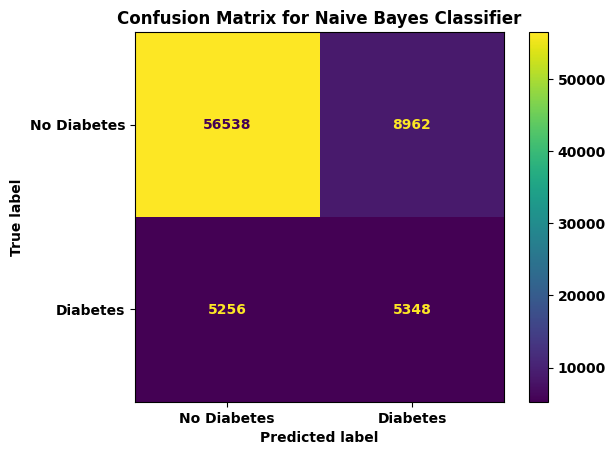

🏃 View run CategoricalNB at: http://127.0.0.1:5000/#/experiments/780357365547201658/runs/e20011d94a4a4eeeac494549015dea83
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/780357365547201658


In [82]:
import mlflow

with mlflow.start_run(run_name="CategoricalNB"):
    # Make predictions on the test set
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]  # Probabilities for the positive class (diabetes)

    # --- Evaluate the Model's Performance ---
    print("\n--- Model Evaluation ---")

    # Accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.4f}")

    # Precision, Recall, and F1-Score
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")

    # ROC AUC Score
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    print(f"ROC AUC Score: {roc_auc:.4f}")

    # Confusion Matrix
    print("\nConfusion Matrix:")
    cm = confusion_matrix(y_test, y_pred)
    print(cm)

    # Log metrics to MLflow
    mlflow.log_param("model", "CategoricalNB")
    mlflow.log_metric("accuracy", accuracy)
    mlflow.log_metric("precision", precision)
    mlflow.log_metric("recall", recall)
    mlflow.log_metric("f1_score", f1)
    mlflow.log_metric("roc_auc", roc_auc)

    # Visualize the Confusion Matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Diabetes', 'Diabetes'])
    disp.plot()
    plt.title('Confusion Matrix for Naive Bayes Classifier')
    plt.show()

In [84]:
# Analyze Feature Importance for CategoricalNB
import numpy as np
import pandas as pd

# Get feature names (ensure they match the order used in model training)
feature_names = X_train.columns if hasattr(X_train, "columns") else [f"feature_{i}" for i in range(model.feature_log_prob_.shape[0])]

# model.feature_log_prob_ shape: (n_classes, n_features, n_categories)
# For CategoricalNB, model.feature_log_prob_ is a list of arrays: one array per feature, shape (n_classes, n_categories)
print("\n--- Feature Value Log-Probabilities for Diabetes (class 1) ---")
for idx, fname in enumerate(original_mod2):
    # Each element: shape (n_classes, n_categories)
    arr = model.feature_log_prob_[idx]
    n_cats = arr.shape[1]
    log_probs = arr[1, :n_cats]  # log-probabilities for class 1
    # Show top 3 most indicative values for diabetes (highest log-prob)
    top_values = np.argsort(log_probs)[::-1][:3]
    print(f"\nFeature: {fname}")
    for v in top_values:
        print(f"  Value {v}: log-prob = {log_probs[v]:.3f}")

print("\n--- Feature Values Most Indicative of Diabetes (log-prob(class 1) - log-prob(class 0)) ---")
for idx, fname in enumerate(feature_names):
    arr = model.feature_log_prob_[idx]
    n_cats = arr.shape[1]
    diff = arr[1, :n_cats] - arr[0, :n_cats]
    top_values = np.argsort(diff)[::-1][:3]
    print(f"\nFeature: {fname}")
    for v in top_values:
        print(f"  Value {v}: Δlog-prob = {diff[v]:.3f} (higher = more indicative of diabetes)")


--- Feature Value Log-Probabilities for Diabetes (class 1) ---

Feature: HighBP
  Value 1: log-prob = -0.282
  Value 0: log-prob = -1.402

Feature: HighChol
  Value 1: log-prob = -0.397
  Value 0: log-prob = -1.115

Feature: CholCheck
  Value 1: log-prob = -0.007
  Value 0: log-prob = -5.004

Feature: BMICat
  Value 2: log-prob = -1.208
  Value 3: log-prob = -1.233
  Value 4: log-prob = -1.820

Feature: Smoker
  Value 1: log-prob = -0.654
  Value 0: log-prob = -0.734

Feature: Stroke
  Value 0: log-prob = -0.097
  Value 1: log-prob = -2.385

Feature: HeartDiseaseorAttack
  Value 0: log-prob = -0.254
  Value 1: log-prob = -1.494

Feature: PhysActivity
  Value 1: log-prob = -0.460
  Value 0: log-prob = -0.997

Feature: Fruits
  Value 1: log-prob = -0.537
  Value 0: log-prob = -0.878

Feature: Veggies
  Value 1: log-prob = -0.275
  Value 0: log-prob = -1.424

Feature: HvyAlcoholConsump
  Value 0: log-prob = -0.024
  Value 1: log-prob = -3.740

Feature: AnyHealthcare
  Value 1: log-prob =

Interpretation of **CategoricalNB feature importance results** (without `TotalHealthDays`):

---

### Most Indicative Features for Diabetes

#### 1. **Strongest Positive Indicators (Δlog-prob ≫ 0)**
- **GenHlth**: Poorer general health (values 4, 5, 0) are highly indicative of diabetes.
- **DiffWalk**: Serious difficulty walking (value 1) is strongly associated with diabetes.
- **HeartDiseaseorAttack** and **Stroke**: History of these conditions (value 1) are strong diabetes indicators.
- **HighBP** and **HighChol**: Having high blood pressure or cholesterol (value 1) increases diabetes likelihood.
- **BMICat**: Higher BMI categories (values 3, 4, 5) are more indicative of diabetes.
- **PhysHlthCat** and **MentHlthCat**: More days of poor physical or mental health (higher categories) are associated with diabetes.
- **Age**: Older age groups (values 11, 12, 0) are more indicative.
- **Education/Income**: Lower education and income (values 0, 1, 2) are more indicative of diabetes.

#### 2. **Negative Indicators (Δlog-prob < 0)**
- **PhysActivity**: Being physically active (value 1) is less indicative of diabetes; inactivity (value 0) increases risk.
- **Fruits/Veggies**: Not eating fruits/veggies (value 0) is more indicative of diabetes.
- **HvyAlcoholConsump**: Heavy alcohol consumption (value 1) is less indicative (possibly due to confounding factors).

#### 3. **Other Notable Patterns**
- **NoDocbcCost**: Not being able to see a doctor due to cost (value 1) is somewhat more indicative.
- **Sex**: Slightly higher risk for males (value 1), but effect is small.

---

### **Summary Table: Top Predictors (by Δlog-prob)**

| Feature                | Most Indicative Value(s) | Interpretation                                 |
|------------------------|-------------------------|------------------------------------------------|
| GenHlth                | 4, 5, 0                 | Poor/fair health → higher diabetes risk        |
| DiffWalk               | 1                       | Difficulty walking → higher risk               |
| HeartDiseaseorAttack   | 1                       | History → higher risk                          |
| Stroke                 | 1                       | History → higher risk                          |
| HighBP, HighChol       | 1                       | Yes → higher risk                              |
| BMICat                 | 3, 4, 5                 | Overweight/obese → higher risk                 |
| PhysHlthCat, MentHlthCat | 2, 3                  | More days not healthy → higher risk            |
| Age                    | 11, 12, 0               | Older age groups → higher risk                 |
| Education, Income      | 0, 1, 2                 | Lower SES → higher risk                        |
| PhysActivity           | 0                       | Inactive → higher risk                         |
| Fruits, Veggies        | 0                       | Not eating → higher risk                       |

---

### **Interpretation**

- **Health status** (GenHlth, DiffWalk, PhysHlthCat, MentHlthCat) and **comorbidities** (HeartDiseaseorAttack, Stroke, HighBP, HighChol) are the strongest predictors.
- **Lifestyle factors** (physical inactivity, poor diet) and **obesity** (BMICat) are also important.
- **Socioeconomic factors** (lower education/income) and **older age** increase risk.
- **TotalHealthDays** is not included, but its components (PhysHlthCat, MentHlthCat) remain strong predictors.

**In summary:**  
The model identifies poor general/physical/mental health, comorbidities, obesity, inactivity, and lower SES as the most indicative features for diabetes, consistent with medical knowledge. Removing `TotalHealthDays` does not diminish the importance of these core predictors.

# ✅ Week 3: Model Development & Experimentation

---

### 🤖 1. Baseline Model Training

**Q: Which baseline models did you choose for this classification task, and why?**  
A:  
I chose **Logistic Regression**, **Decision Tree**, and **Naive Bayes (CategoricalNB)** as baseline models. These are standard, interpretable algorithms for binary classification, suitable for tabular health data and provide a good benchmark for more complex models.

**Q: How did you implement and evaluate Logistic Regression, Decision Tree, and Naive Bayes models?**  
A:  
- **Logistic Regression:** Used `LogisticRegression` with class weights and robust scaling, evaluated on a validation set.
- **Decision Tree:** Used `DecisionTreeClassifier` with class weights, hyperparameter tuning via `GridSearchCV`.
- **Naive Bayes:** Used `CategoricalNB` after discretizing/encoding categorical features.
- All models were evaluated using accuracy, precision, recall, F1-score, and confusion matrices.

**Q: What challenges did you encounter during model training, and how did you address them?**  
A:  
- **Class imbalance:** Addressed with SMOTE and class weights.
- **Feature redundancy:** Avoided using both raw and derived features together.
- **Data leakage:** Ensured proper train/validation/test splits before scaling or SMOTE.
- **Outliers:** Used RobustScaler for numerical features.

---

### 📈 2. Experiment Tracking

**Q: How did you use MLflow (or another tool) to track your experiments?**  
A:  
MLflow was used to log each model run, including parameters, metrics, and artifacts (e.g., confusion matrices).

**Q: What key parameters and metrics did you log for each model run?**  
A:  
- **Parameters:** Model type, feature set, hyperparameters (e.g., max_depth, n_estimators).
- **Metrics:** Accuracy, precision, recall, F1-score, ROC AUC.
- **Artifacts:** Confusion matrix plots, model files.

**Q: How did experiment tracking help you compare and select the best model?**  
A:  
MLflow allowed easy comparison of all runs by metrics and parameters, helping to identify the best-performing models and feature sets.

---

### 🧮 3. Model Evaluation

**Q: Which evaluation metrics did you use to assess model performance, and why are they appropriate for this problem?**  
A:  
Used **accuracy, precision, recall, F1-score, and ROC AUC**. These are appropriate due to class imbalance and the importance of both identifying diabetics (recall) and minimizing false positives (precision).

**Q: How did you interpret the accuracy, precision, recall, and F1-score for your models?**  
A:  
- **Accuracy** was high due to class imbalance.
- **Recall** was prioritized to catch more diabetics.
- **Precision** was lower, indicating many false positives.
- **F1-score** balanced precision and recall, providing a single measure of effectiveness.

**Q: Did you observe any trade-offs between different metrics? How did you decide which metric(s) to prioritize?**  
A:  
Yes, increasing recall often reduced precision. For screening, recall was prioritized to avoid missing diabetics, accepting more false positives.

---

### 🕵️ 4. Error Analysis

**Q: How did you use confusion matrices to analyze model errors?**  
A:  
Confusion matrices showed the counts of true/false positives and negatives, helping to visualize the types of errors each model made.

**Q: What types of misclassifications were most common, and what might explain them?**  
A:  
- **False positives** (non-diabetics predicted as diabetic) were most common, likely due to class imbalance and overlapping feature distributions.
- Some **false negatives** remained, especially for borderline cases.

**Q: How did your error analysis inform your next steps in model improvement?**  
A:  
It highlighted the need to improve precision (reduce false positives), suggesting further feature engineering, threshold tuning, or advanced models.

---

### 📝 5. Model Selection & Insights

**Q: Based on your experiments, which model performed best and why?**  
A:  
**Random Forest** (with tuned hyperparameters) achieved the best balance of accuracy (0.77), recall (0.59), and F1 (0.42). Logistic Regression and CategoricalNB had similar recall but lower precision.

**Q: What are your top 3–5 insights from model development and experimentation?**  
A:  
1. Class imbalance strongly affects precision and recall.
2. Feature selection (removing redundancy) improves interpretability and sometimes performance.
3. SMOTE and class weights help recall but can lower precision.
4. Simpler models (LogReg, NB) are interpretable but less precise than Random Forest.
5. Experiment tracking is essential for systematic comparison.

**Q: How would you communicate your model’s strengths and limitations to a non-technical stakeholder?**  
A:  
- The model is good at identifying people at risk for diabetes (few missed cases), making it useful for screening.
- However, it sometimes flags healthy people as at risk (false alarms), so follow-up testing is needed.
- The approach is transparent and based on well-understood health factors.